Explore `pandas`. Specifically explore the possibility of using it to store results for a run of conditional generation.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import autograd.numpy as np
import scipy.stats as stats
import torch
import tensorflow as tf

In [1]:
import cadgan
import cadgan.glo as glo
import cadgan.imutil as imutil
import cadgan.util as util

## Load an image

In [265]:
#log_dir = '../cadgan/ex/lars_face_train_list_vgg/log_lars_celeba/'
log_dir = '../cadgan/ex/sample_list_bedroom/log'


#log_dir = '../cadgan/ex/lars_cub_hedcolor128_lr0_1/log_lars_cub_hed/'
#log_dir = '../cadgan/ex/log_lars_cub_test/'
df = util.get_df_from_logs(log_dir,lpips_compute=False,ignore_error=True)
#df.to_pickle('../../gdrive/condgan_share/dataframe_results/mnist_all.pkl')

processed: 177: 100%|██████████| 177/177 [01:22<00:00,  2.16it/s]


In [2547]:
#load from multiple log dir
#log_dir_list = ['../cadgan/ex/lars_cub_hedvgg_2/log_lars_cub_hed/','../cadgan/ex/lars_cub_hedcolor128_lr0_1/log_lars_cub_hed/','../cadgan/ex/lars_cub_hed/log_lars_cub_hed/','../cadgan/ex/lars_cub_hed_lr0_005/log_lars_cub_hed/']
log_dir_list = ['../cadgan/ex/sample_list_bedroom_imqc10/log/',
               '../cadgan/ex/sample_list_bedroom_imqc100/log/','../cadgan/ex/sample_list_bedroom_imqc1/log/'
               ]
df_list = []
for log_dir in log_dir_list:
    df_list.append(util.get_df_from_logs(log_dir))
    
df = pd.concat(df_list,ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '../cadgan/ex/log_lars_celeba_vggface'

In [1443]:
#load from multiple log dir
#log_dir_list = ['../cadgan/ex/lars_cub_hedvgg_2/log_lars_cub_hed/','../cadgan/ex/lars_cub_hedcolor128_lr0_1/log_lars_cub_hed/','../cadgan/ex/lars_cub_hed/log_lars_cub_hed/','../cadgan/ex/lars_cub_hed_lr0_005/log_lars_cub_hed/']
log_dir_list = ['../cadgan/ex/lars_face_train_list_vgg/log_lars_celeba/',
               '../cadgan/ex/lars_face_mini_list_vgg_sep/log_lars_celeba/',
                '../cadgan/ex/lars_face_train_list_vgg_sep_Zpen/log_lars_celeba/',
               '../cadgan/ex/lars_face_mini_list_vgg_sep_Zpen/log_lars_celeba/'
               ]
df_list = []
for log_dir in log_dir_list:
    df_list.append(util.get_df_from_logs(log_dir))
    
df = pd.concat(df_list,ignore_index=True)

In [ ]:
'/srv/share/psangkloy3/gdrive/condgan_share/dataframe_results/[dataset]_all.pkl'

In [151]:
df.to_pickle('../../gdrive/condgan_share/dataframe_results/bedroom_lpips.pkl')

## Display images in a dataframe

In [138]:
# https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
import base64
import io
import PIL
import IPython
import skimage

# def get_thumbnail(path):
#     im = PIL.Image.open(path)
#     im.thumbnail((150, 150), Image.LANCZOS)
#     return im

def image_base64(im, resize=256):
    '''
    im: a numpy array whose range is [0,1]
    '''
    with io.BytesIO() as buffer:
        # resize
        im = skimage.transform.resize(im, (resize, resize), mode='reflect', anti_aliasing=True)
        
        # convert the numpy array to a PIL image
        pil_im = PIL.Image.fromarray(np.uint8(im*255))
        pil_im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def images_formatter(imgs,col=3):
    if len(imgs) < col:
        html = u'<div class="df">'
    else:
        html = u'<div class="df" style="width: 400px">'
    for i in range(len(imgs)):
        html += '<div class="imgs" style="display: inline-block; width: 128px">'
        img64 = image_base64(imgs[i])
#         print(img64)
        img_tag = '<img src="data:image/jpeg;base64,{}" >'.format(img64)
#         img_tag = f'<img src="data:image/jpeg;base64,{img64}">'
        html += img_tag + ' </div> '
    
        if (i+1)%col == 0:
            html += '<br>'
#     print(html)
    return html +'</div>'



In [84]:
df.columns.values

array(['cond_feat', 'cond_imgs', 'cond_path', 'depth_process', 'device',
       'extractor_layers', 'extractor_type', 'feat_imgs', 'g_max',
       'g_min', 'g_path', 'g_type', 'img_log_steps', 'img_size',
       'ini_imgs', 'iteration', 'kernel', 'kparams', 'log_path', 'logdir',
       'lr', 'n_init_resample', 'n_opt_iter', 'n_sample', 'out_imgs',
       'output_score', 'prior_ini', 'prior_score', 'seed', 'texture',
       'w_input', 'zpen'], dtype=object)

In [252]:
df = util.get_df_from_logs(log_dir)

processed: 6: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]


In [99]:
len(df)

99

In [266]:
#do some filtering based on parameters etc.
df_final = df[['prior_score','output_score','cond_imgs','out_imgs','iteration','kernel','seed','lr','extractor_layers','img_size','extractor_type','cond_path','n_sample']] 
#df_final = df_final.loc[(df_final['cond_path']=='sample_list/colormnist_list/files_n1_3.txt') | (df['cond_path']=='sample_list/colormnist_list/files_n1_5.txt') | (df['cond_path']=='sample_list/colormnist_list/files_n1_8.txt')]#| (df['cond_path']=='/notebooks/psangkloy3/gdrive/condgan_share/ml_celeba_list_n1/files_n1_16.txt') | (df['cond_path']=='/notebooks/psangkloy3/gdrive/condgan_share/ml_celeba_list_n1/files_n1_17.txt') | (df['cond_path']=='/notebooks/psangkloy3/gdrive/condgan_share/ml_celeba_list_n1/files_n1_13.txt')]
#df_final = df_final.loc[df_final['n_init_resample']=='10000.0']
#df_final = df_final.loc[df_final['log_path']=='../cadgan/ex/minsky_mnist_color/co_sample_listcolormnist_listfiles_n1_3.txt-dp_no-el_3-et_mnist_cnn_digit_layer-gt_colormnist_dcgan-img_size_28-it_20000-k_imq-kp_-0.5 10.0-lr_0.0001-n_3-n_init_resample_10000.0-s_99-te_0.0-w_input_-zpen_TPNull']
#df_final = df_final.loc[df_final['n_sample']!='6']
#df_final = df_final.loc[df_final['seed']=='9']
#df_final = df_final.loc[df_final['kparams']=='[-0.5, 100.0]']
#df_final = df_final.loc[df_final['lr']=='0.05']
#df_final = df_final.loc[df_final['extractor_layers']=="['35']"]
df_final = df_final.sort_values('cond_path')#
#df_final = df_final.loc[df_final['extractor_type']=='mnist_cnn_digit_layer_color']
#df_final = df_final.sort_values('n_sample')
#df_final = df_final.loc[df['iteration']==99]
#df_final = df_final.loc[((df['extractor_type'] == 'hed_color') | (df['extractor_type'] == 'hed')) & ((df['n_sample'] == '1'))]

#/notebooks/psangkloy3/gdrive/condgan_share/sample_list/cub_list_n1/files_n1_14.txt

#/notebooks/psangkloy3/gdrive/condgan_share/sample_list/mnist_list/files_n2_23.txt
#/notebooks/psangkloy3/gdrive/condgan_share/sample_list/mnist_list/files_n2_19.txt


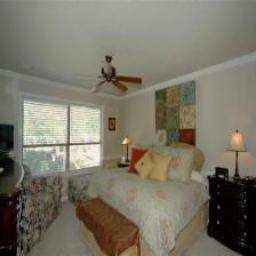
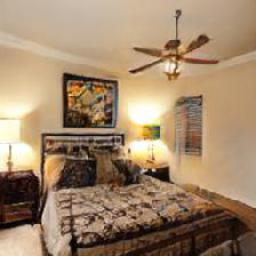
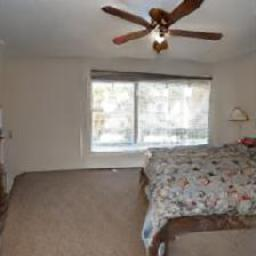
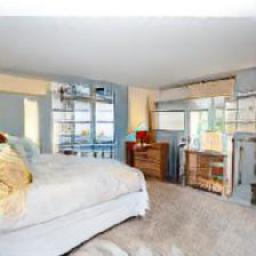
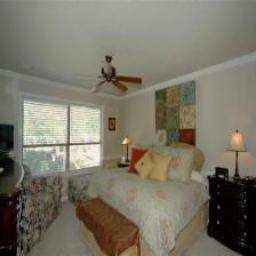
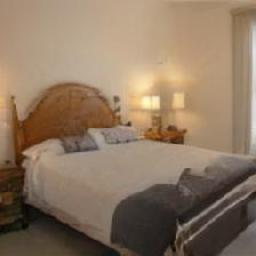
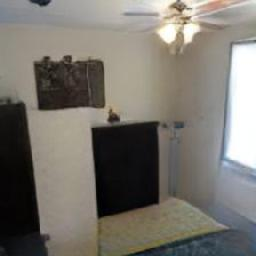
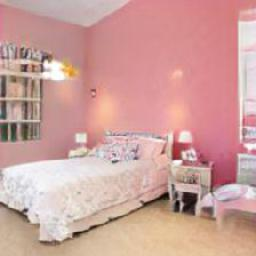
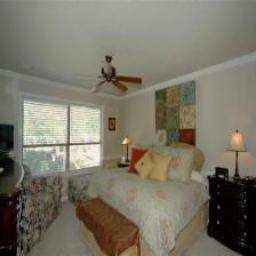
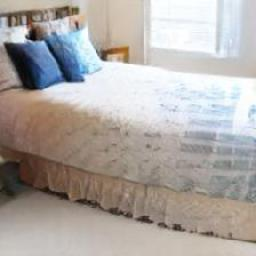
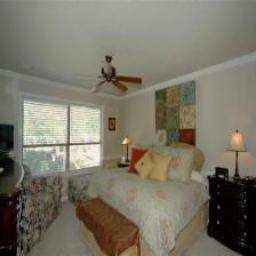
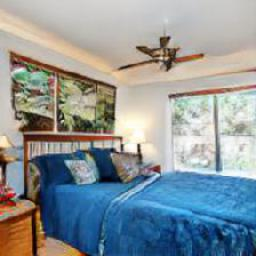
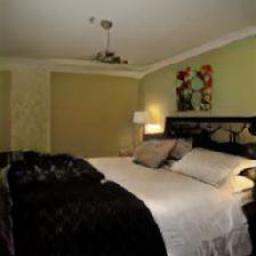
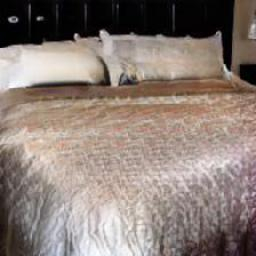
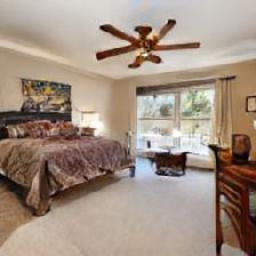
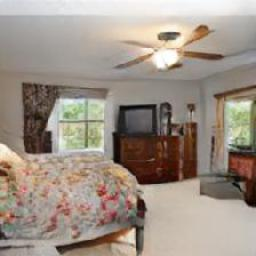
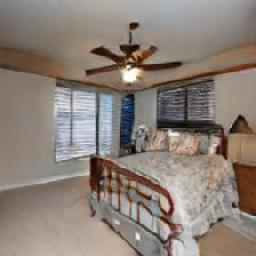
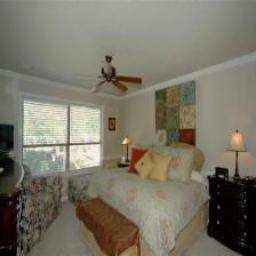
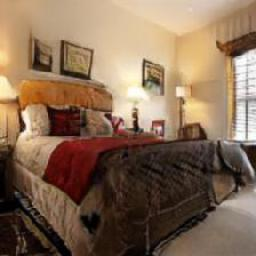
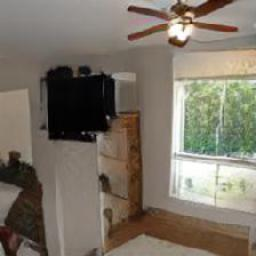
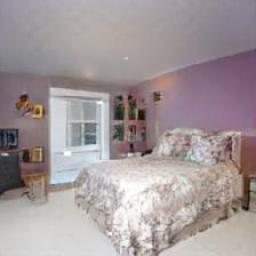
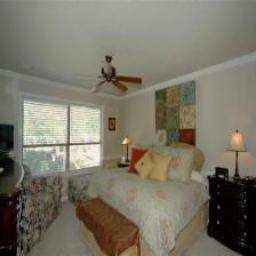
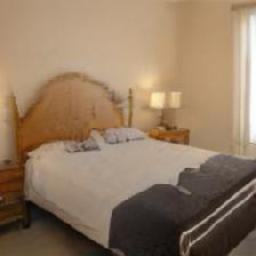
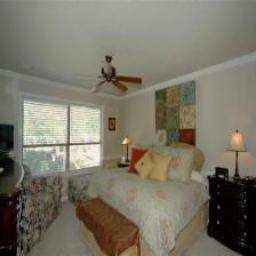
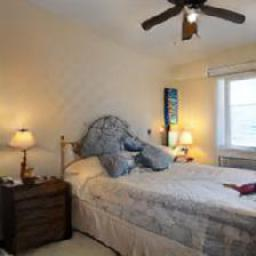
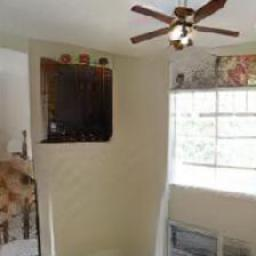
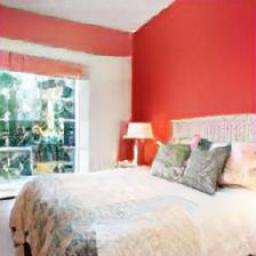
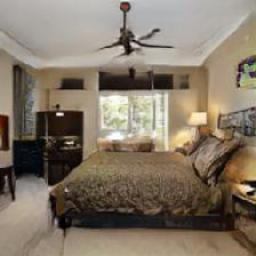
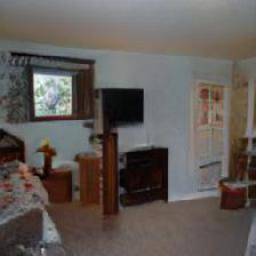
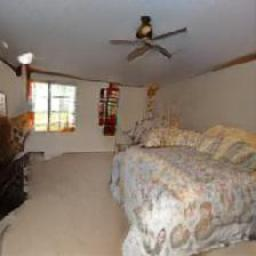
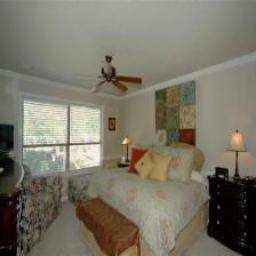
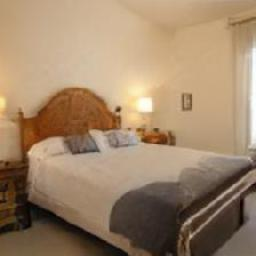
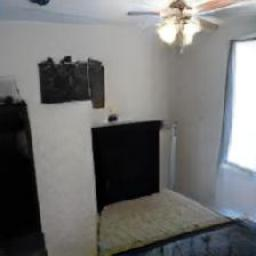
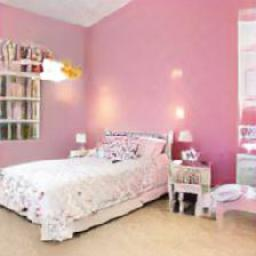
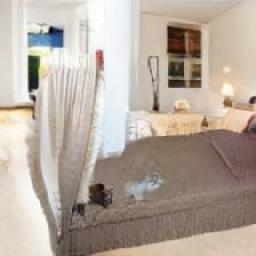
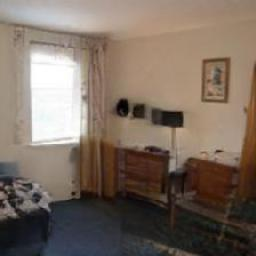
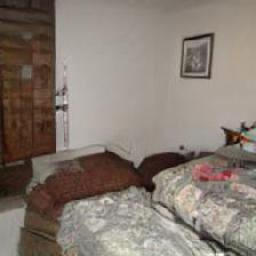
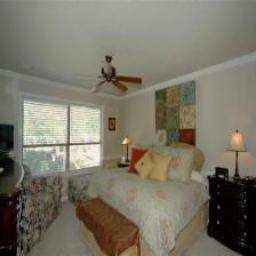
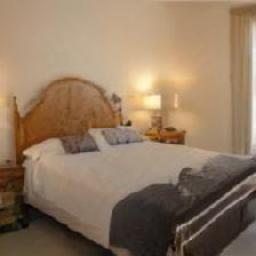
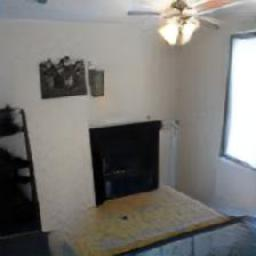
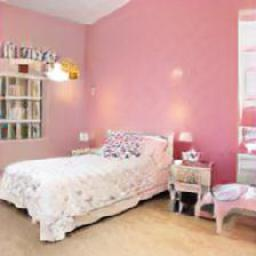
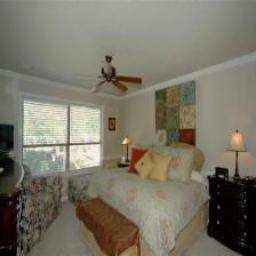
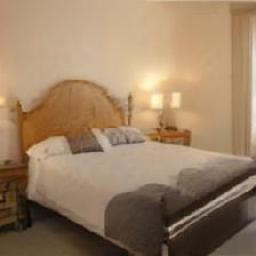
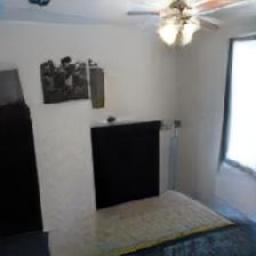
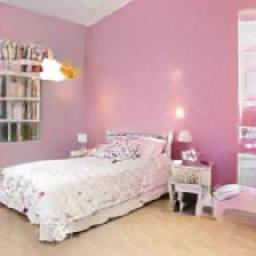
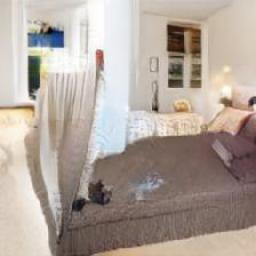
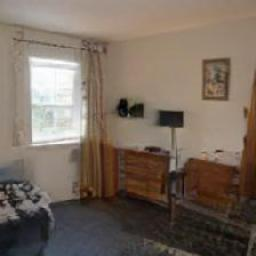
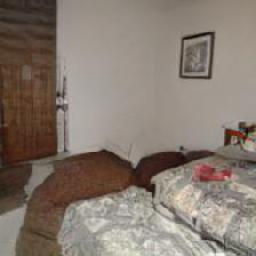
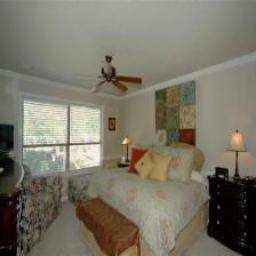
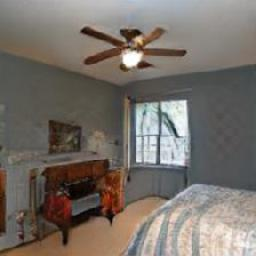
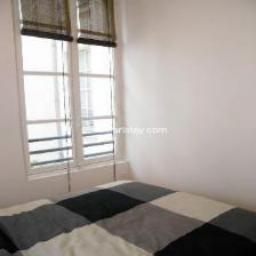
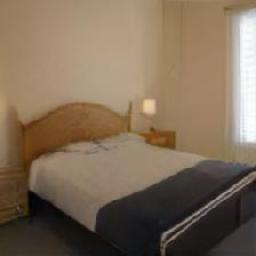
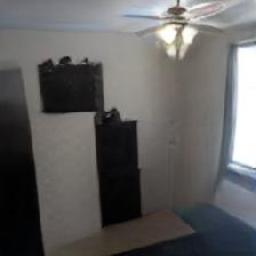
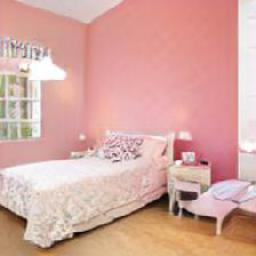
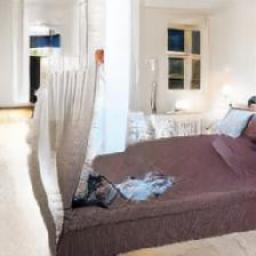
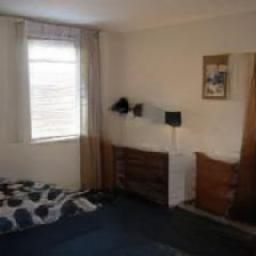
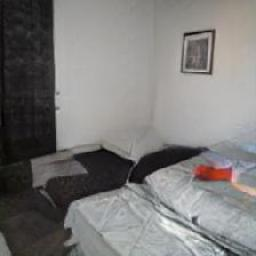
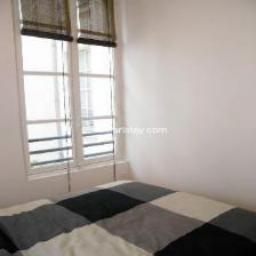
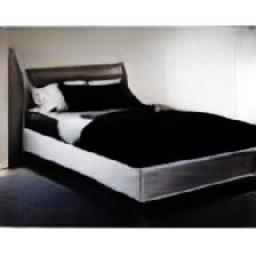
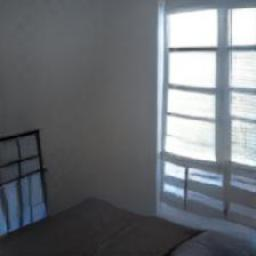
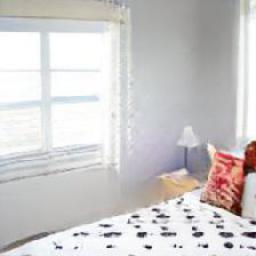
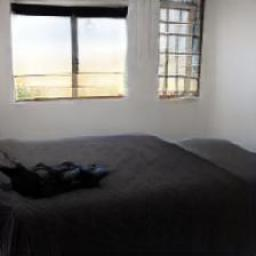
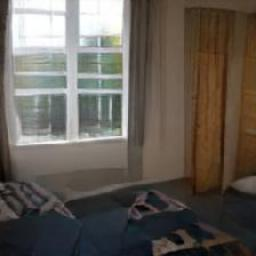
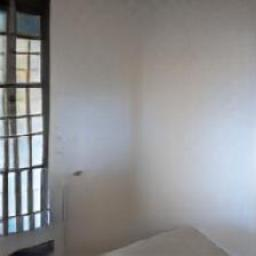
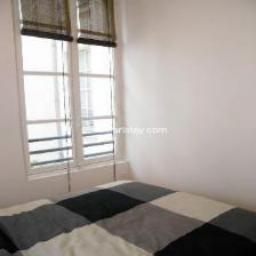
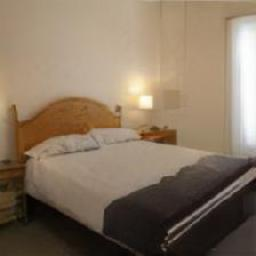
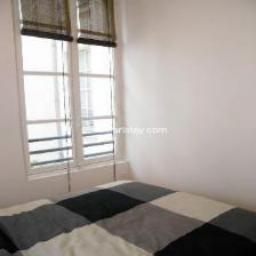
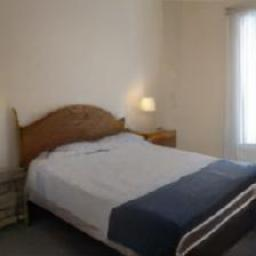
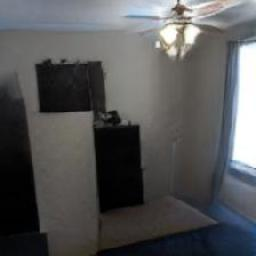
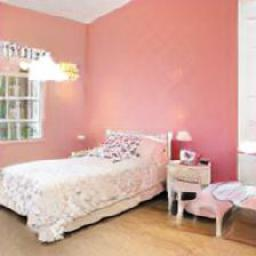
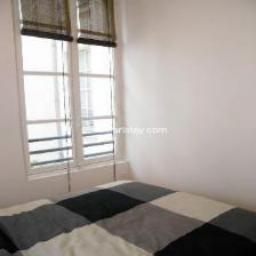
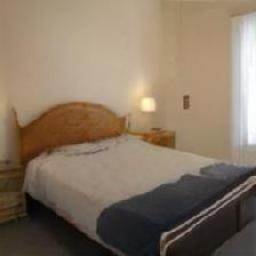
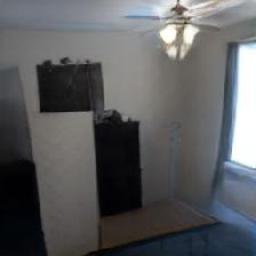
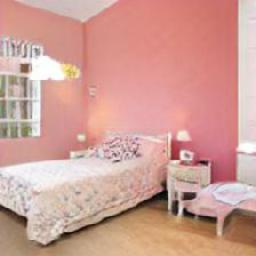
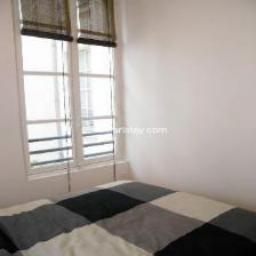
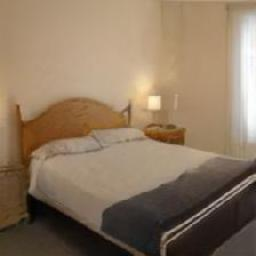
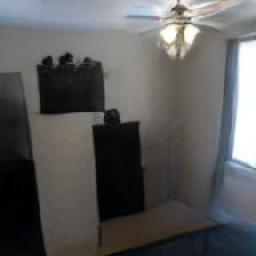
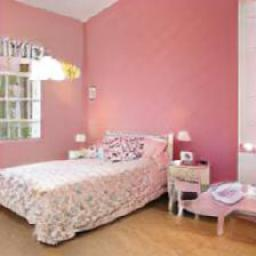
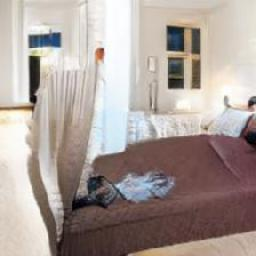
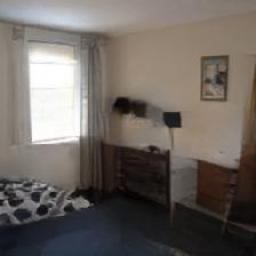
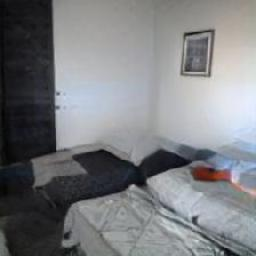
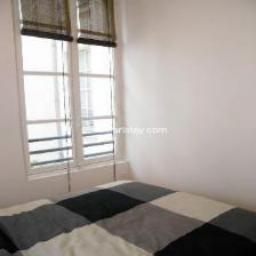
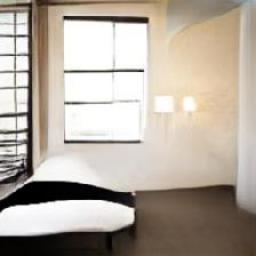
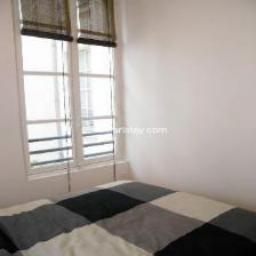
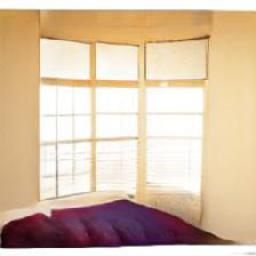
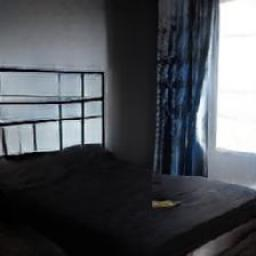
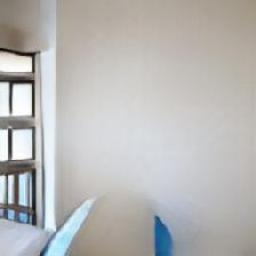
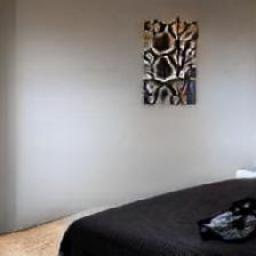
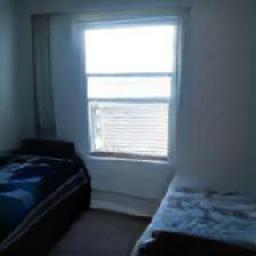
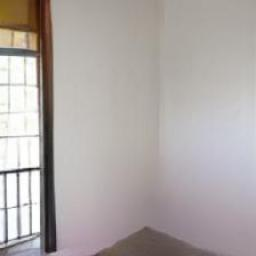
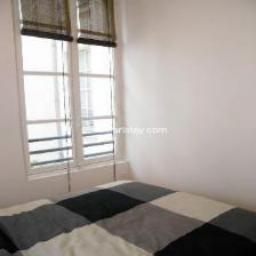
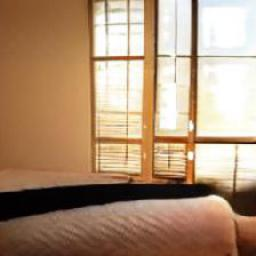
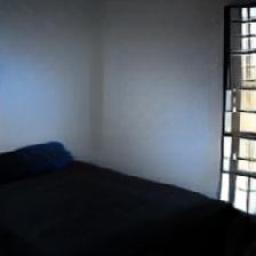
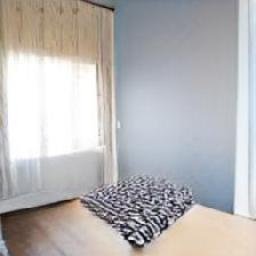
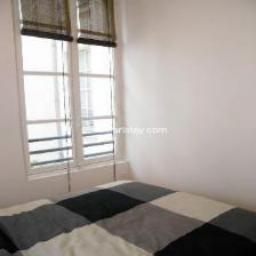
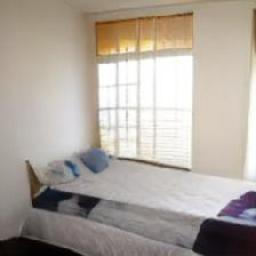
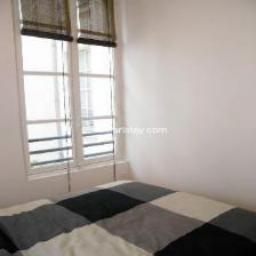
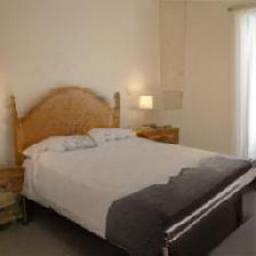
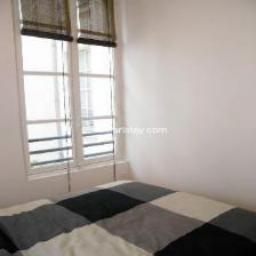
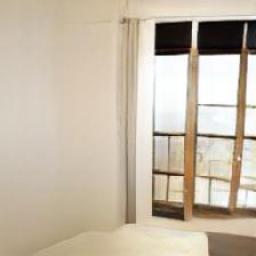
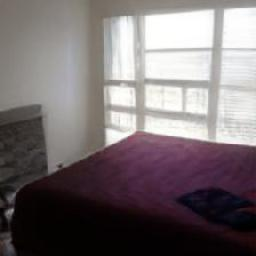
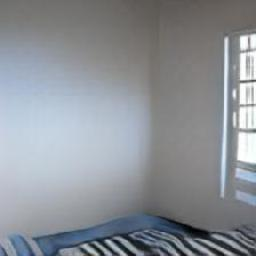
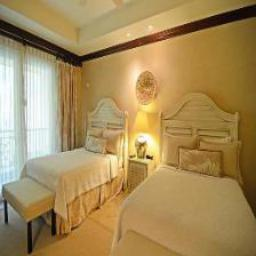
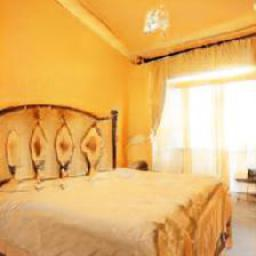
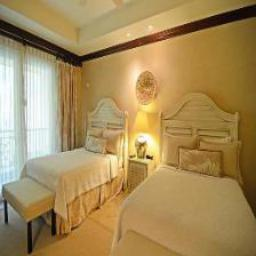
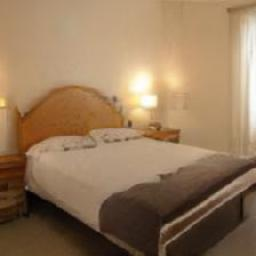
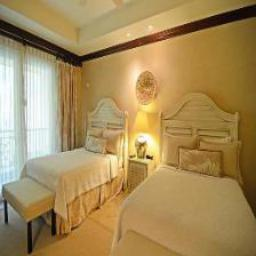
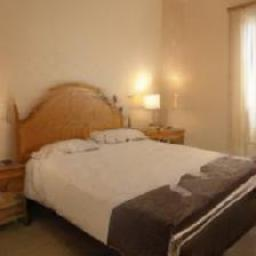
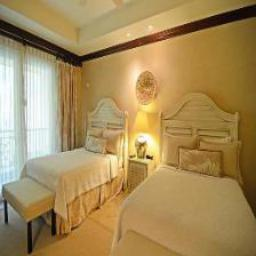
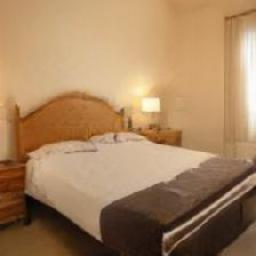
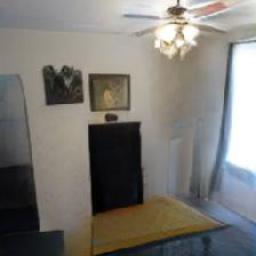
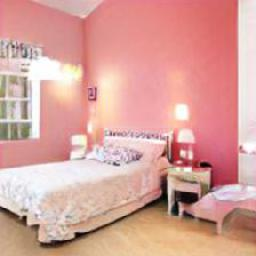
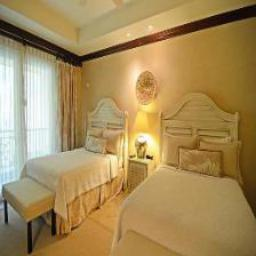
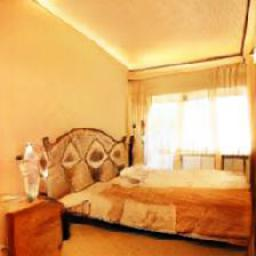
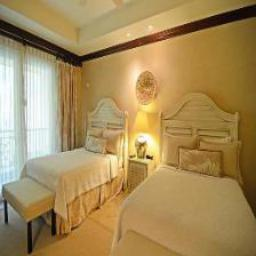
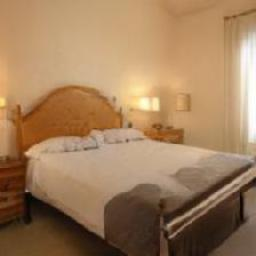
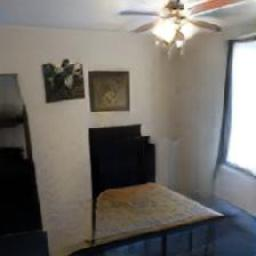
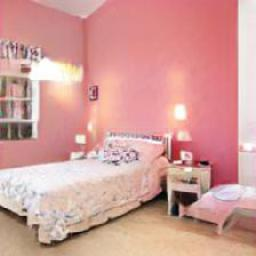
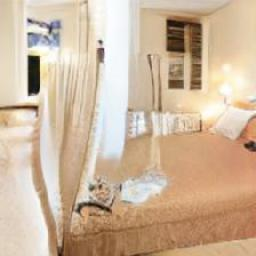
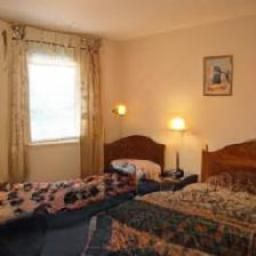
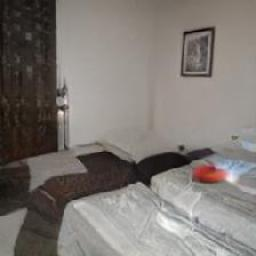
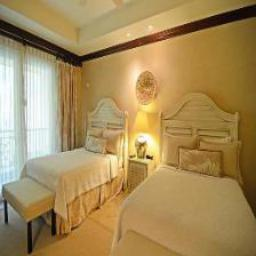
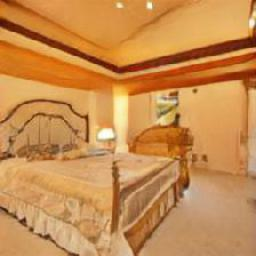
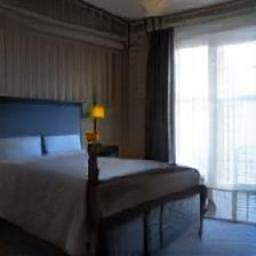
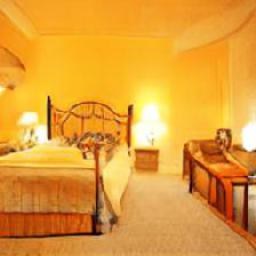
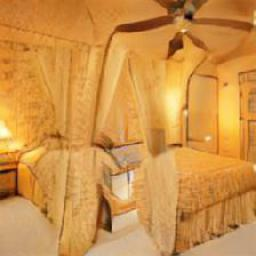
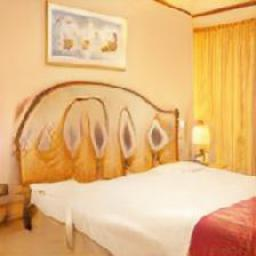
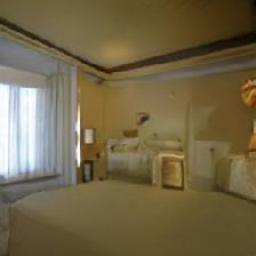
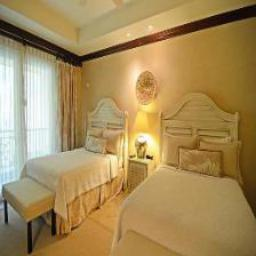
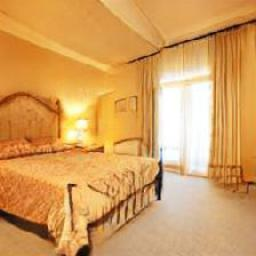
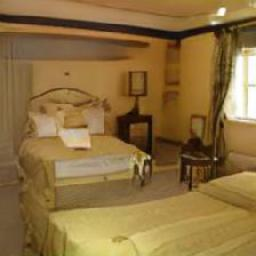
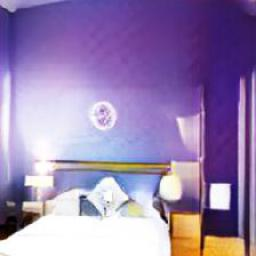
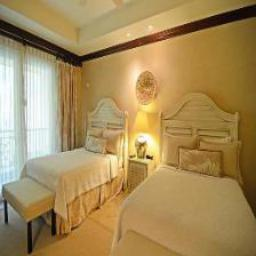
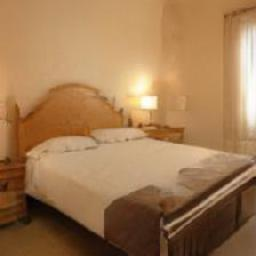
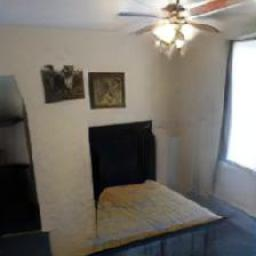
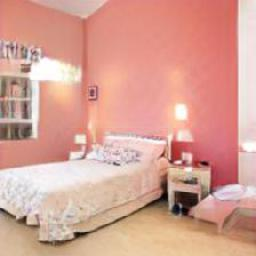
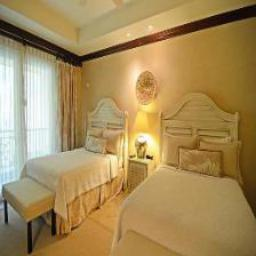
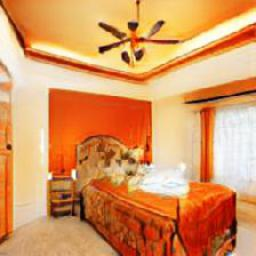
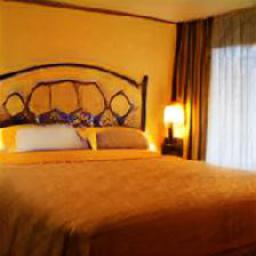
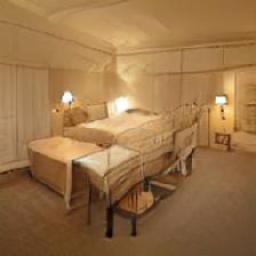
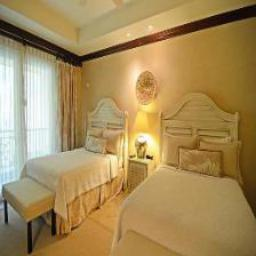
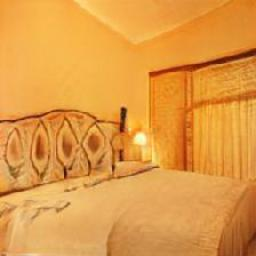
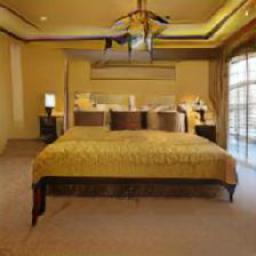
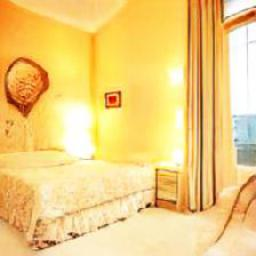
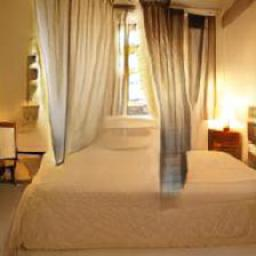
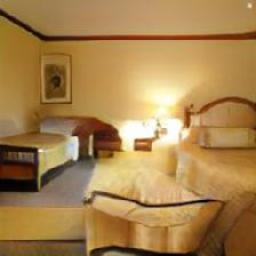
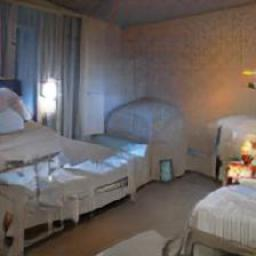
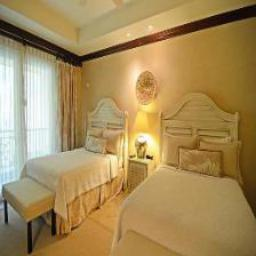
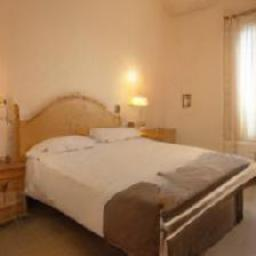
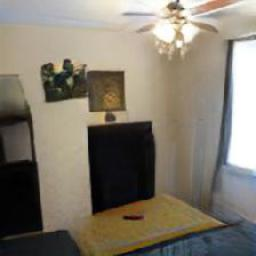
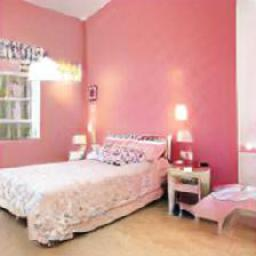
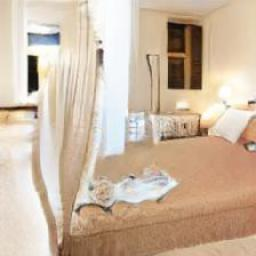
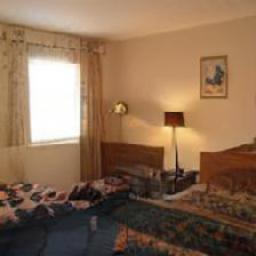
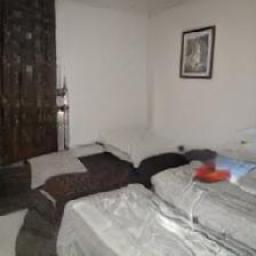
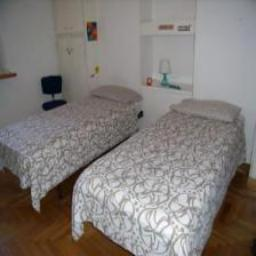
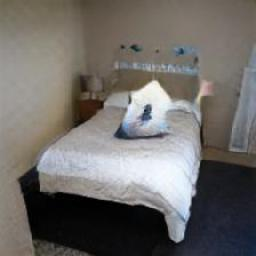
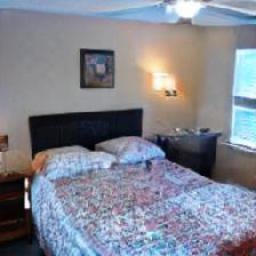
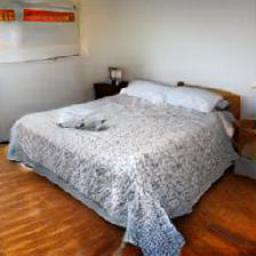
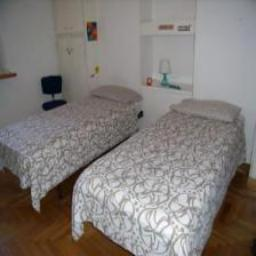
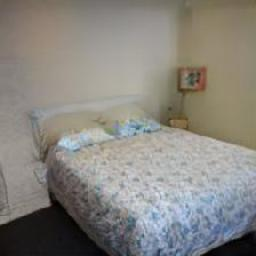
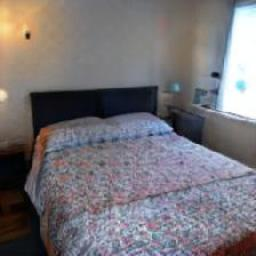
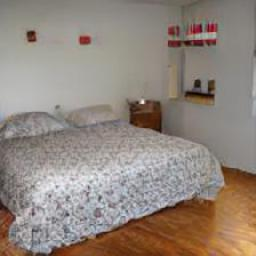
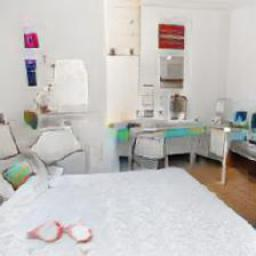
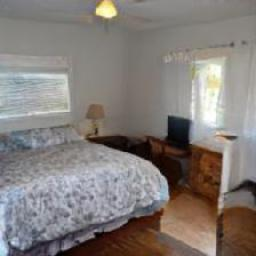
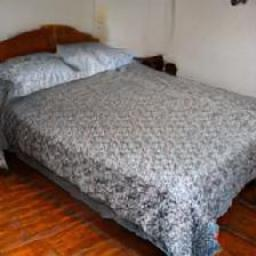
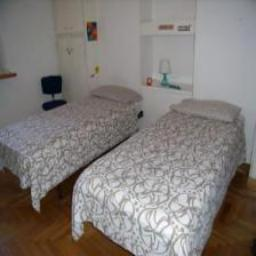
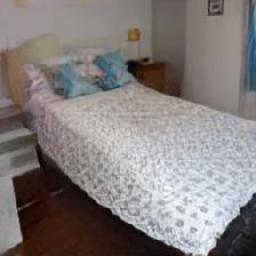
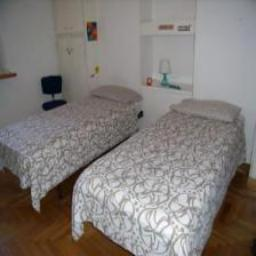
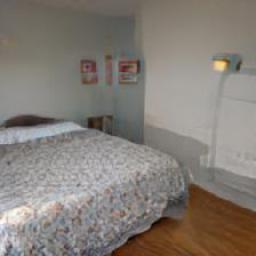
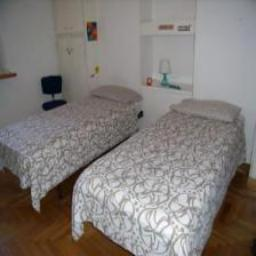
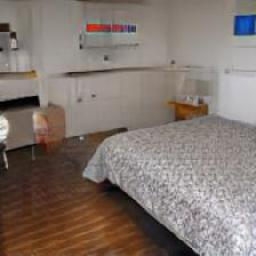
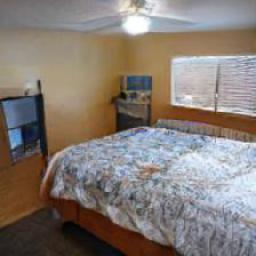
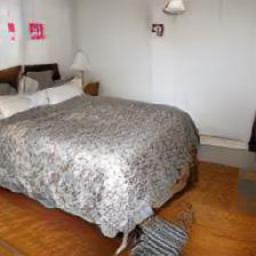
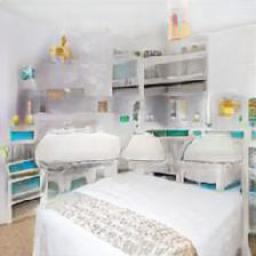
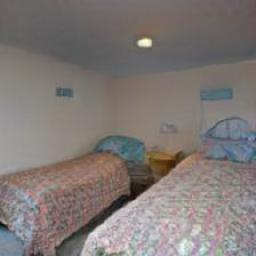
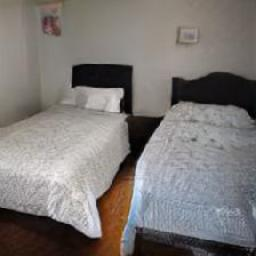
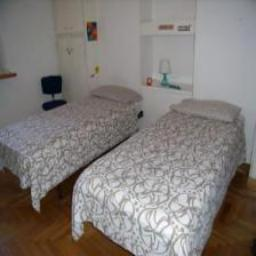
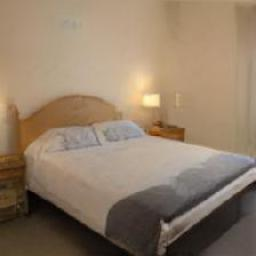
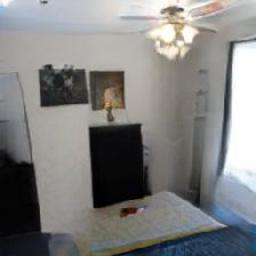
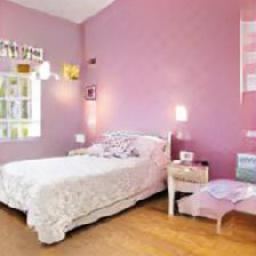
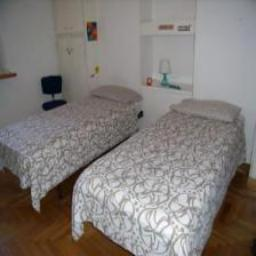
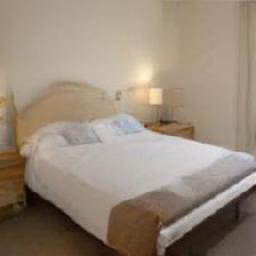
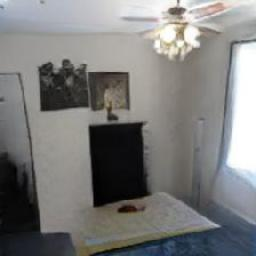
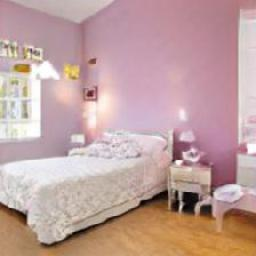
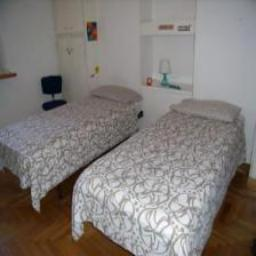
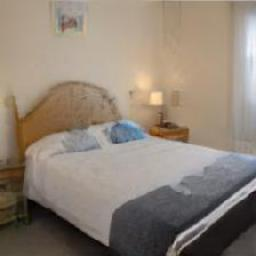
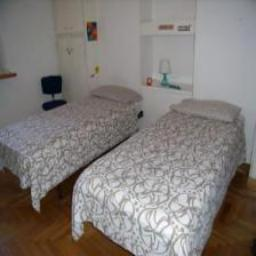
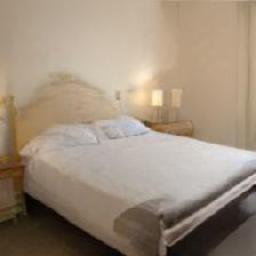
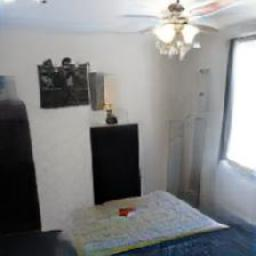
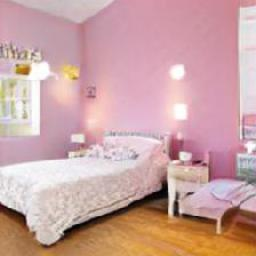
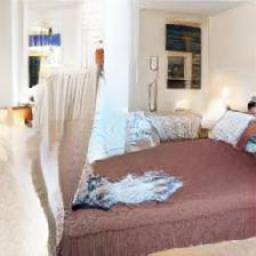
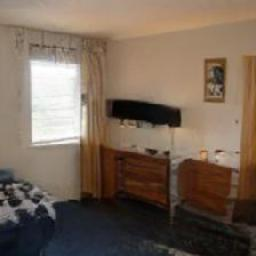
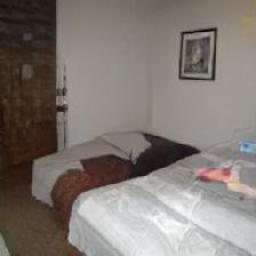
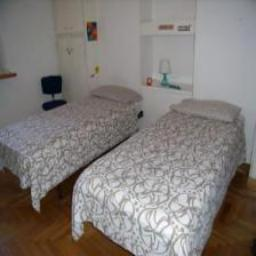
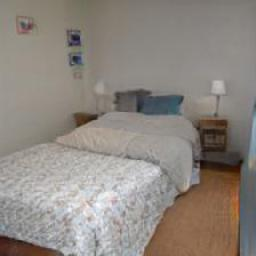
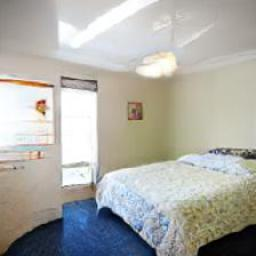
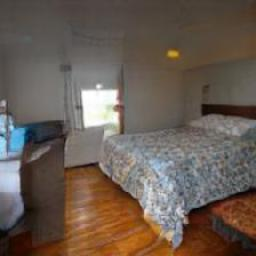
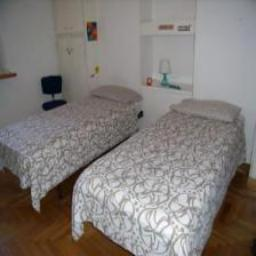
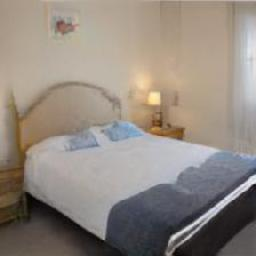
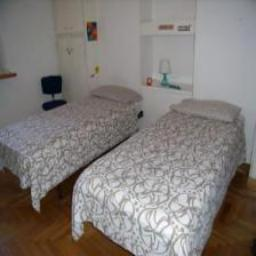
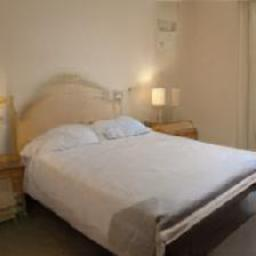
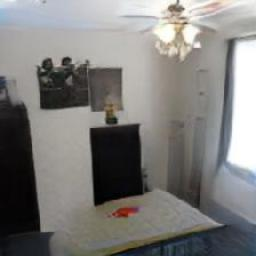
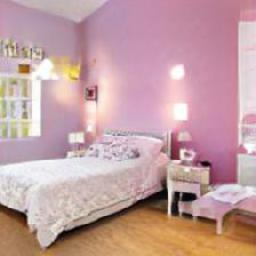
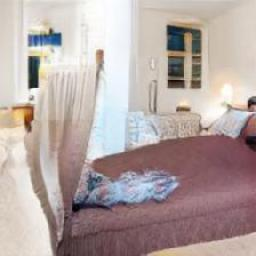
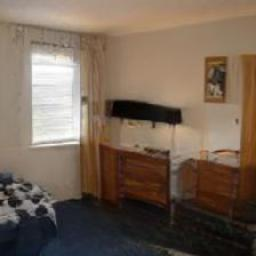
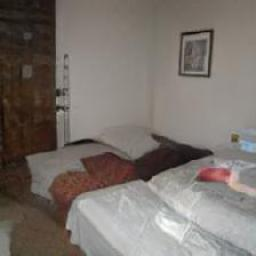
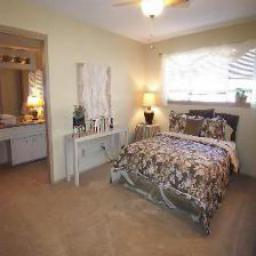
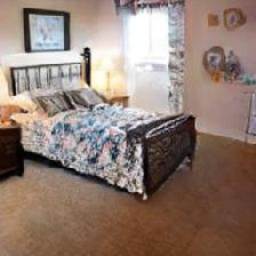
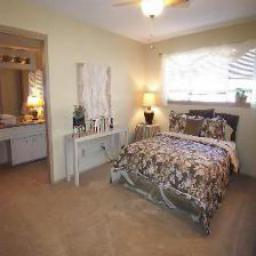
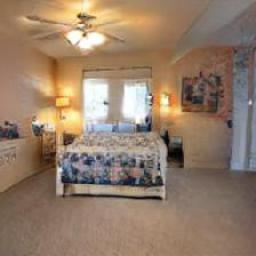
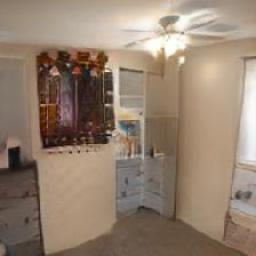
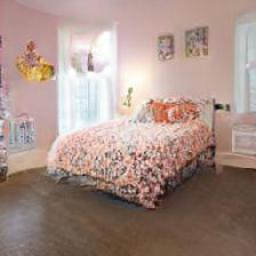
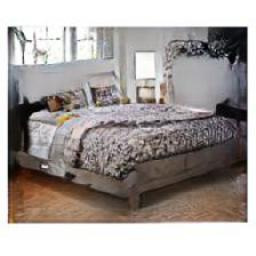
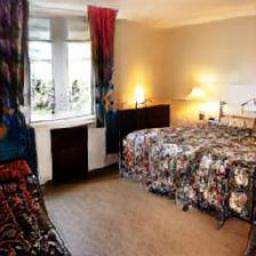
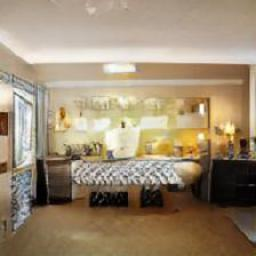
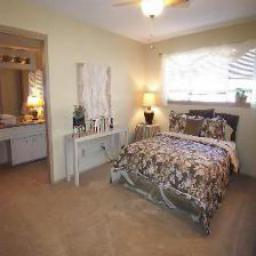
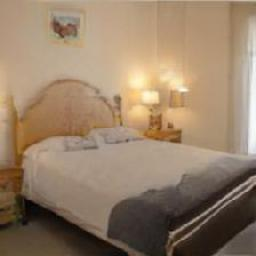
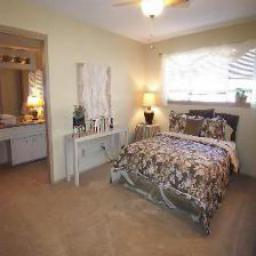
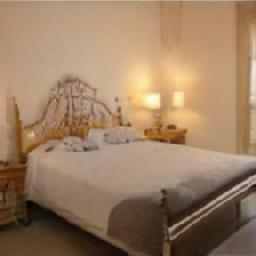
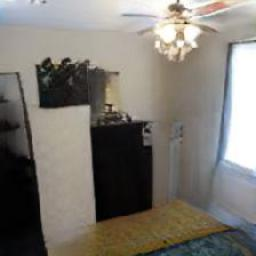
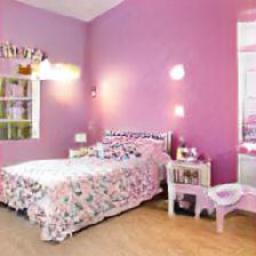
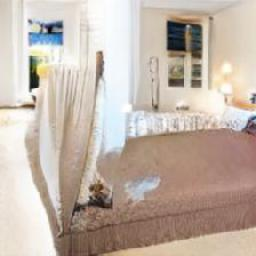
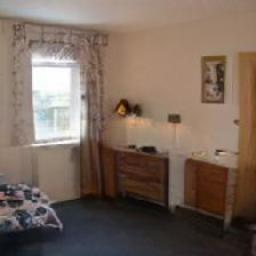
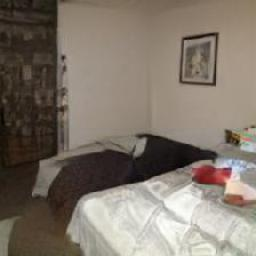
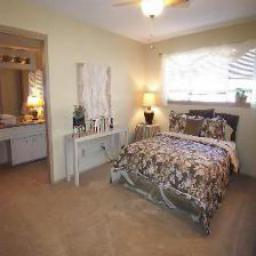
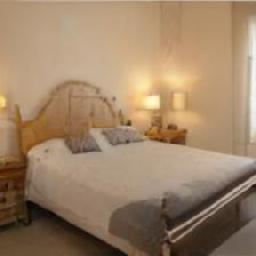
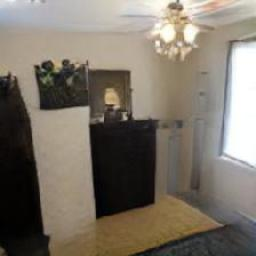
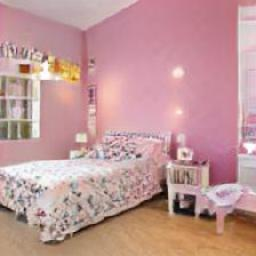
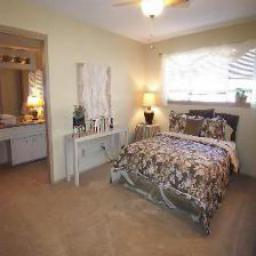
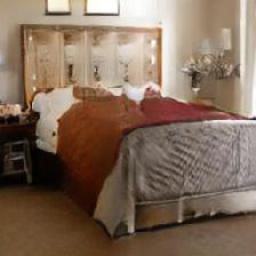
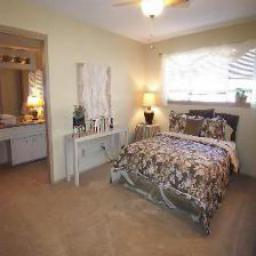
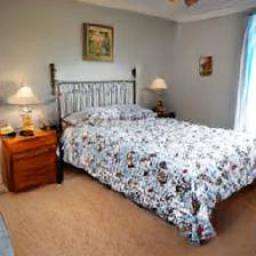
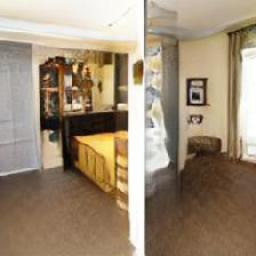
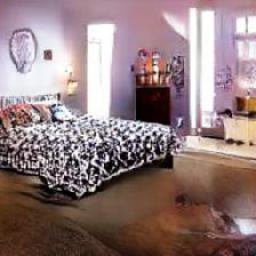
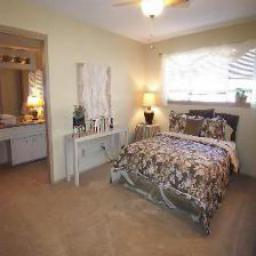
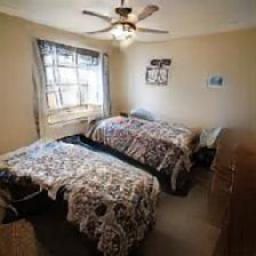
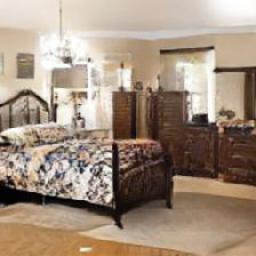
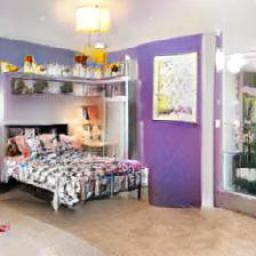
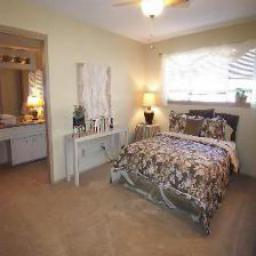
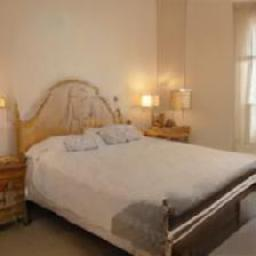
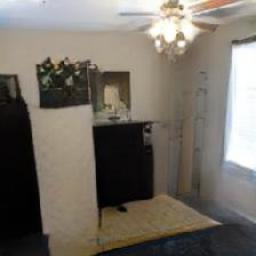
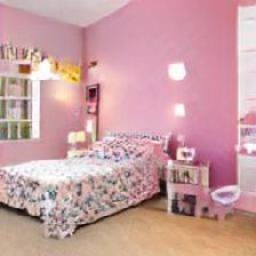
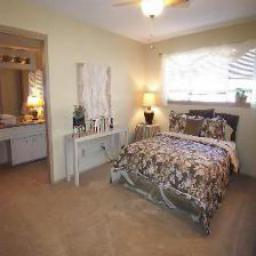
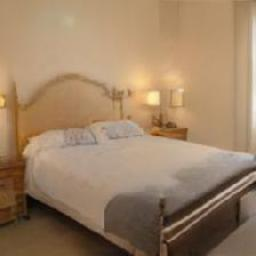
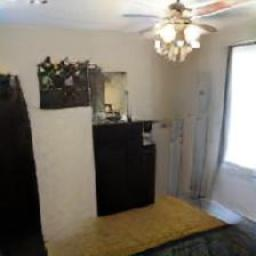
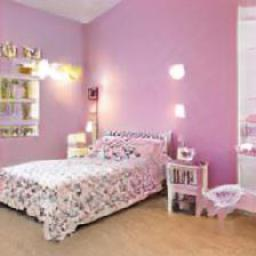
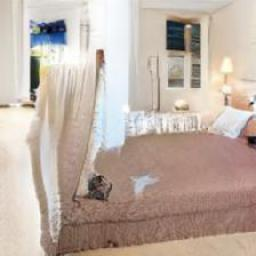
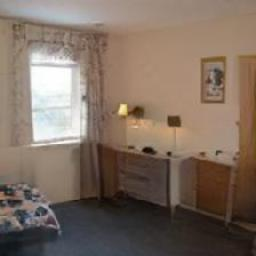
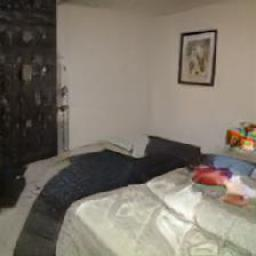
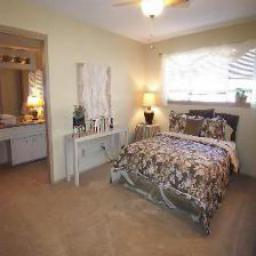
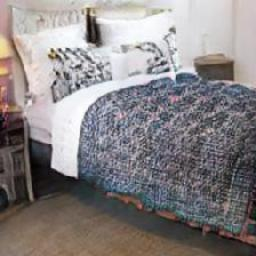
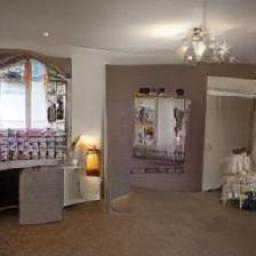
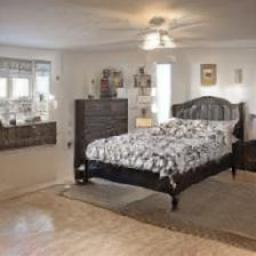
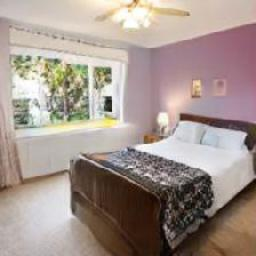
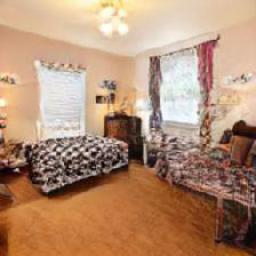
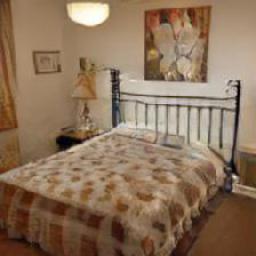
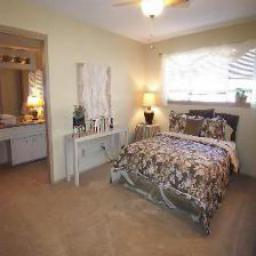
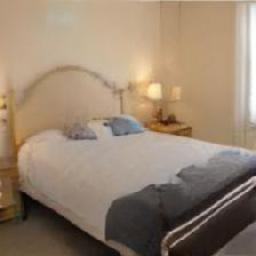
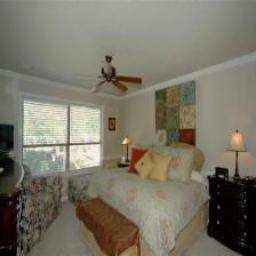
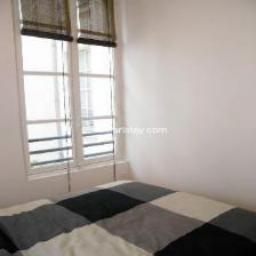
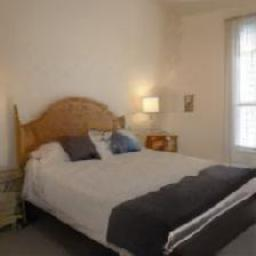
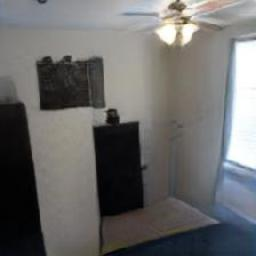
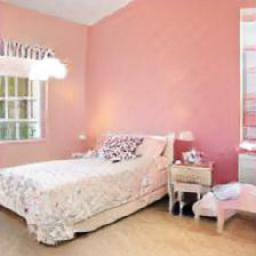
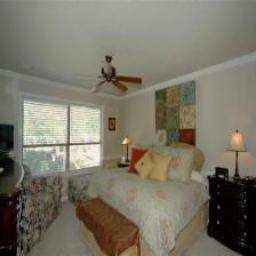
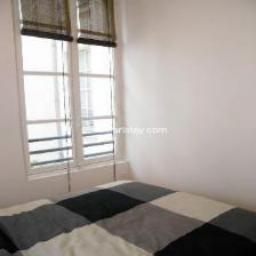
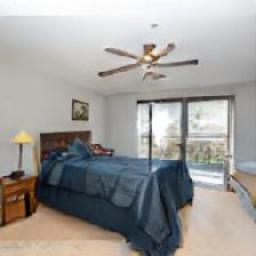
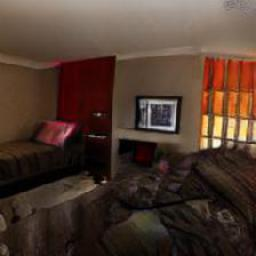
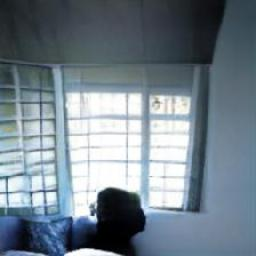
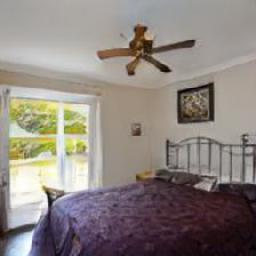
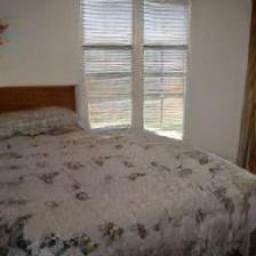
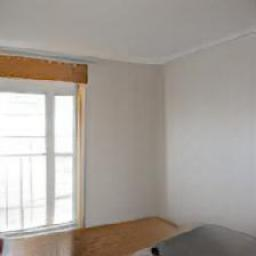
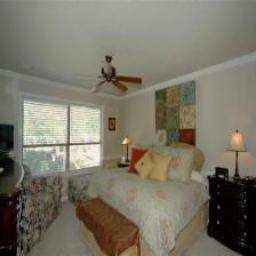
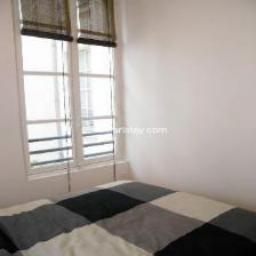
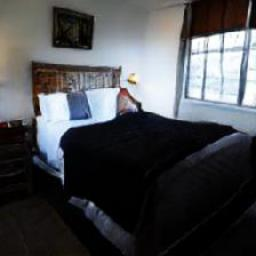
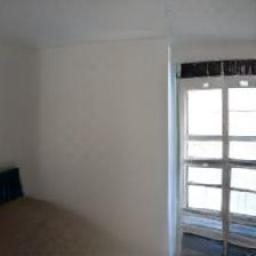
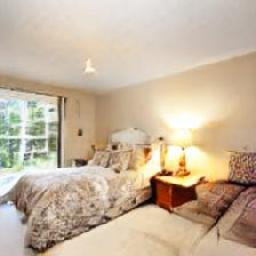
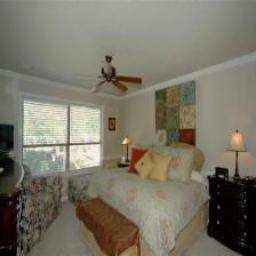
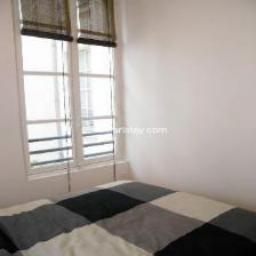
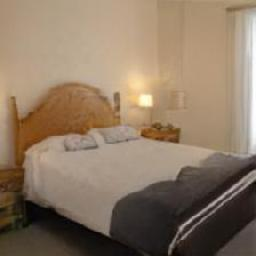
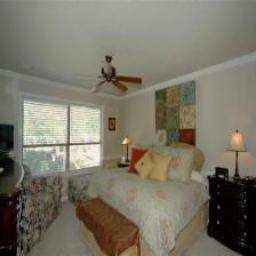
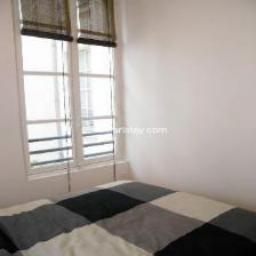
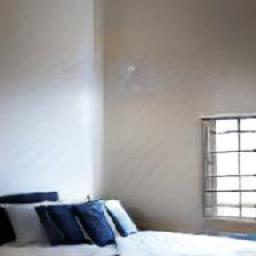
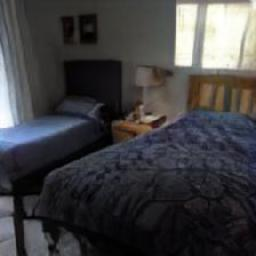
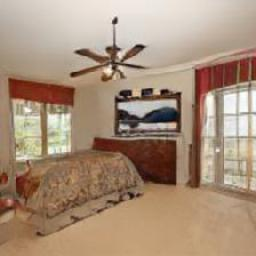
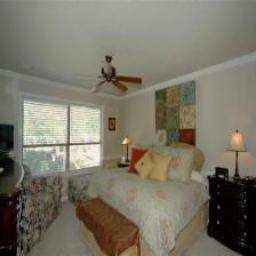
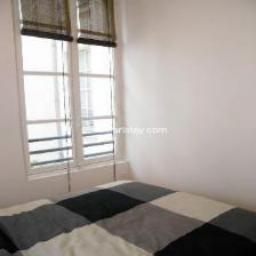
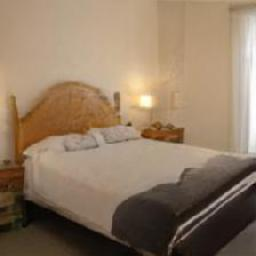
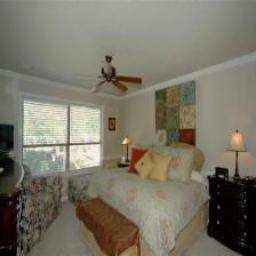
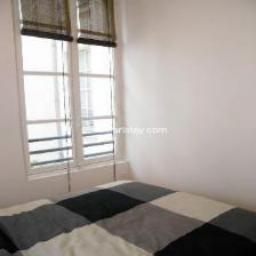
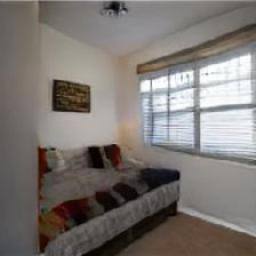
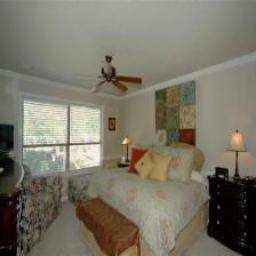
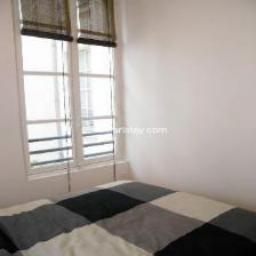
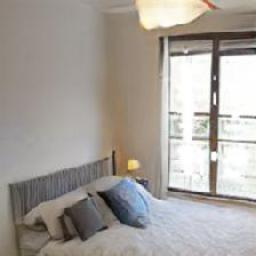
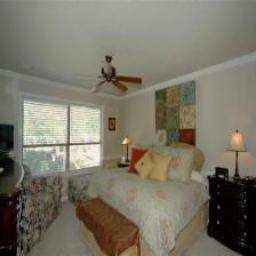
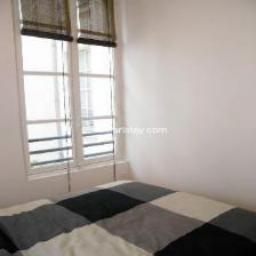
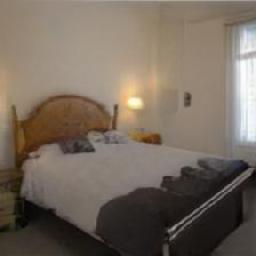
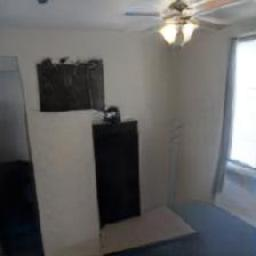
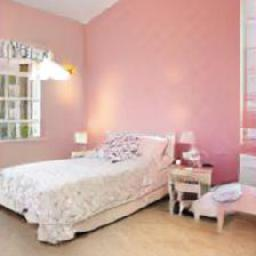
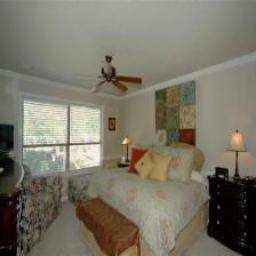
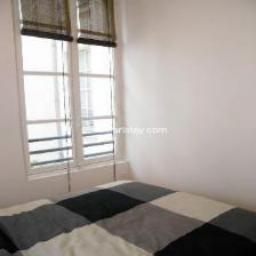
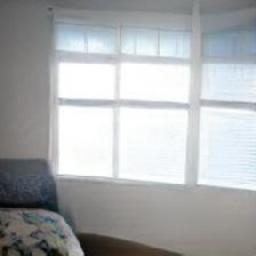
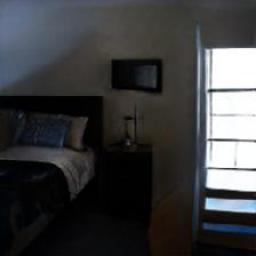
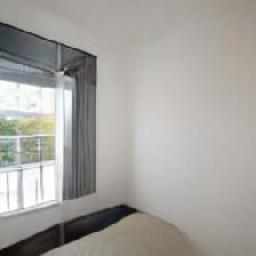
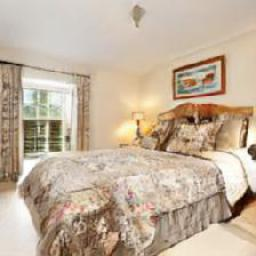
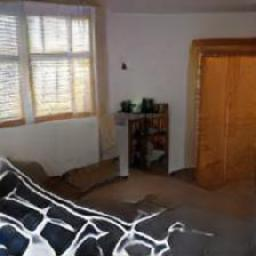
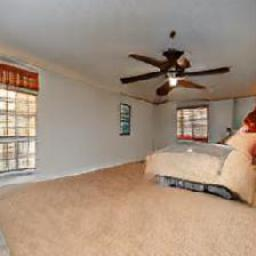
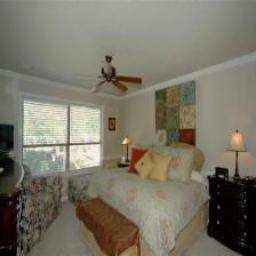
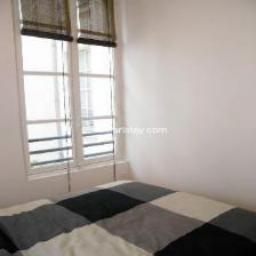
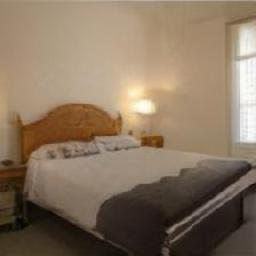
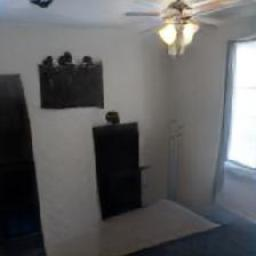
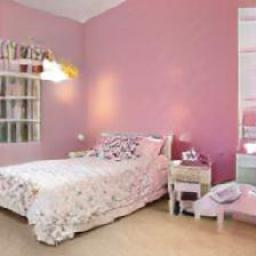
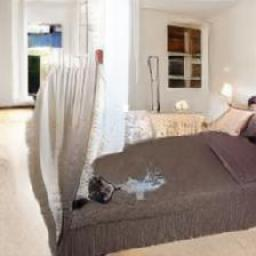
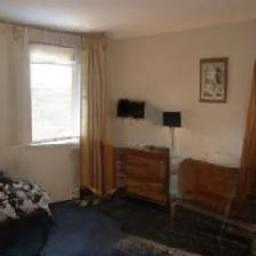
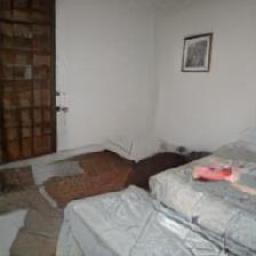
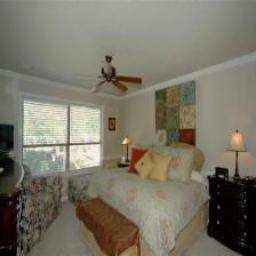
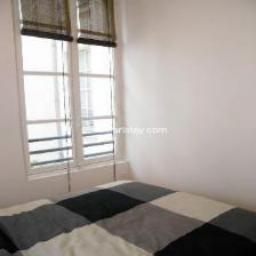
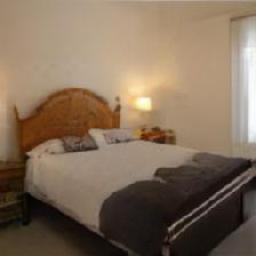
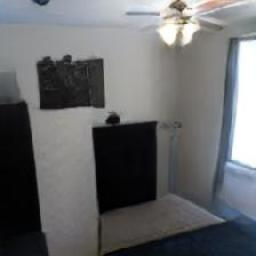
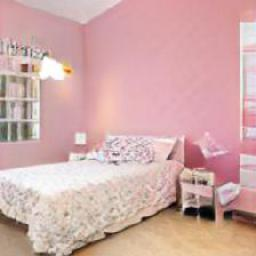
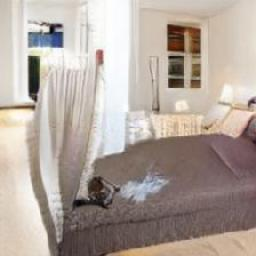
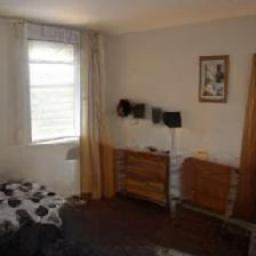
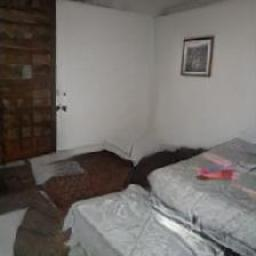
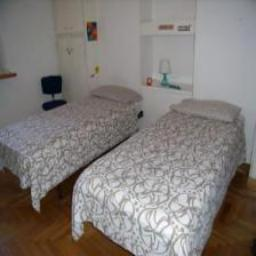
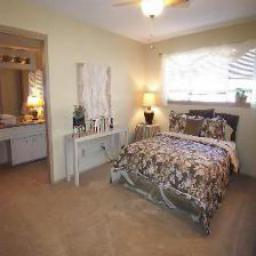
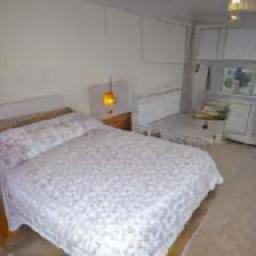
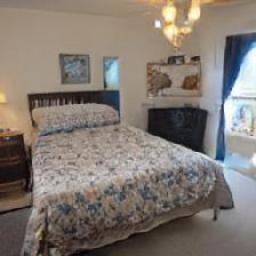
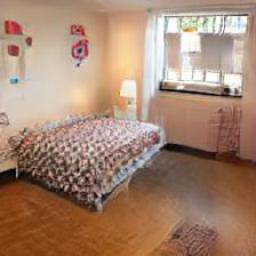
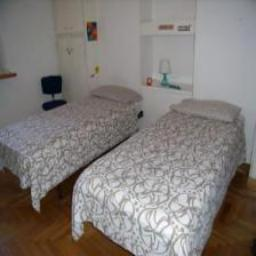
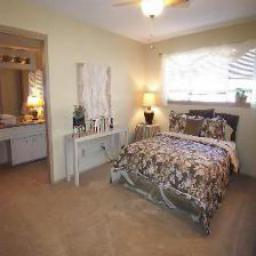
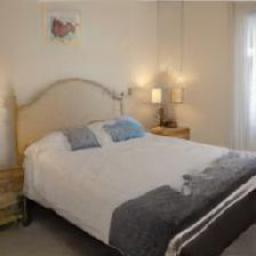
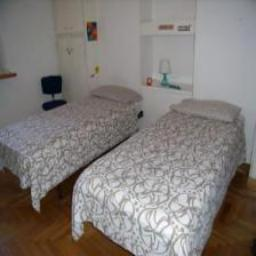
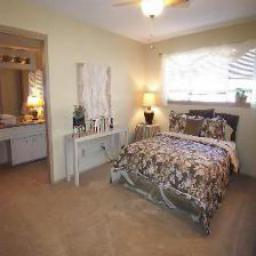
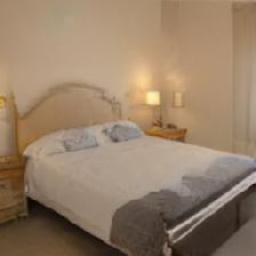
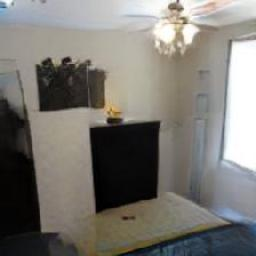
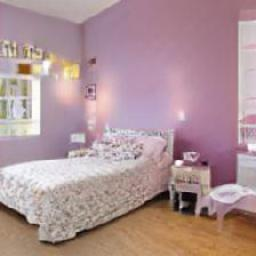
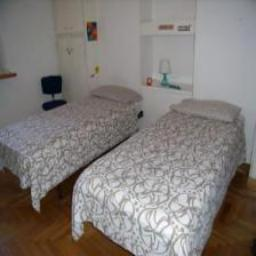
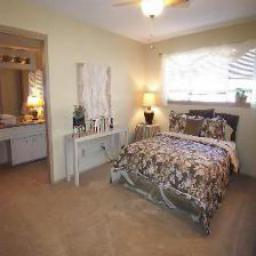
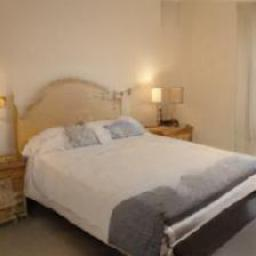
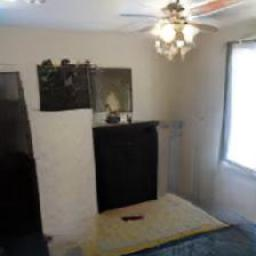
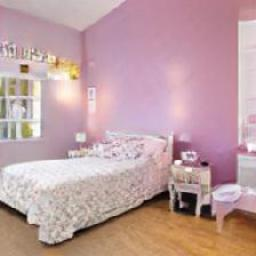
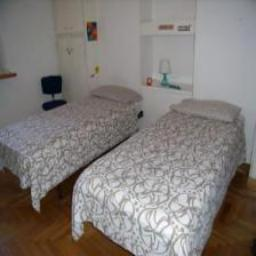
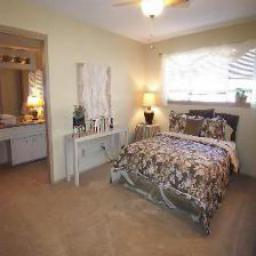
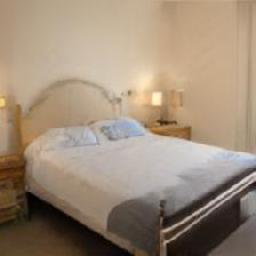
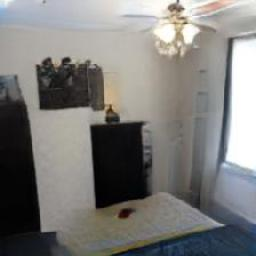
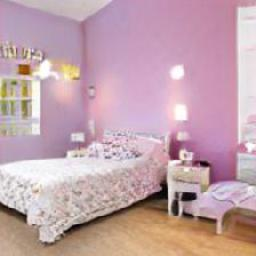
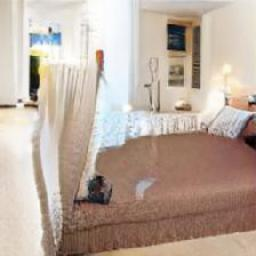
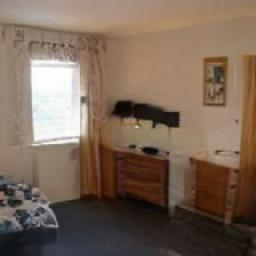
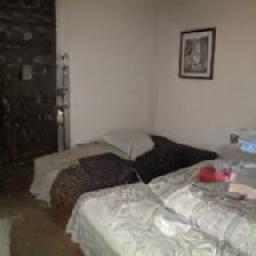
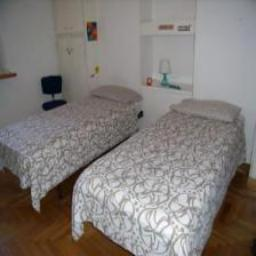
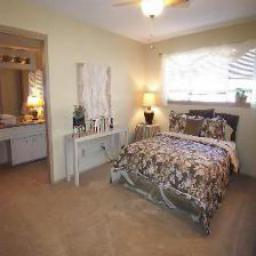
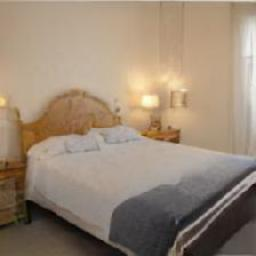
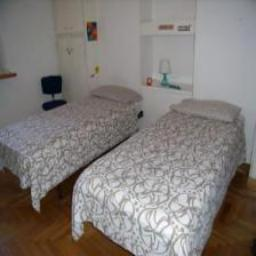
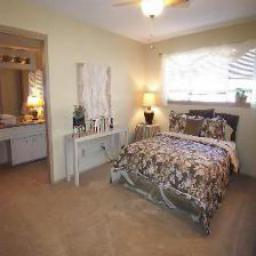
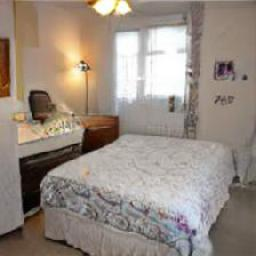
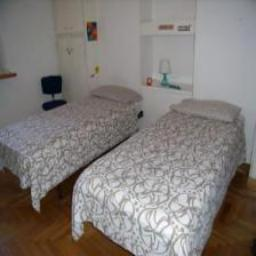
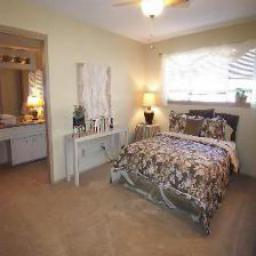
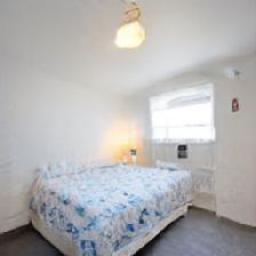
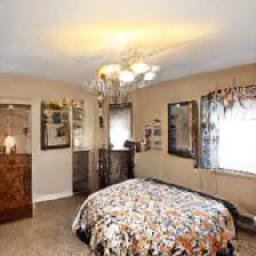
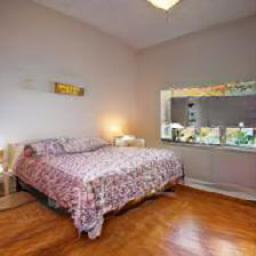
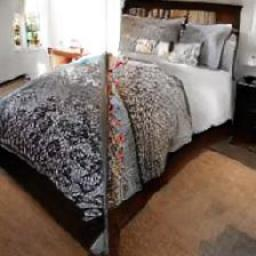
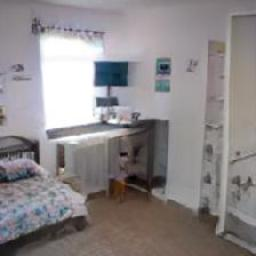
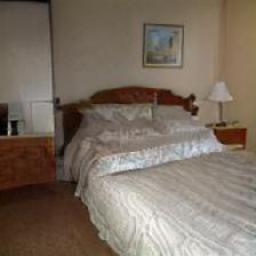
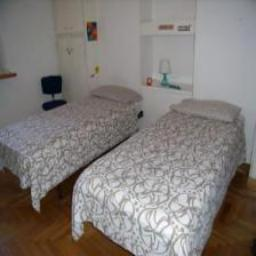
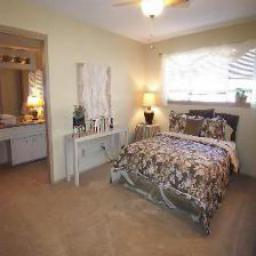
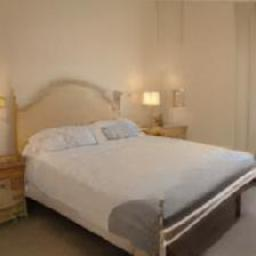
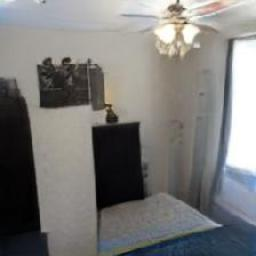
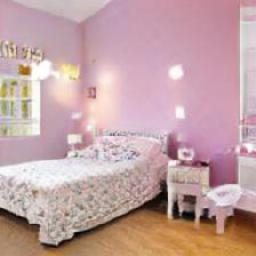
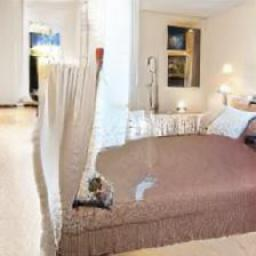
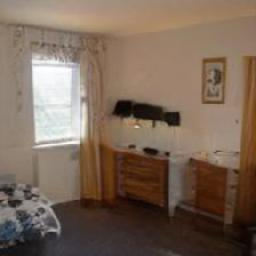
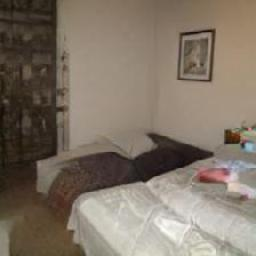
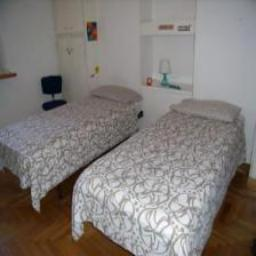
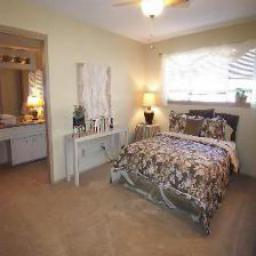
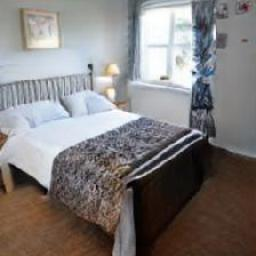
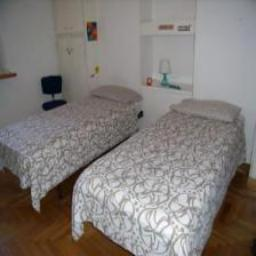
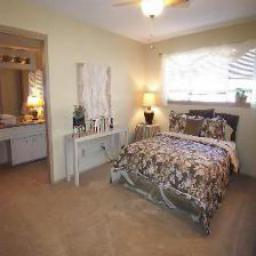
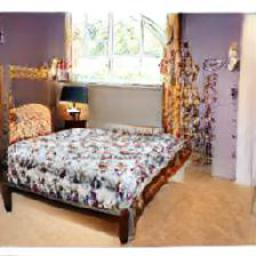
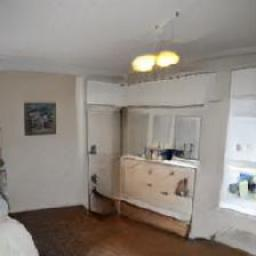
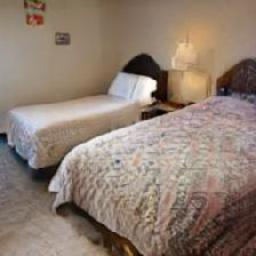
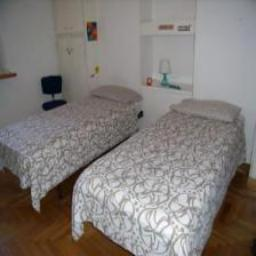
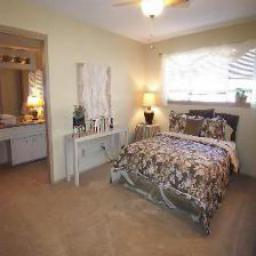
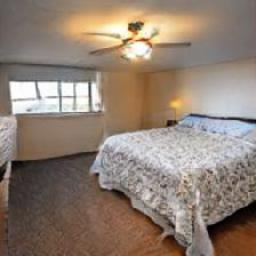
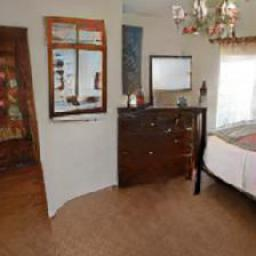
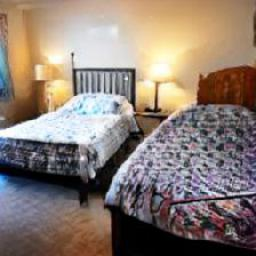
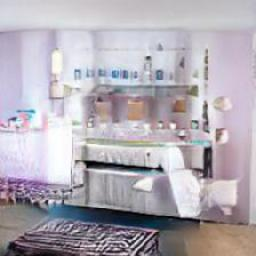
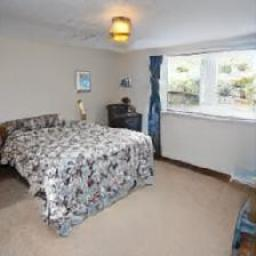
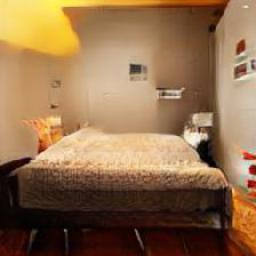
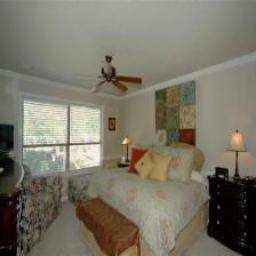
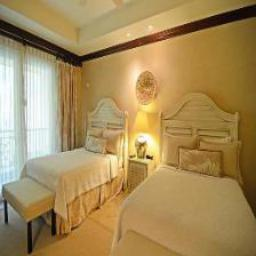
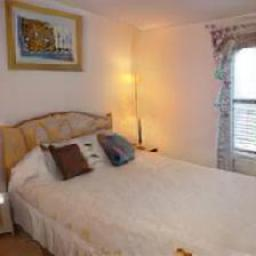
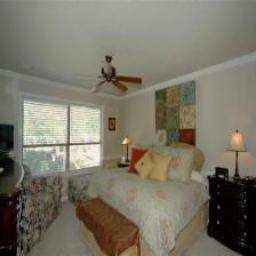
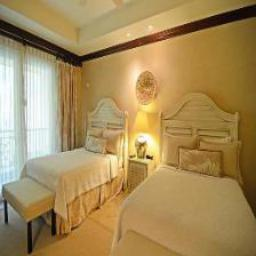
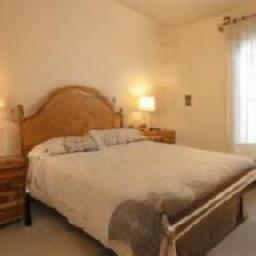
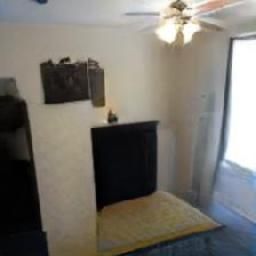
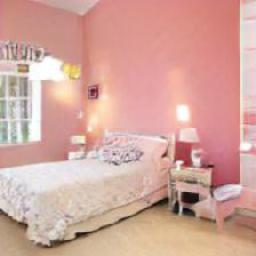
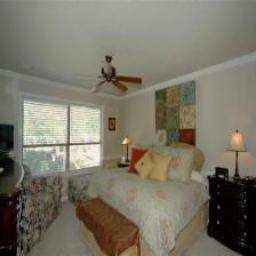
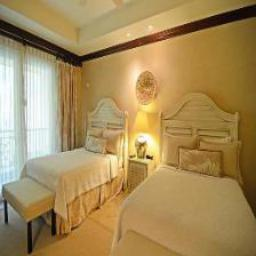
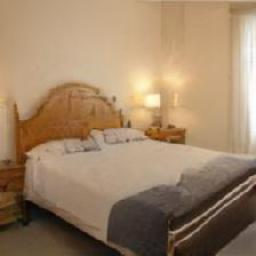
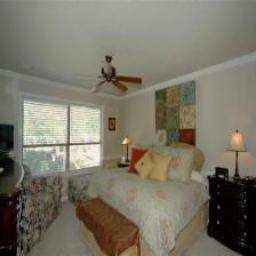
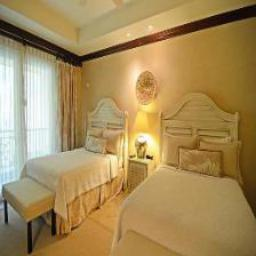
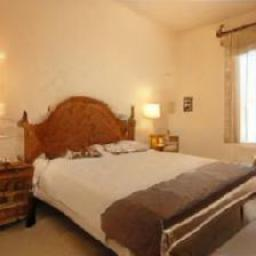
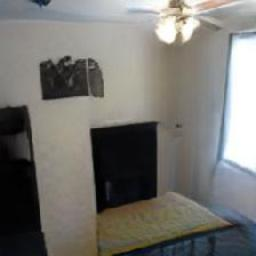
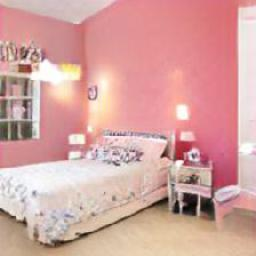
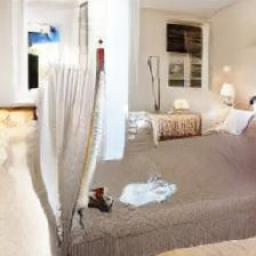
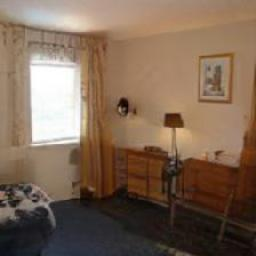
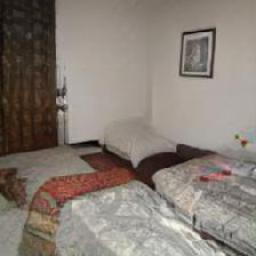
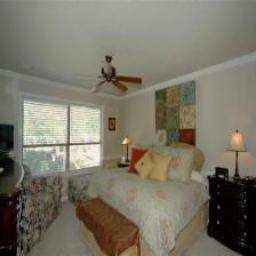
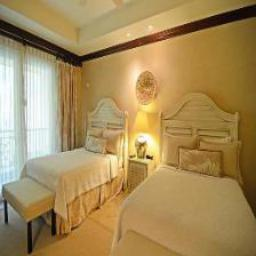
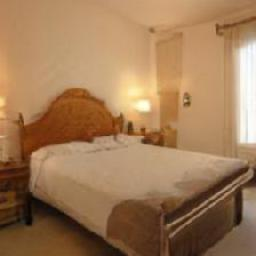
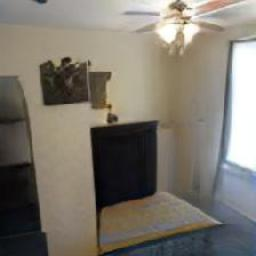
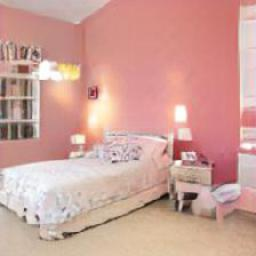
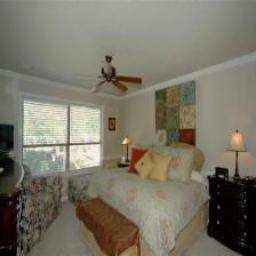
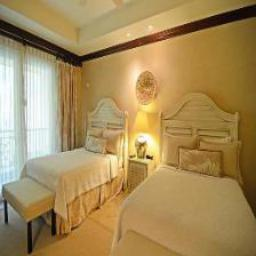
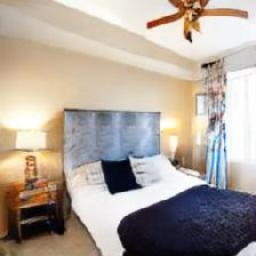
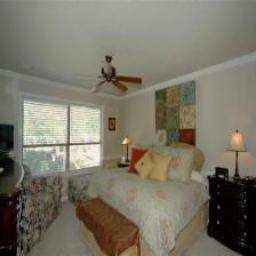
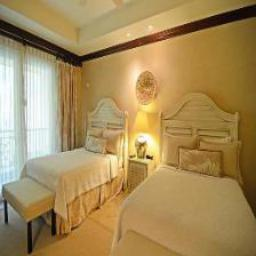
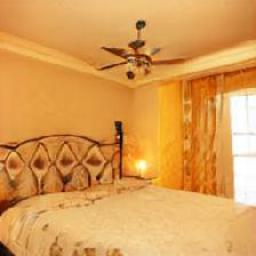
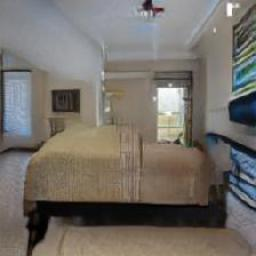
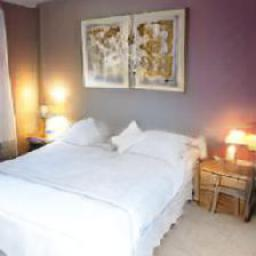
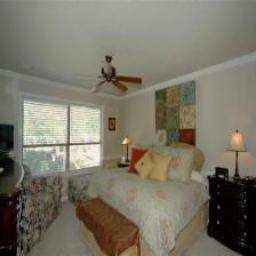
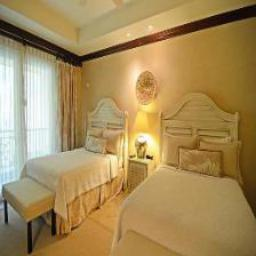
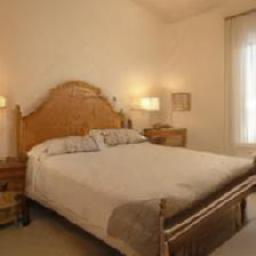
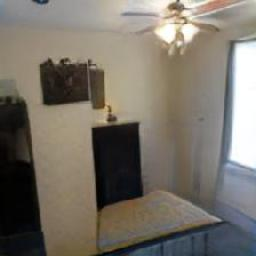
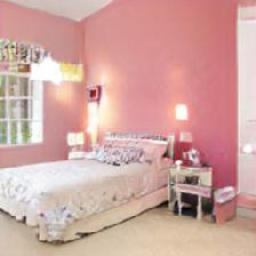
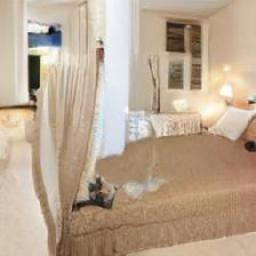
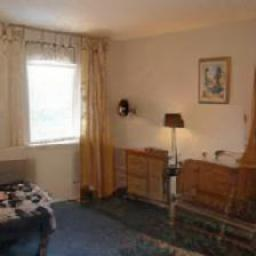
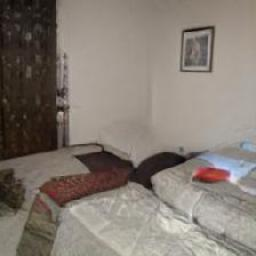
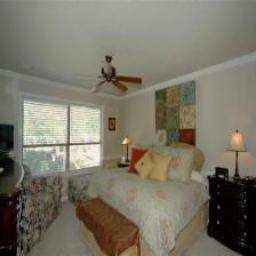
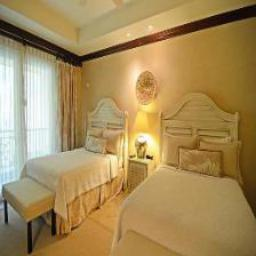
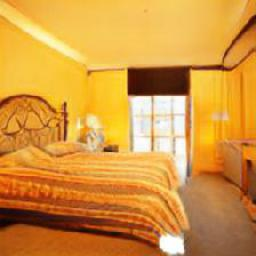
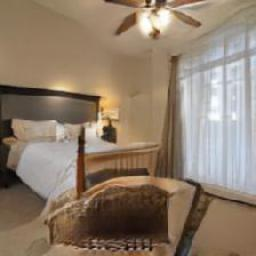
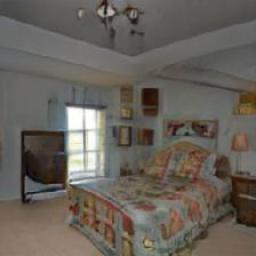
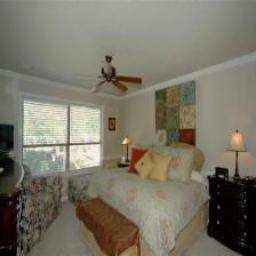
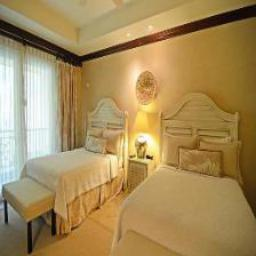
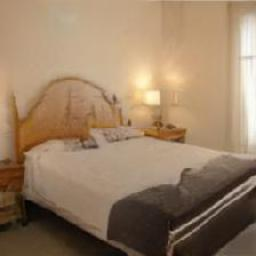
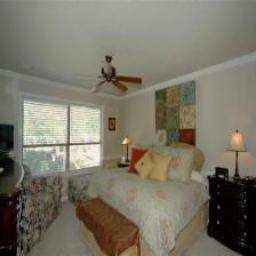
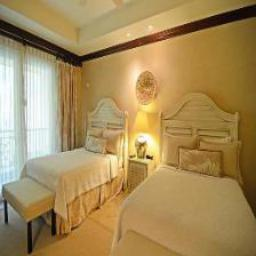
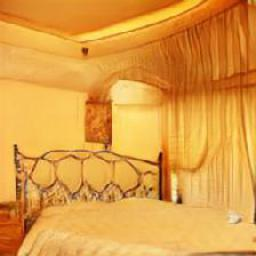
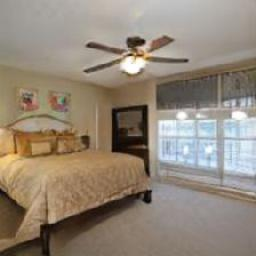
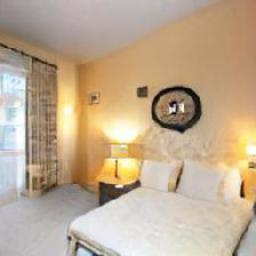
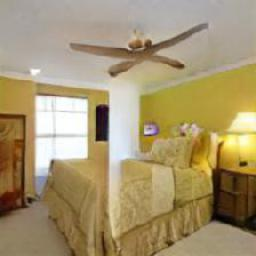
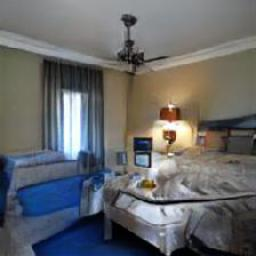
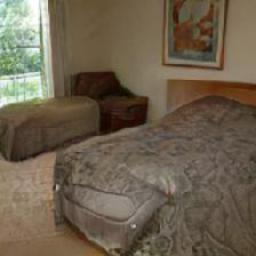
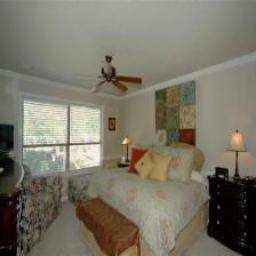
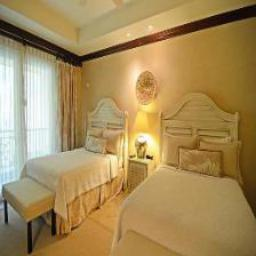
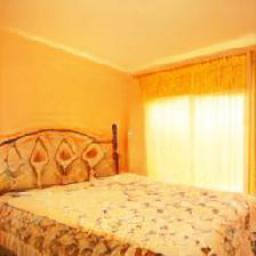
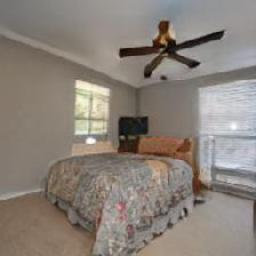
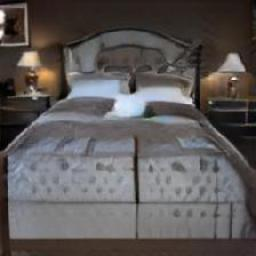
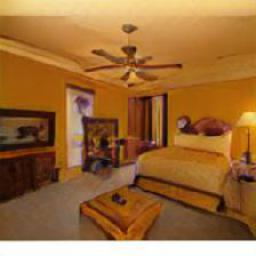
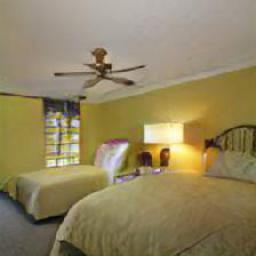
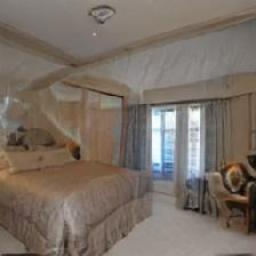
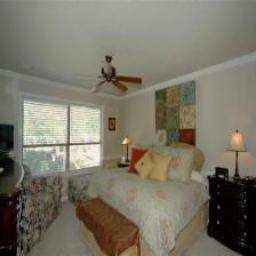
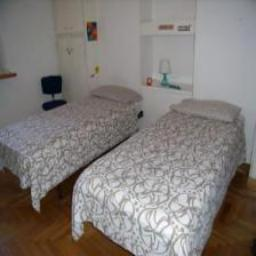
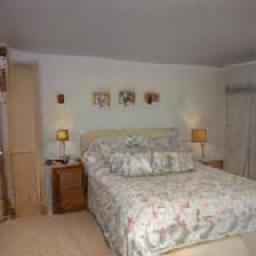
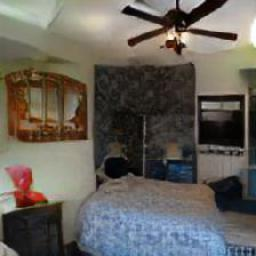
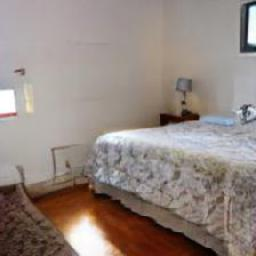
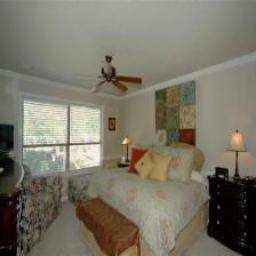
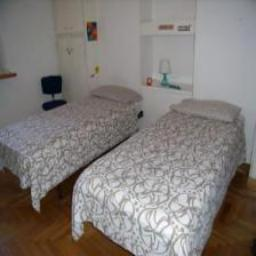
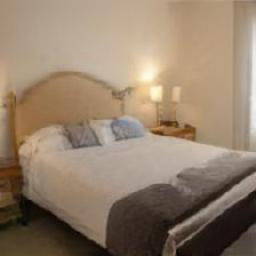
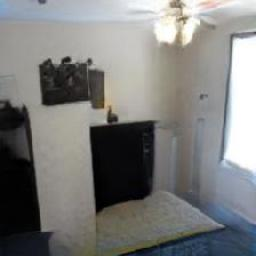
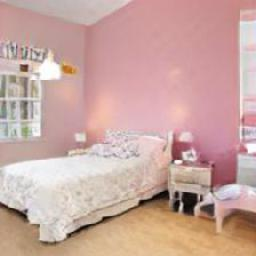
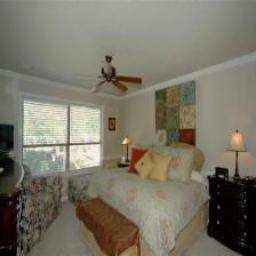
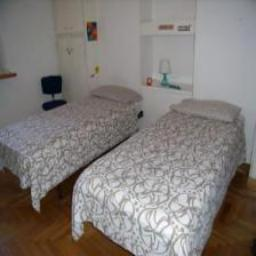
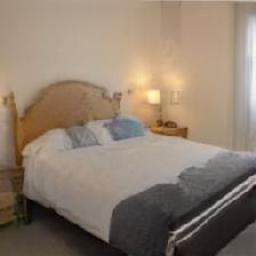
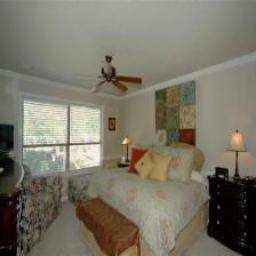
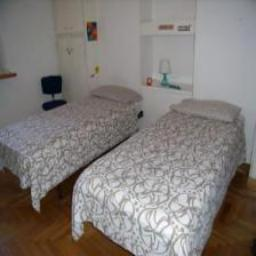
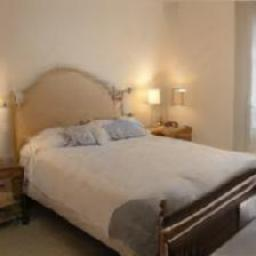
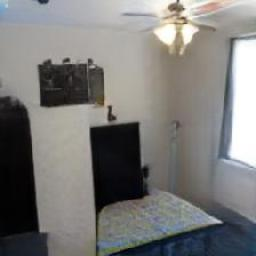
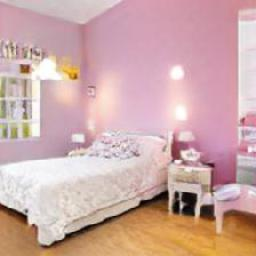
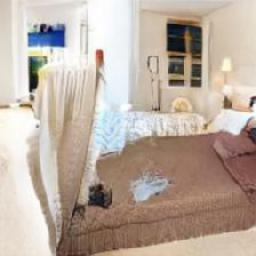
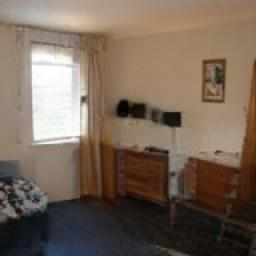
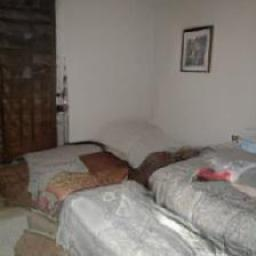
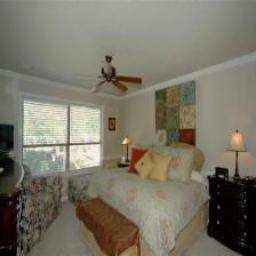
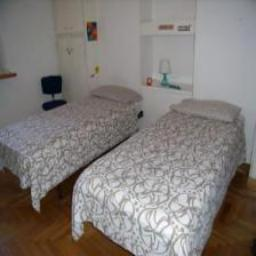
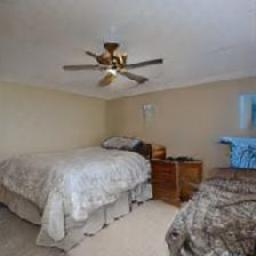
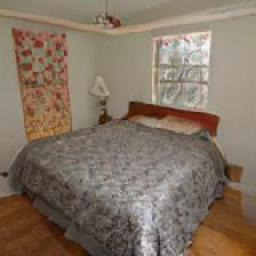
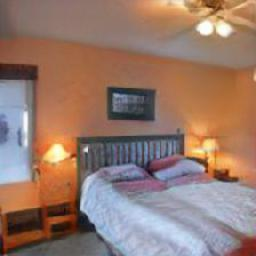
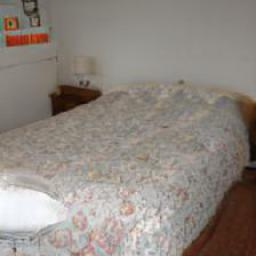
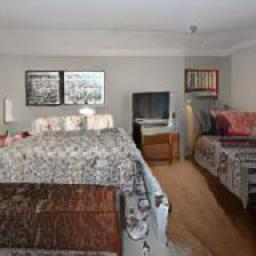
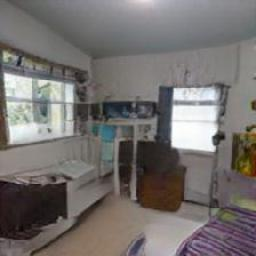
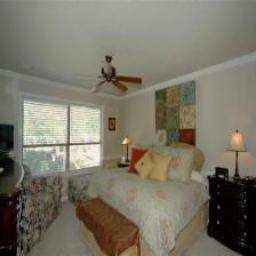
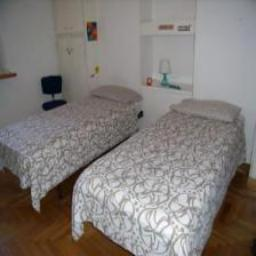
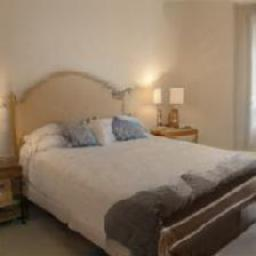
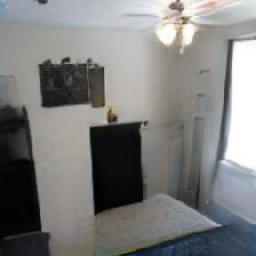
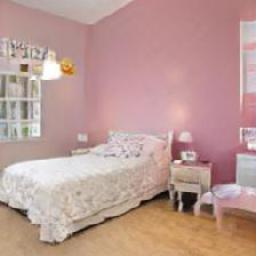
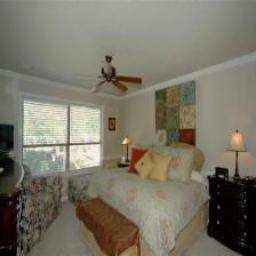
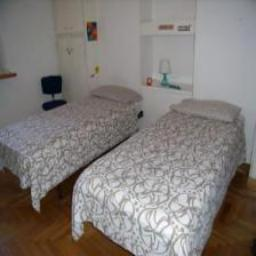
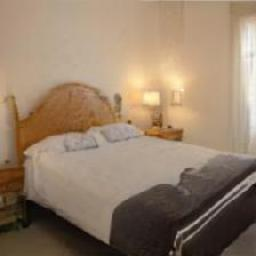
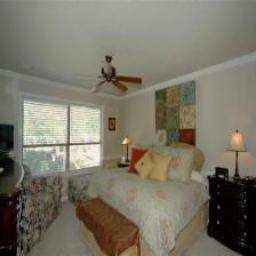
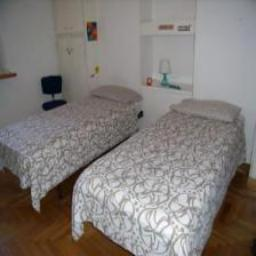
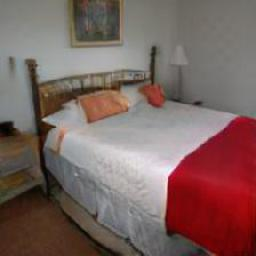
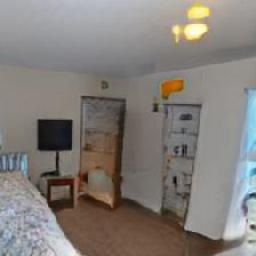
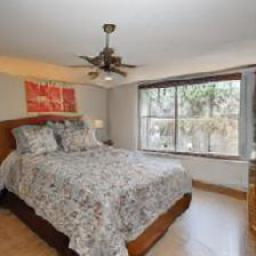
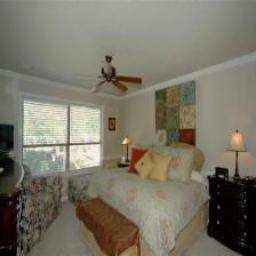
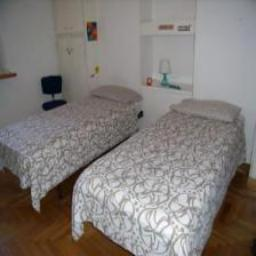
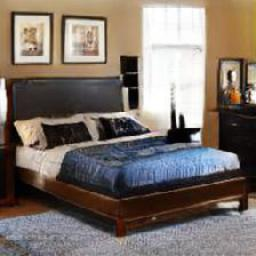
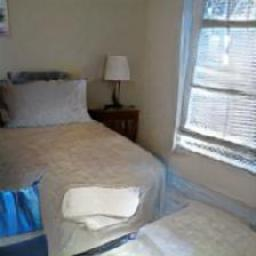
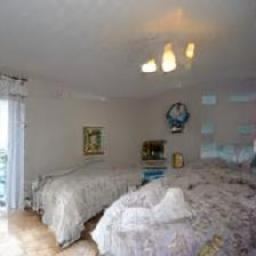
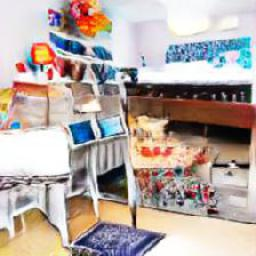
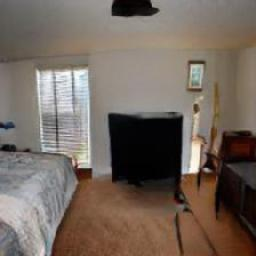
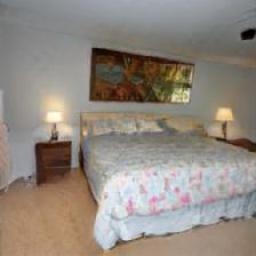
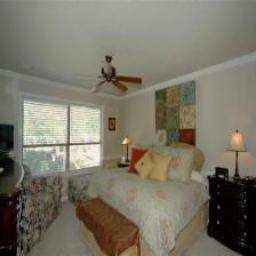
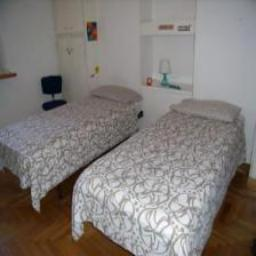
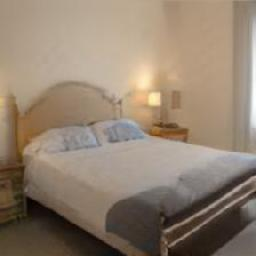
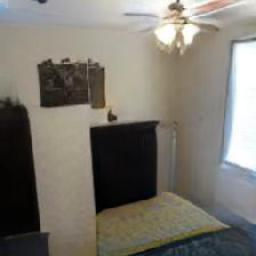
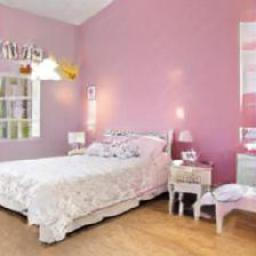
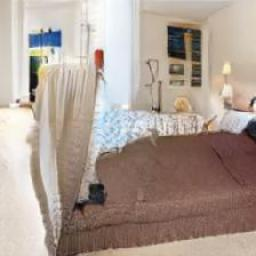
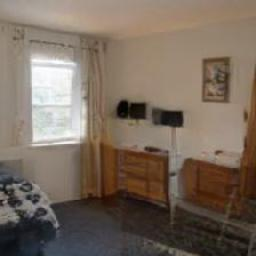
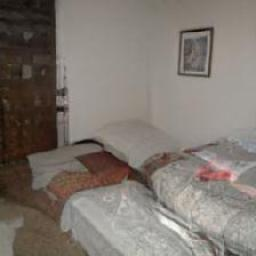
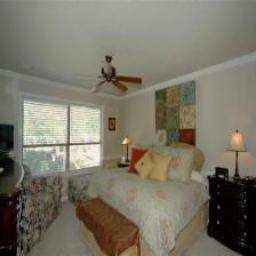
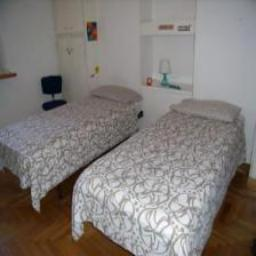
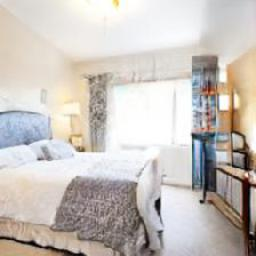
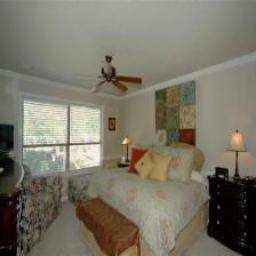
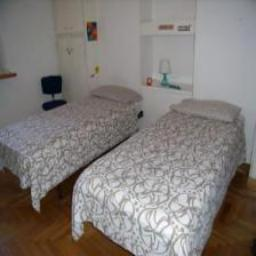
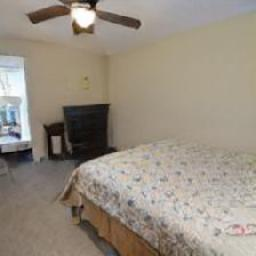
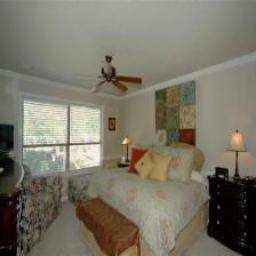
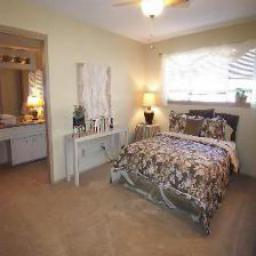
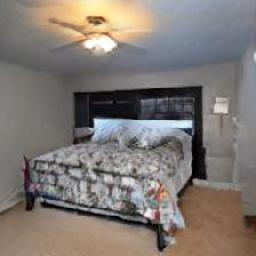
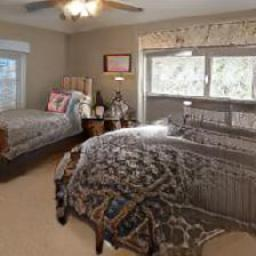
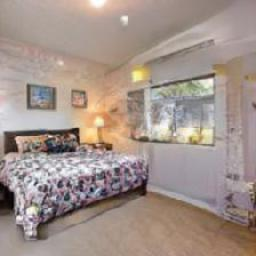
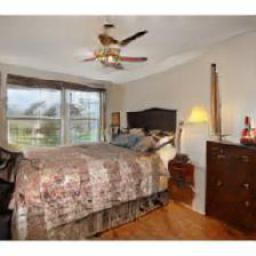
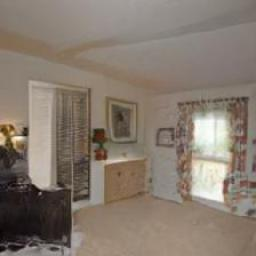
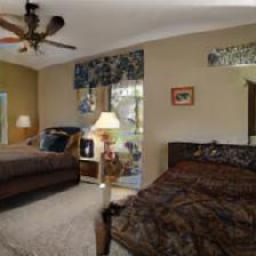
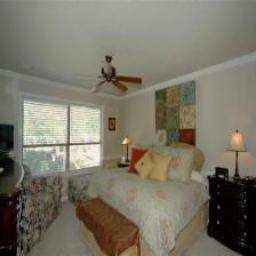
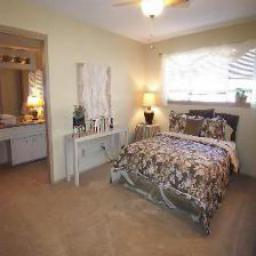
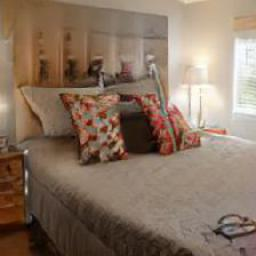
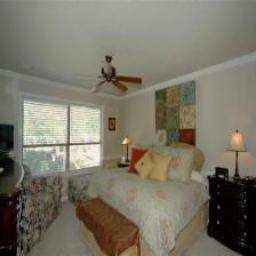
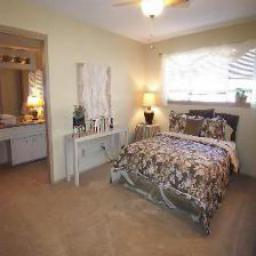
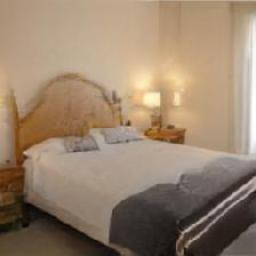
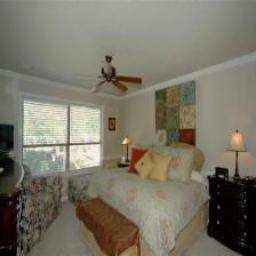
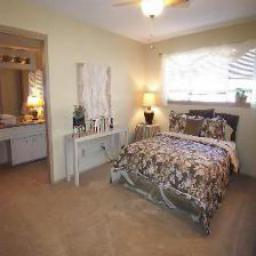
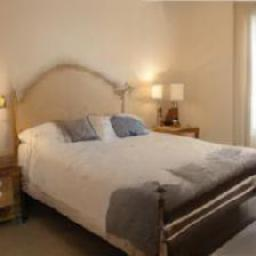
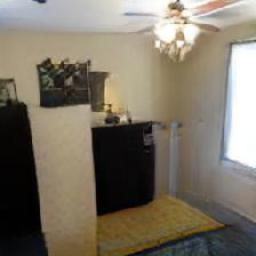
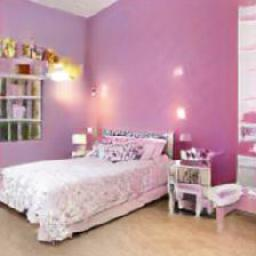
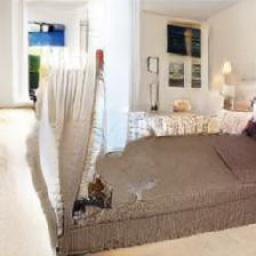
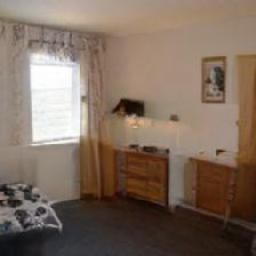
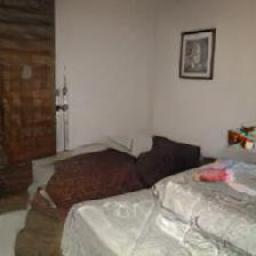
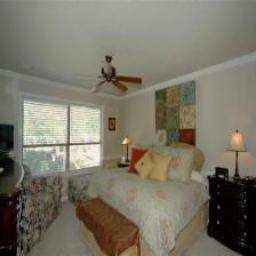
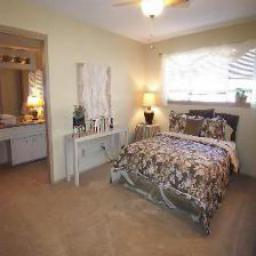
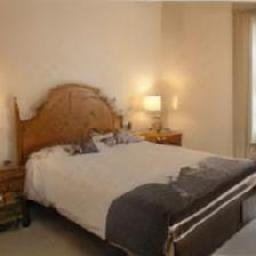
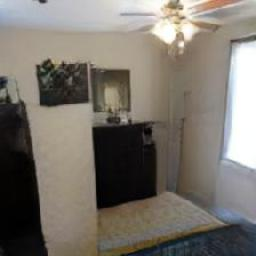
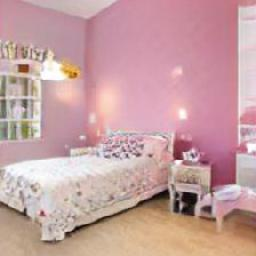
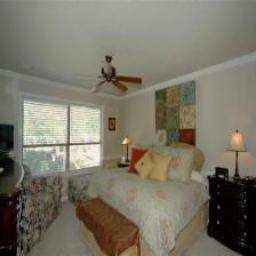
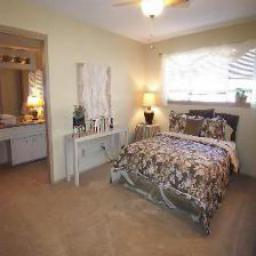
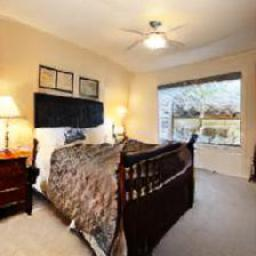
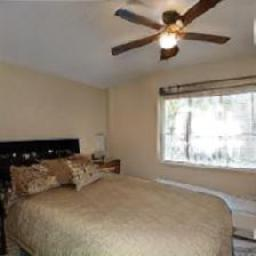
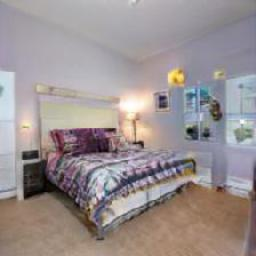
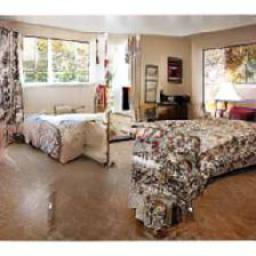
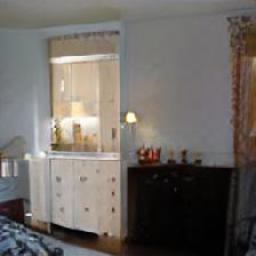
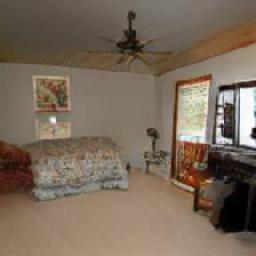
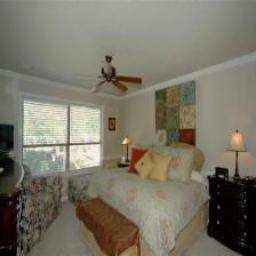
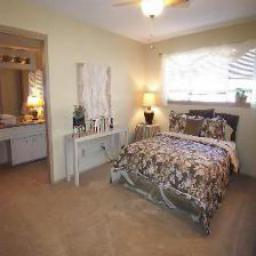
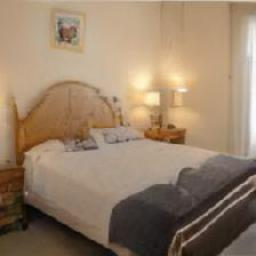
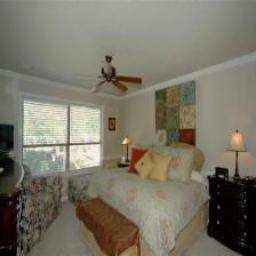
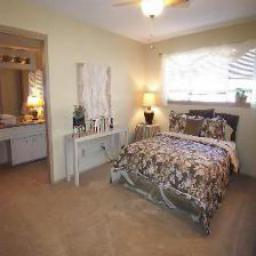
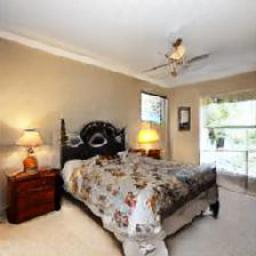
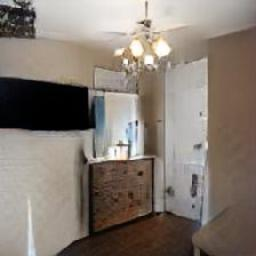
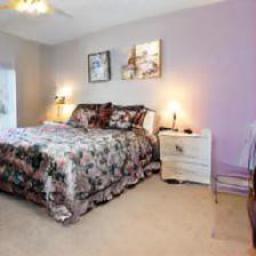
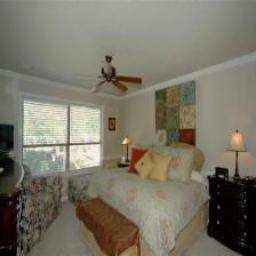
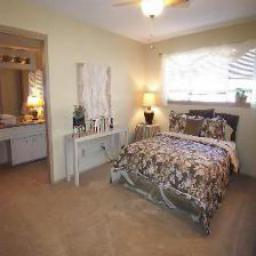
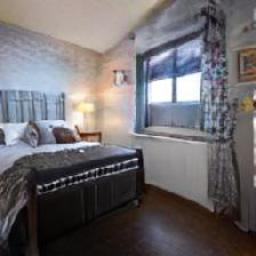
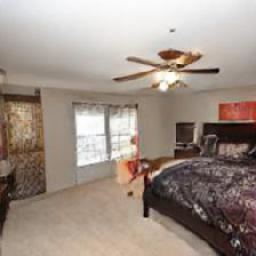
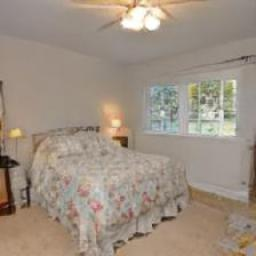
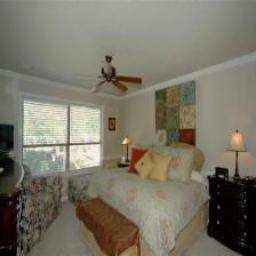
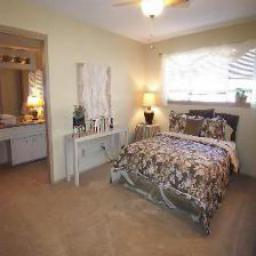
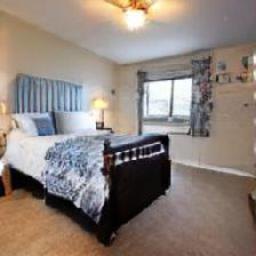
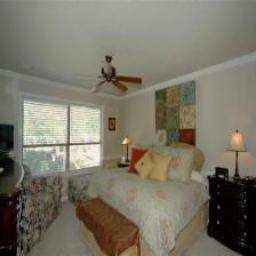
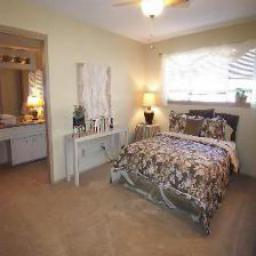
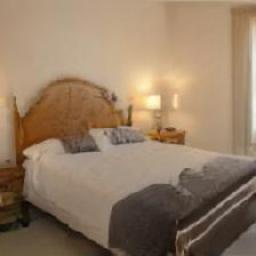
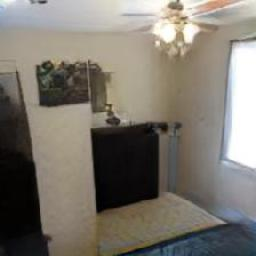
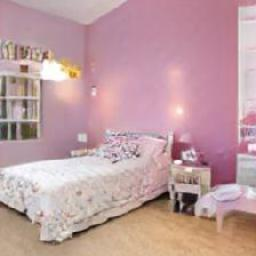
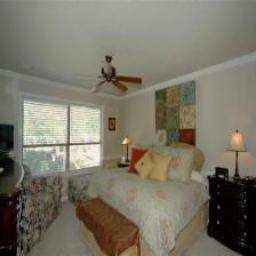
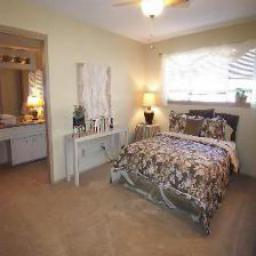
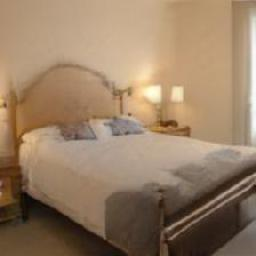
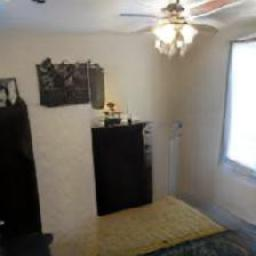
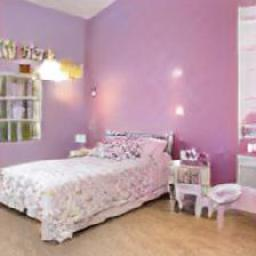
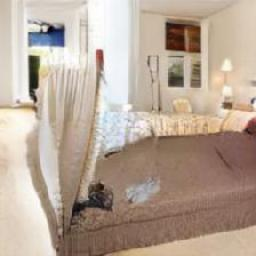
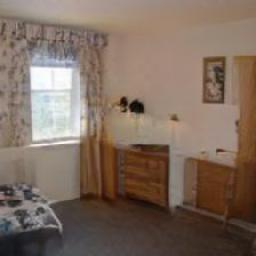
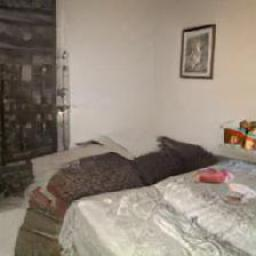
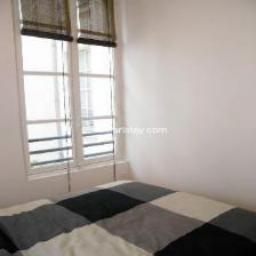
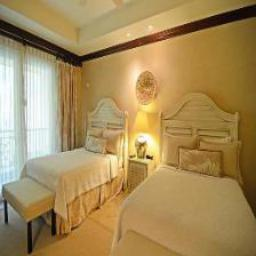
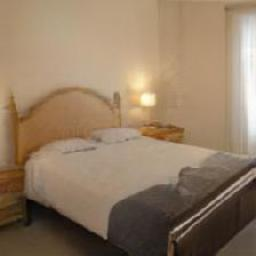
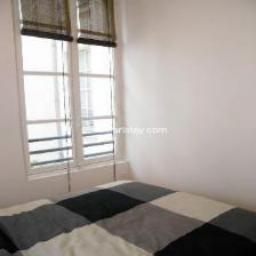
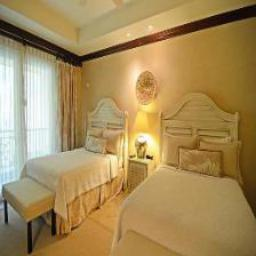
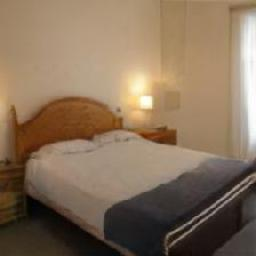
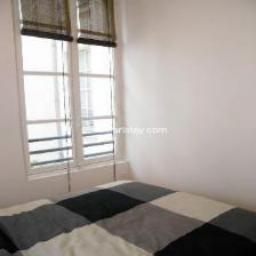
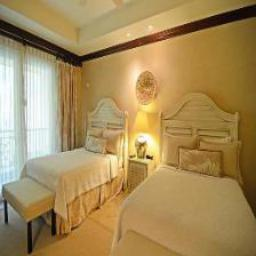
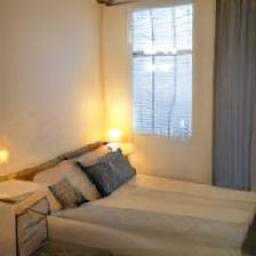
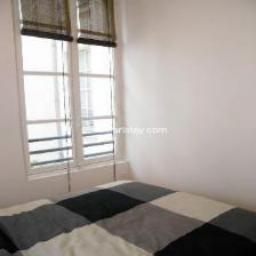
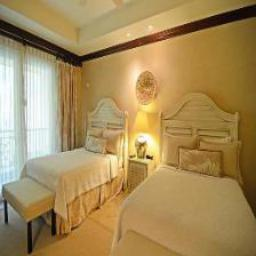
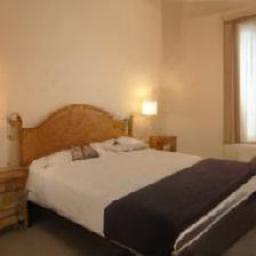
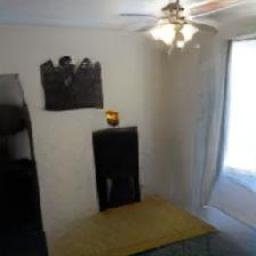
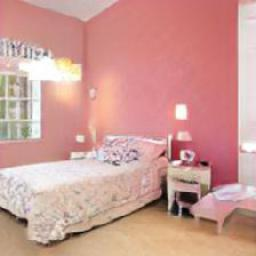
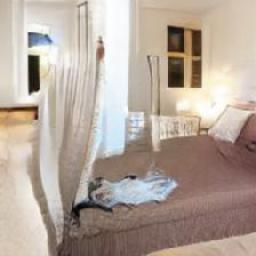
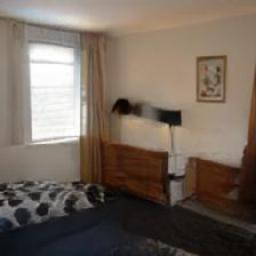
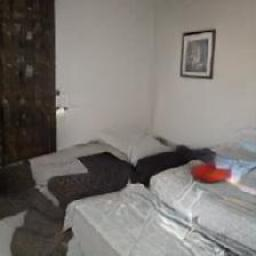
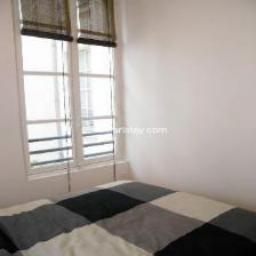
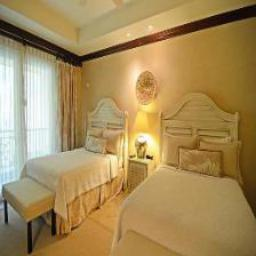
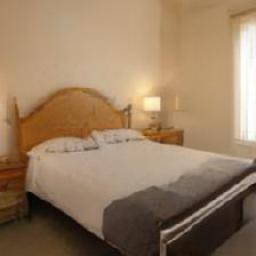
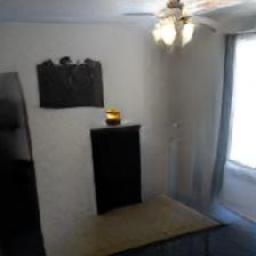
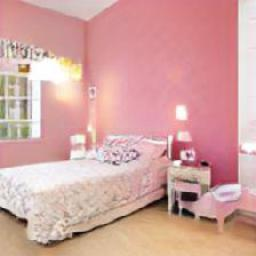
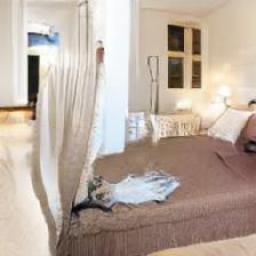
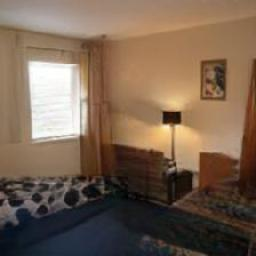
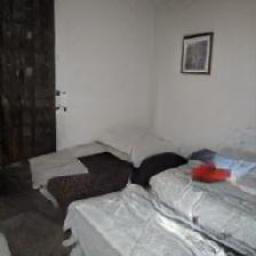
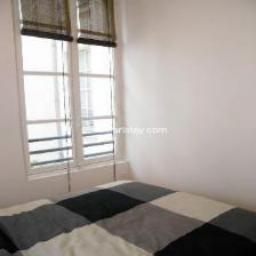
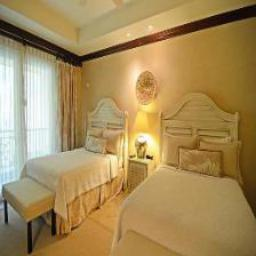
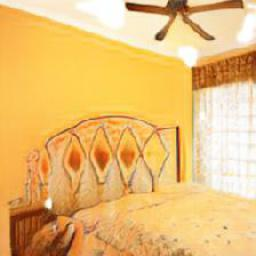
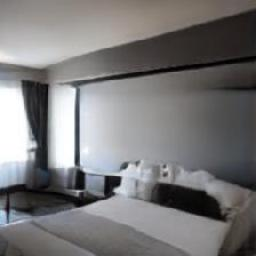
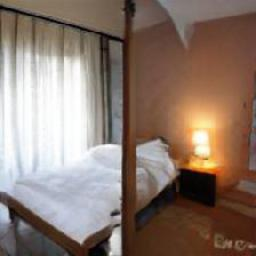
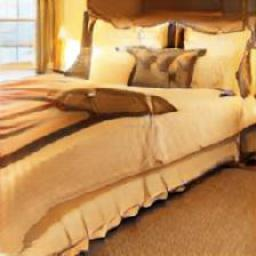
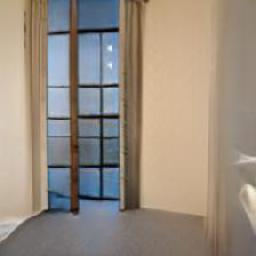
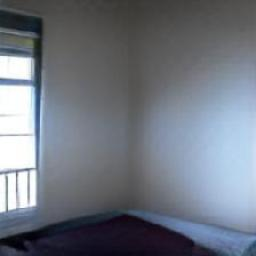
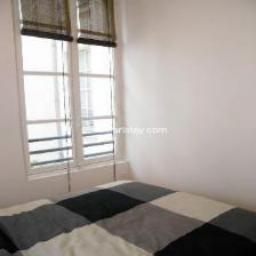
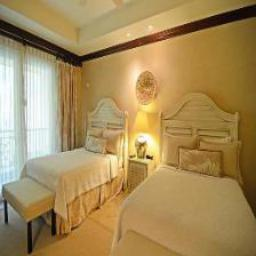
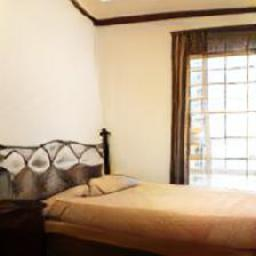
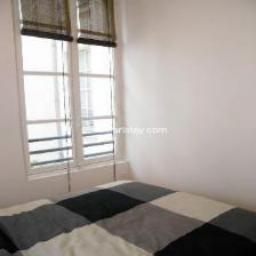
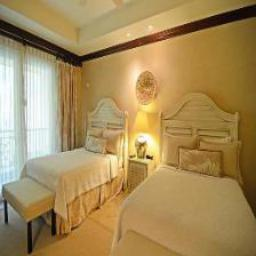
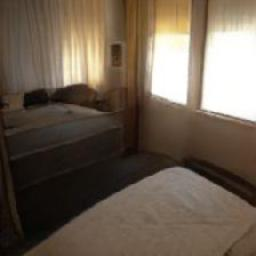
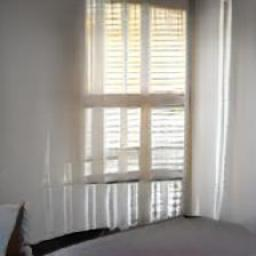
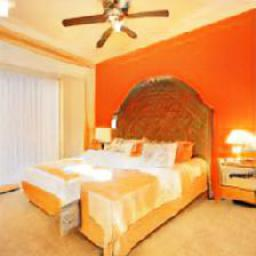
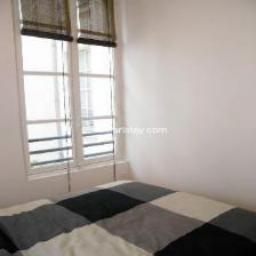
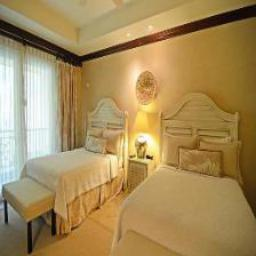
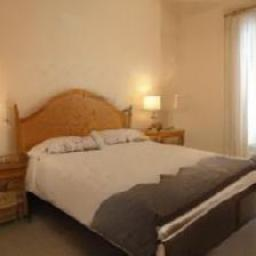
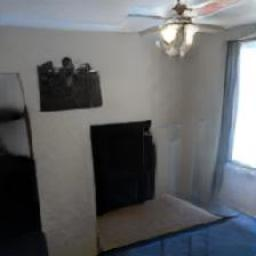
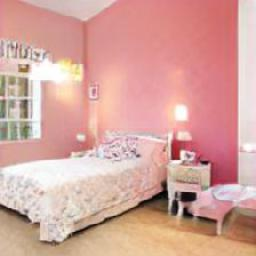
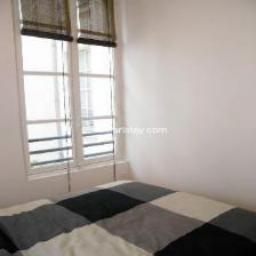
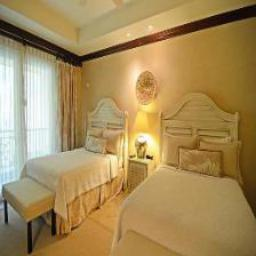
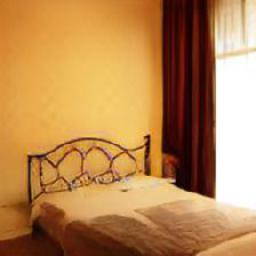
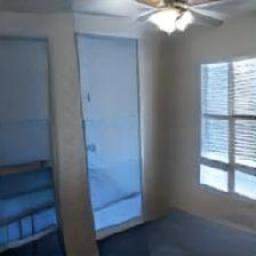
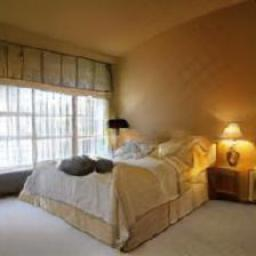
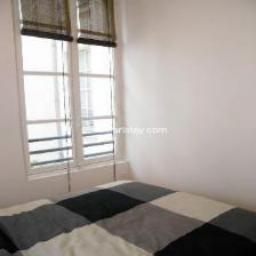
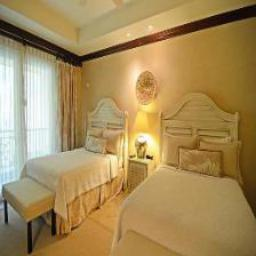
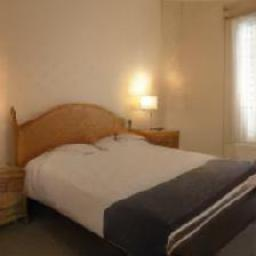
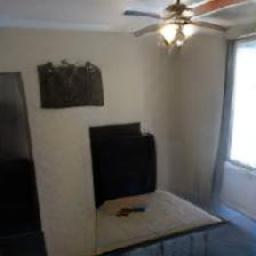
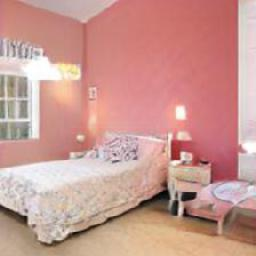
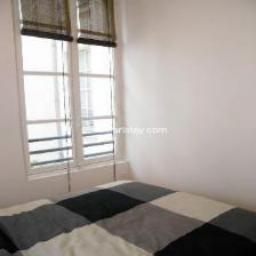
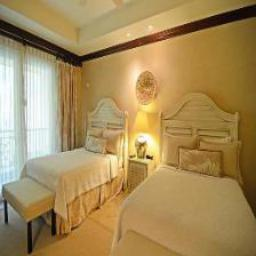
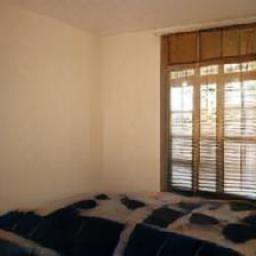
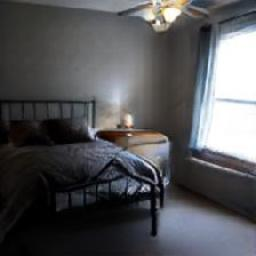
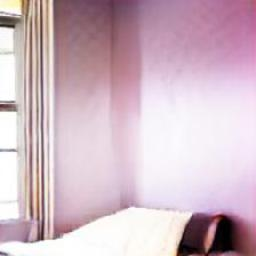
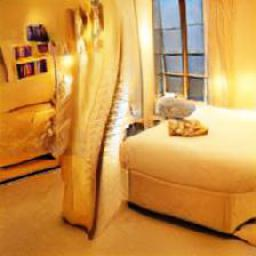
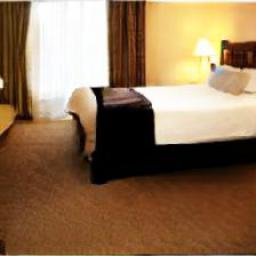
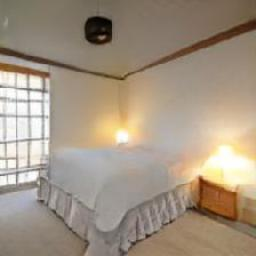
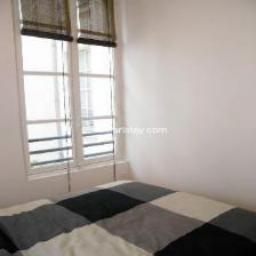
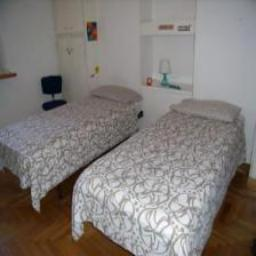
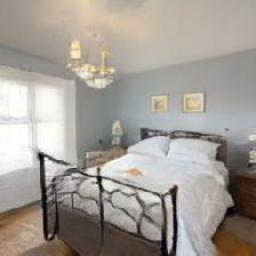
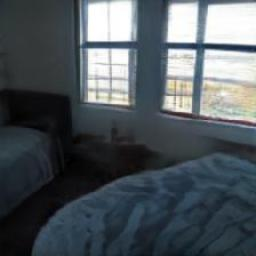
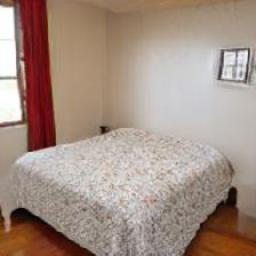
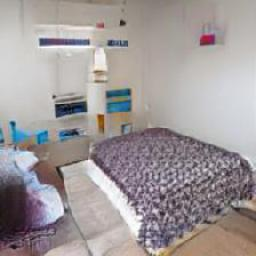
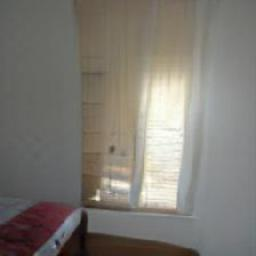
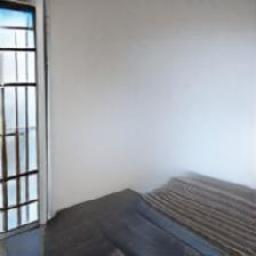
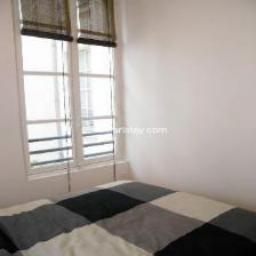
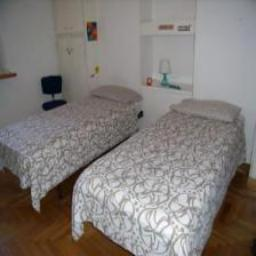
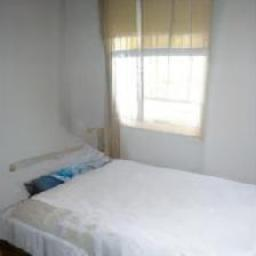
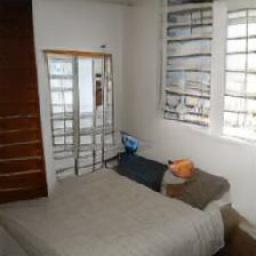
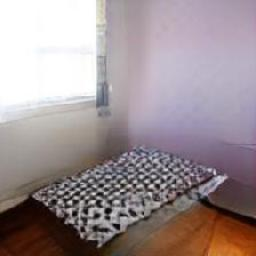
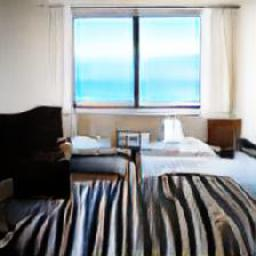
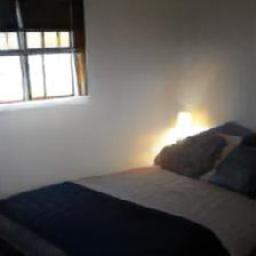
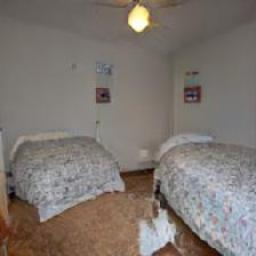
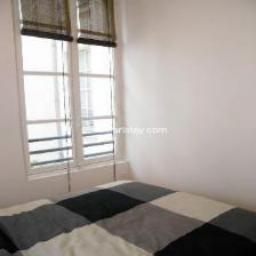
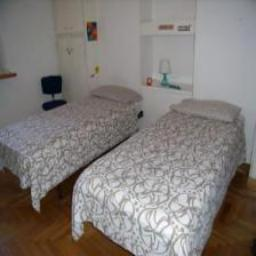
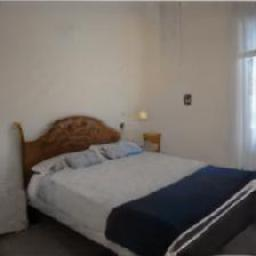
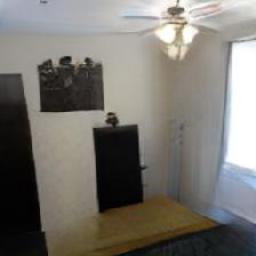
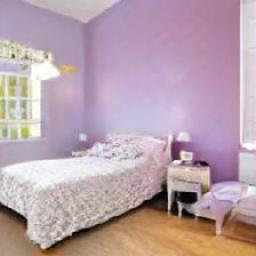
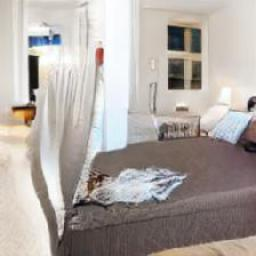
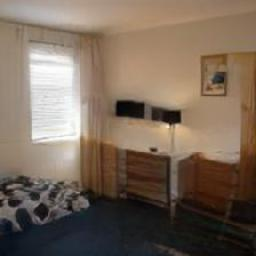
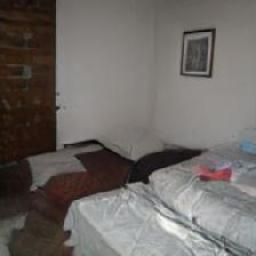
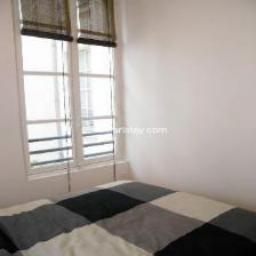
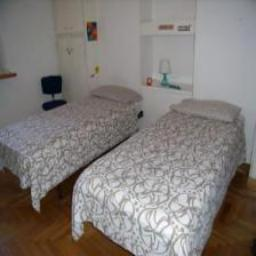
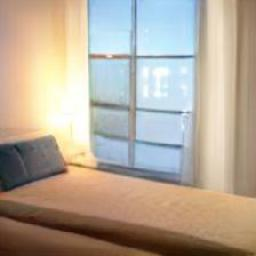
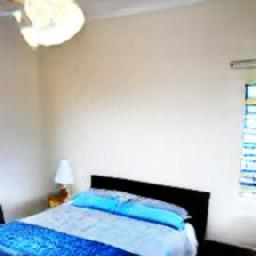
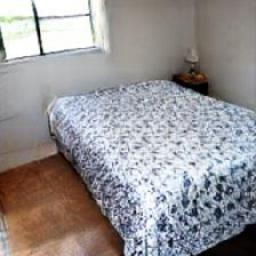
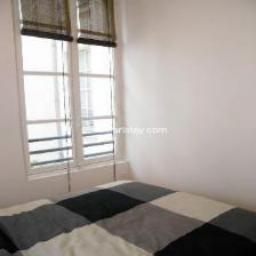
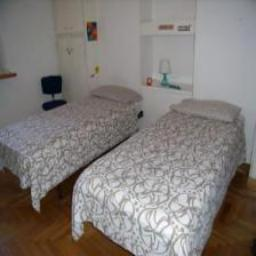
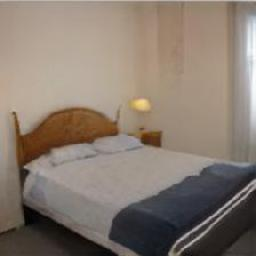
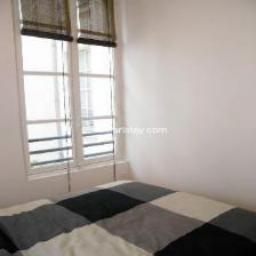
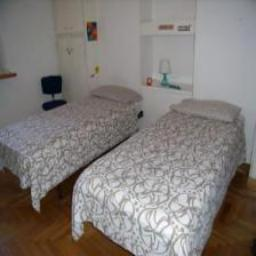
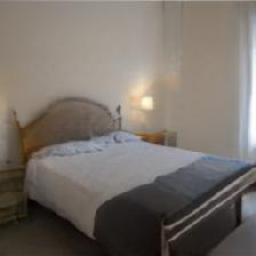
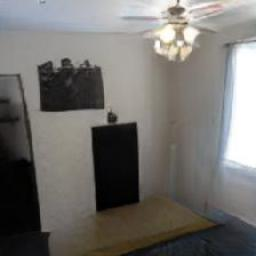
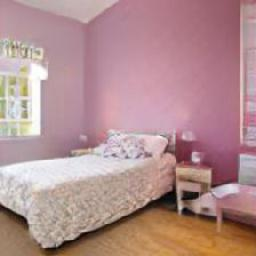
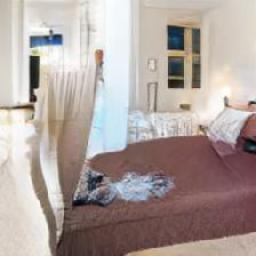
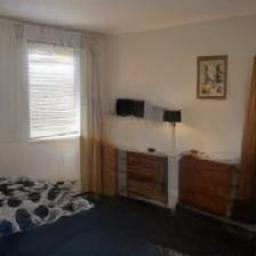
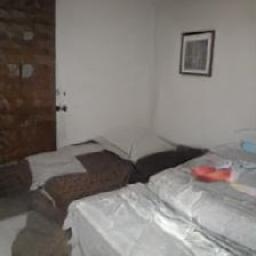
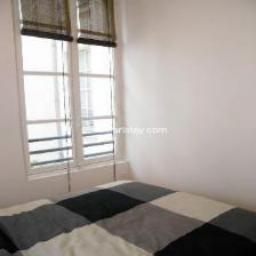
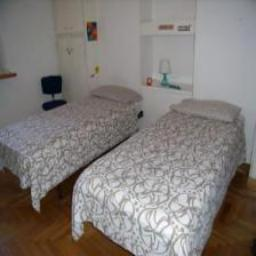
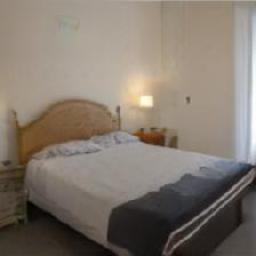
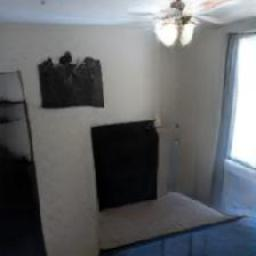
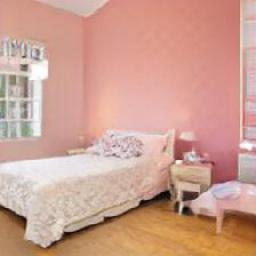
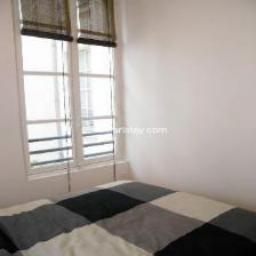
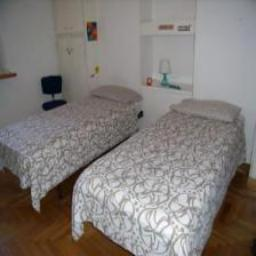
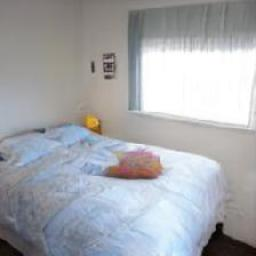
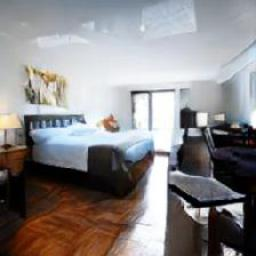
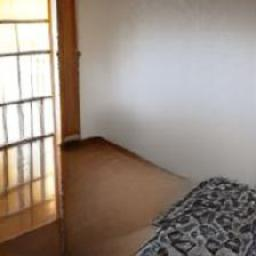
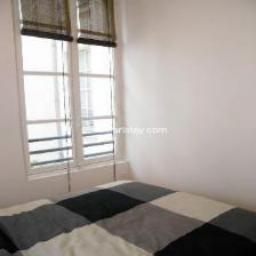
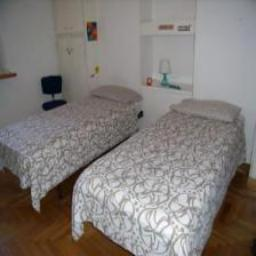
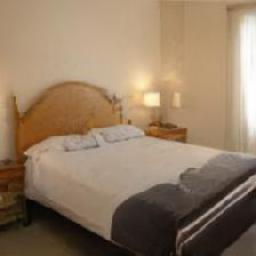
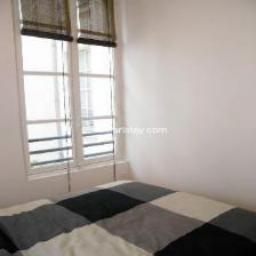
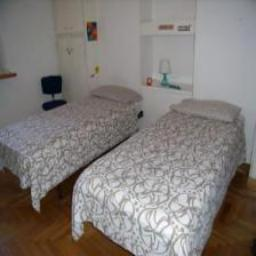
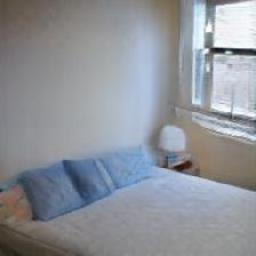
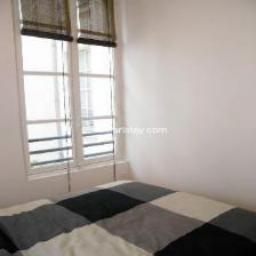
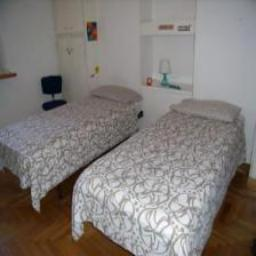
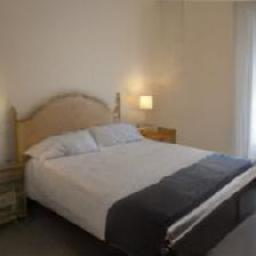
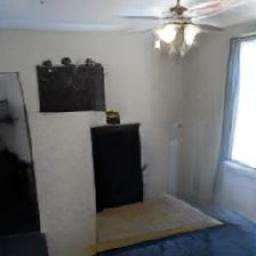
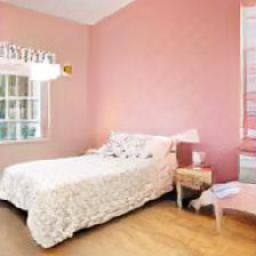
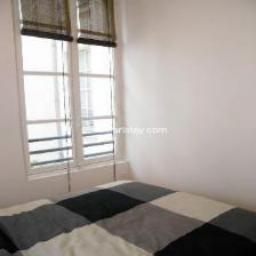
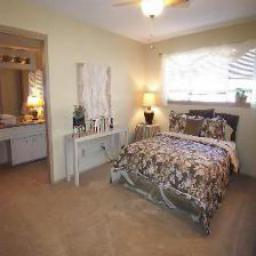
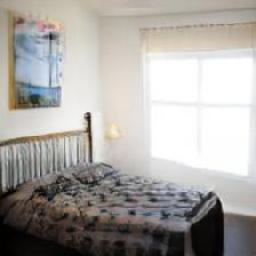
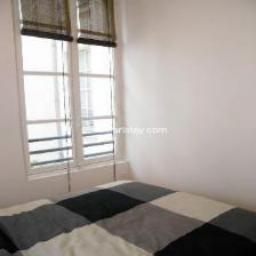
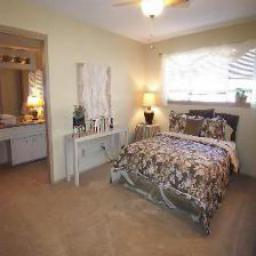
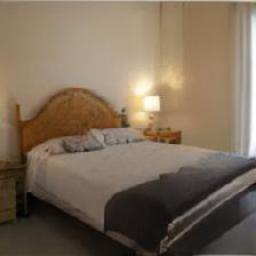
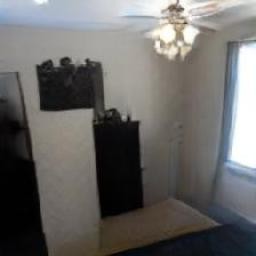
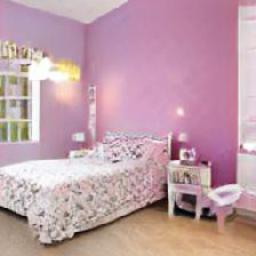
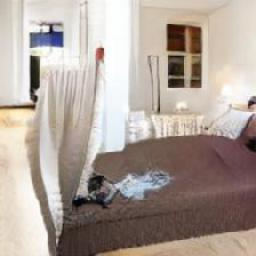
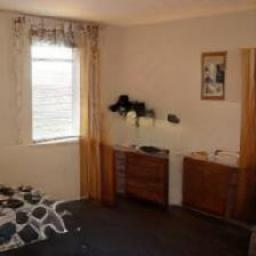
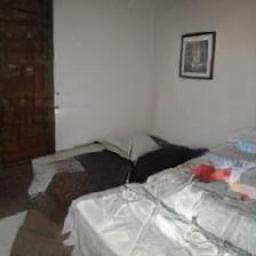
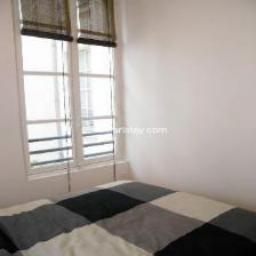
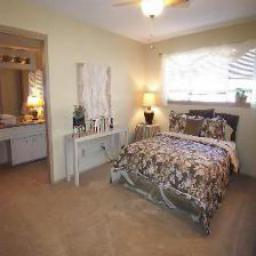
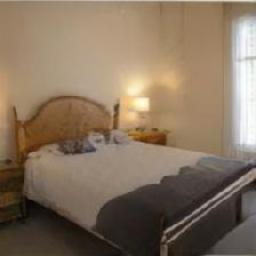
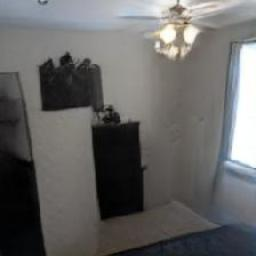
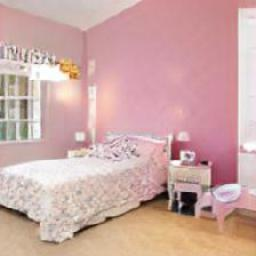
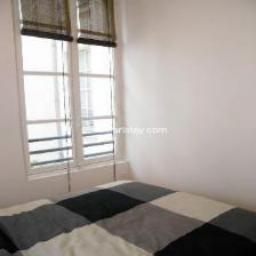
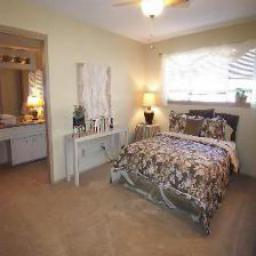
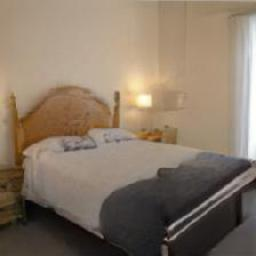
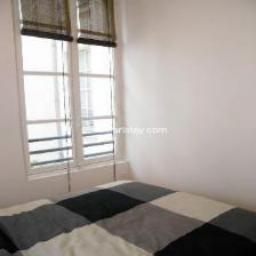
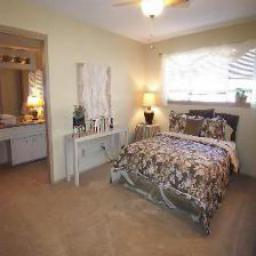
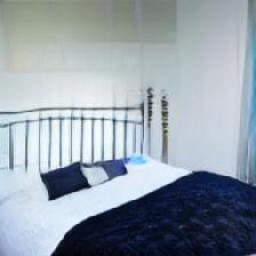
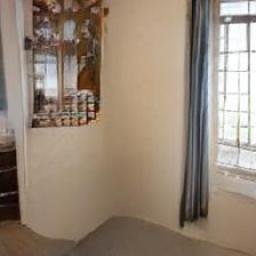
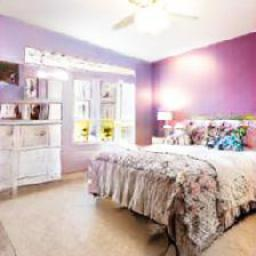
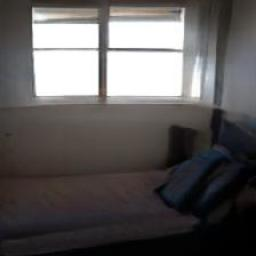
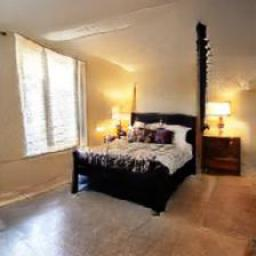
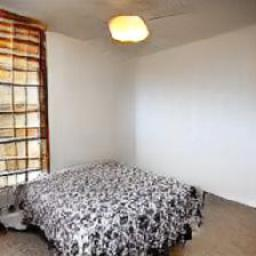
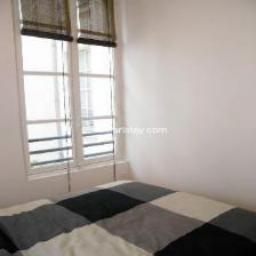
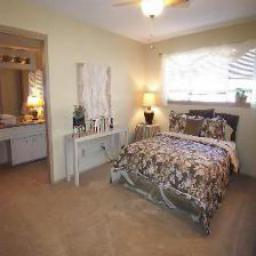
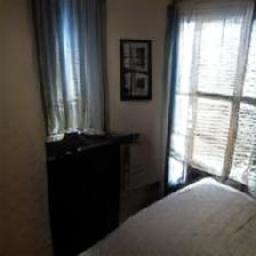
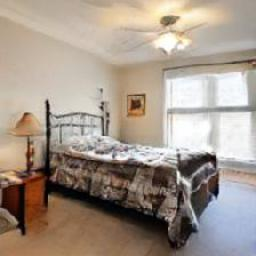
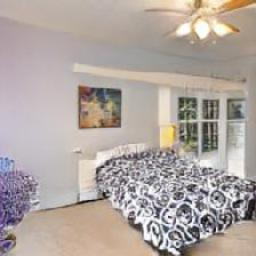
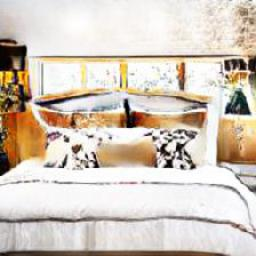
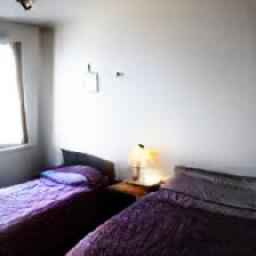
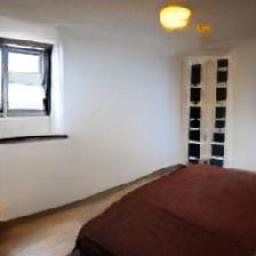
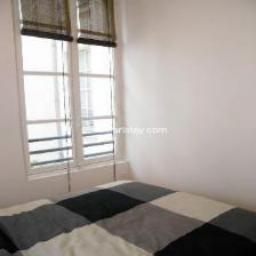
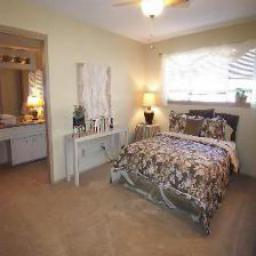
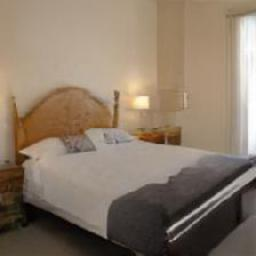
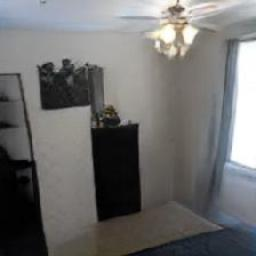
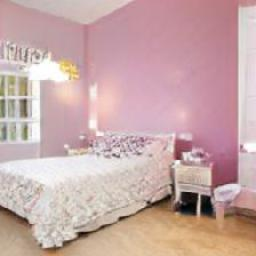
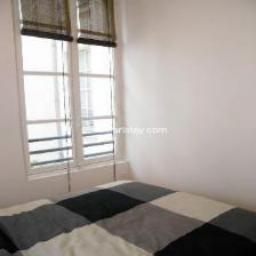
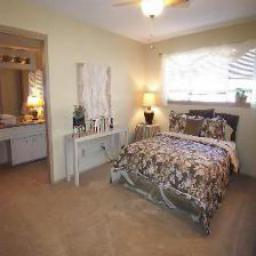
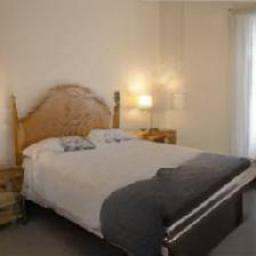
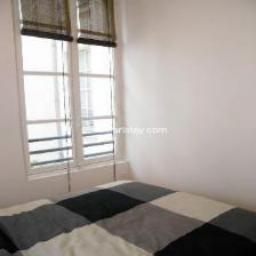
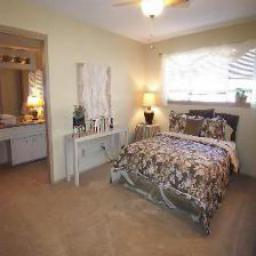
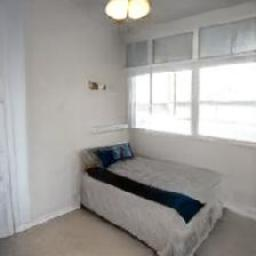
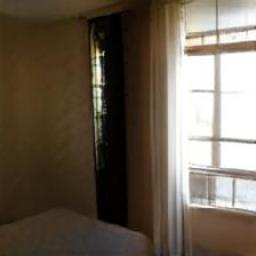
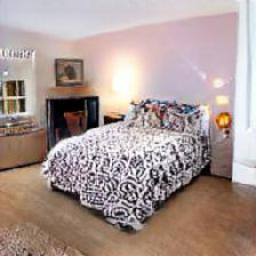
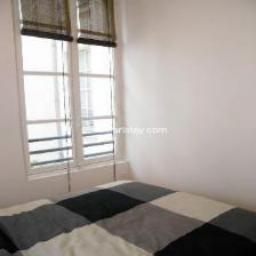
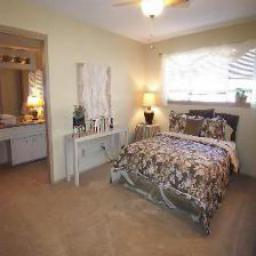
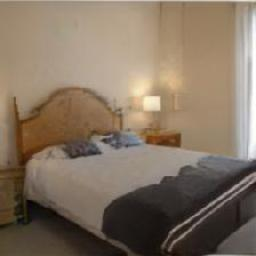
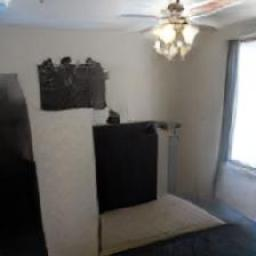
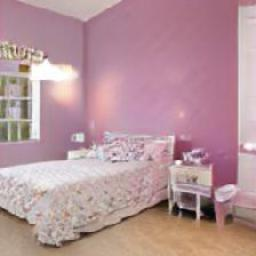
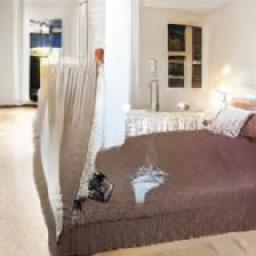
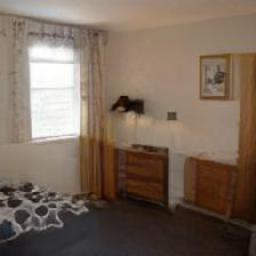
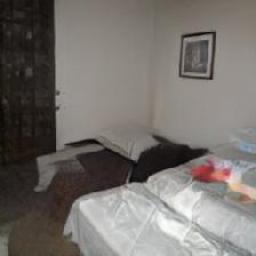
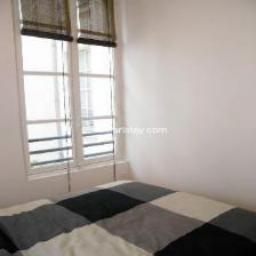
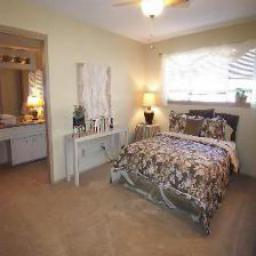
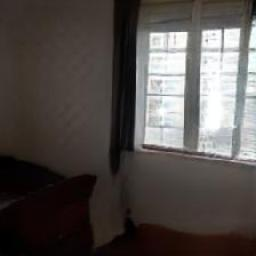
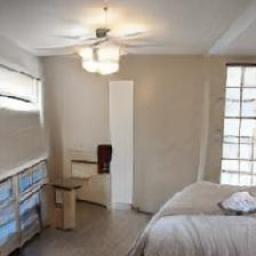
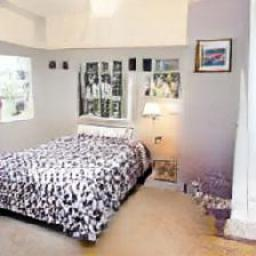
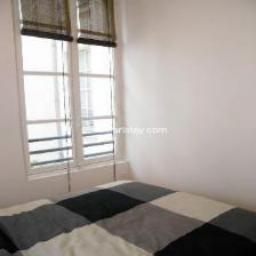
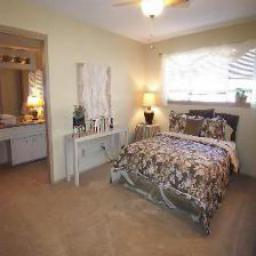
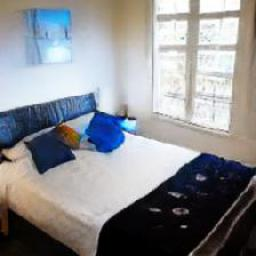
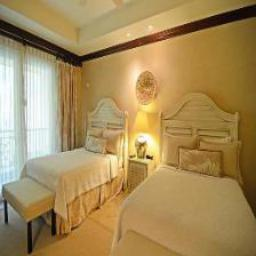
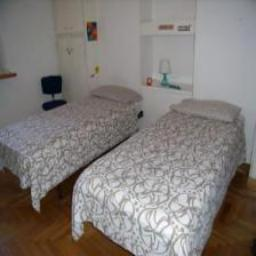
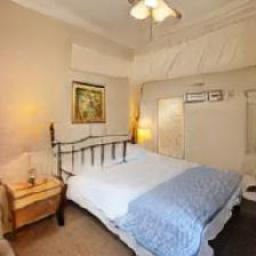
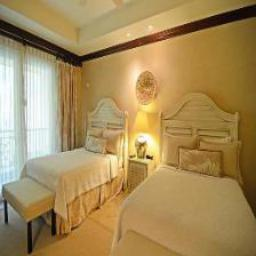
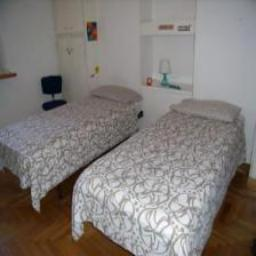
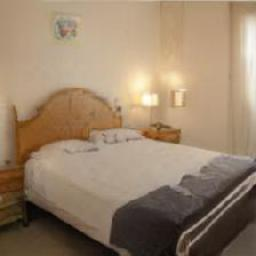
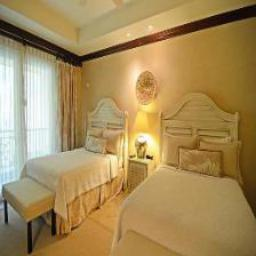
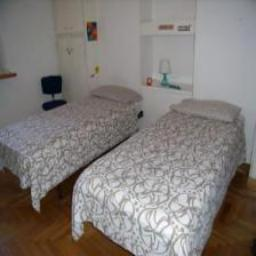
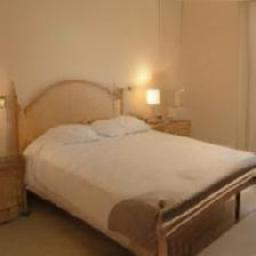
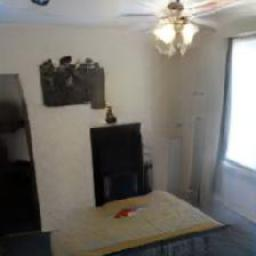
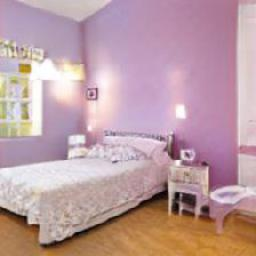
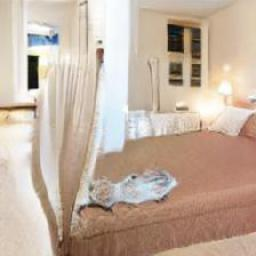
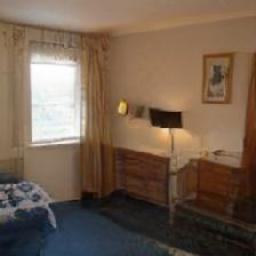
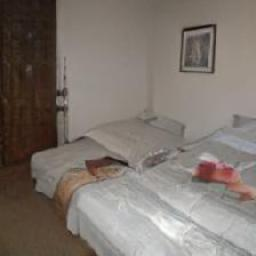
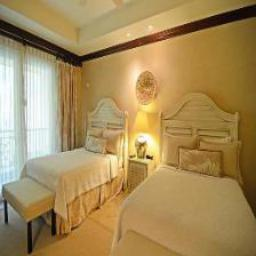
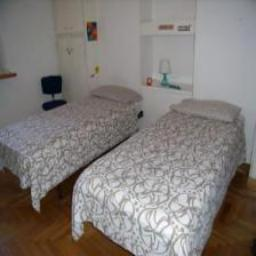
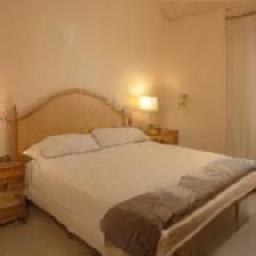
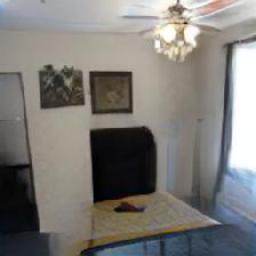
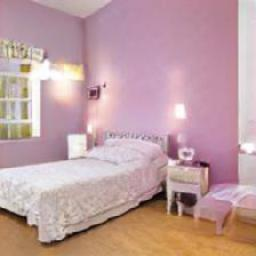
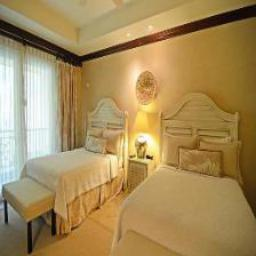
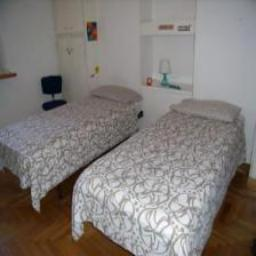
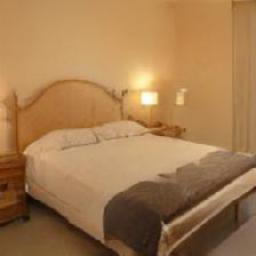
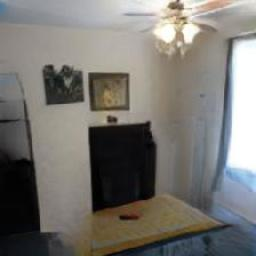
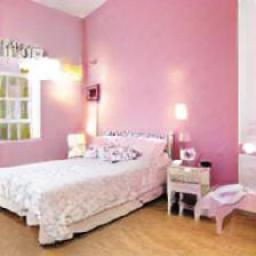
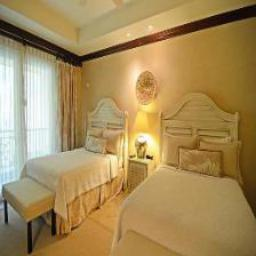
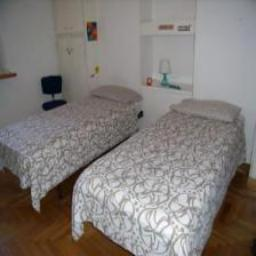
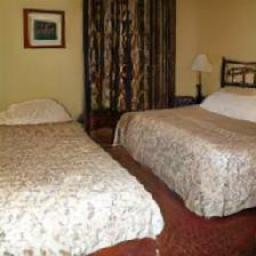
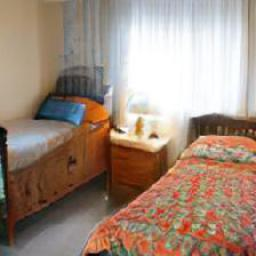
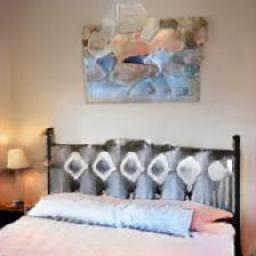
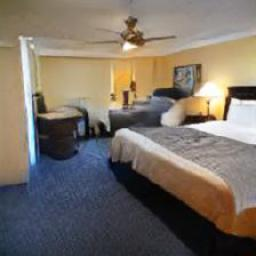
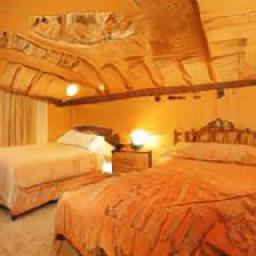
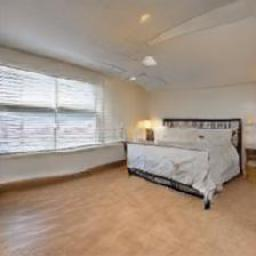
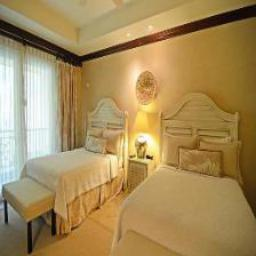
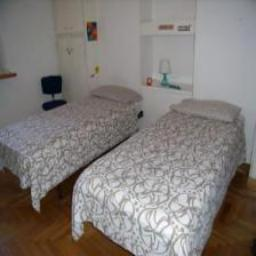
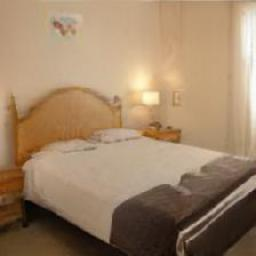
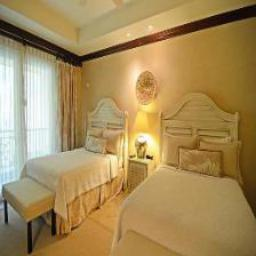
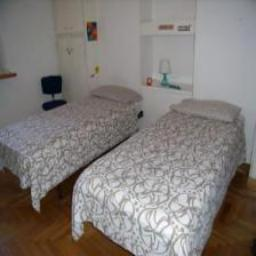
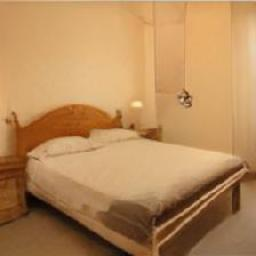
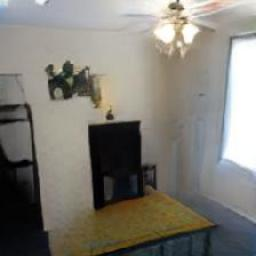
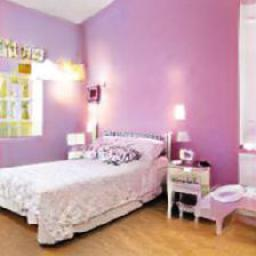
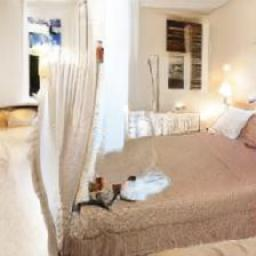
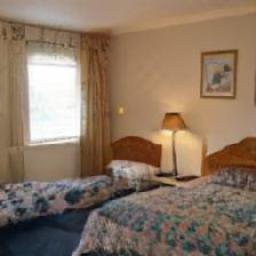
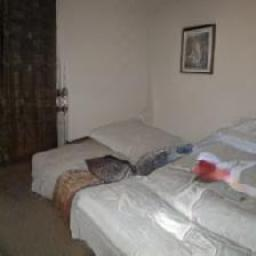
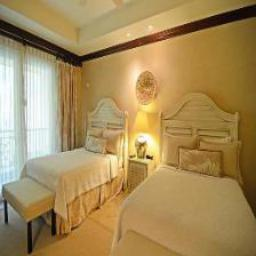
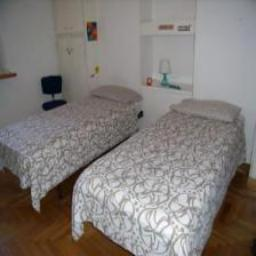
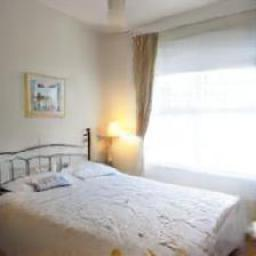
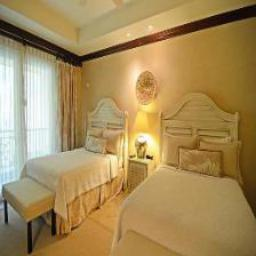
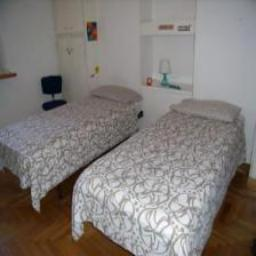
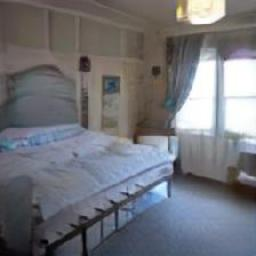
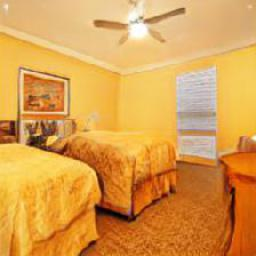
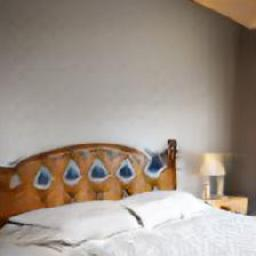
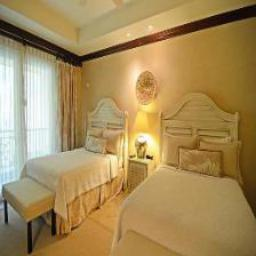
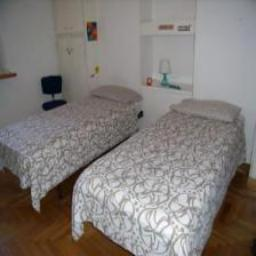
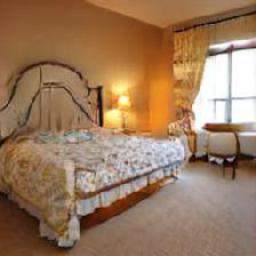
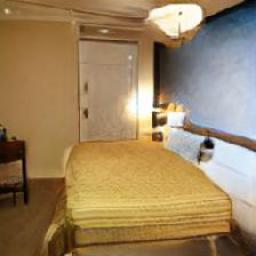
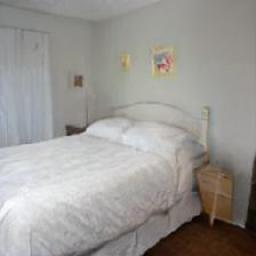
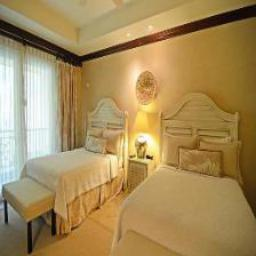
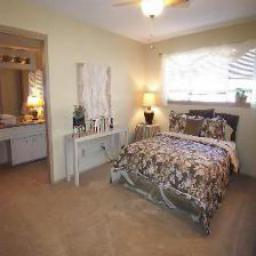
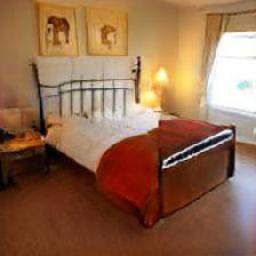
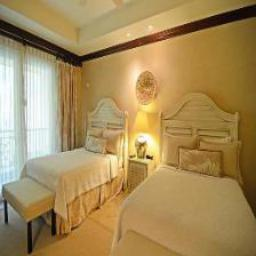
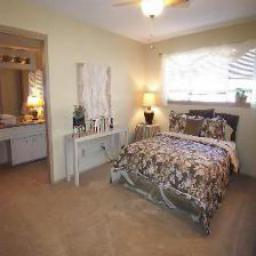
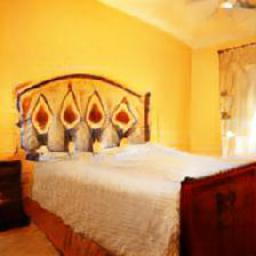
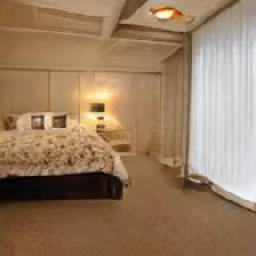
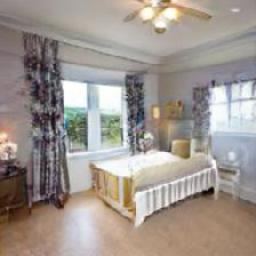
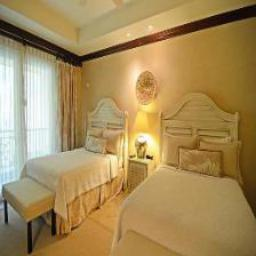
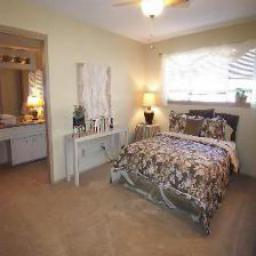
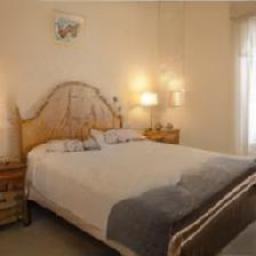
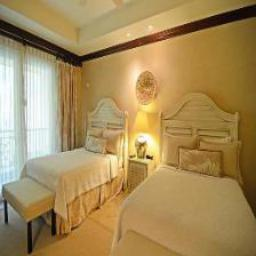
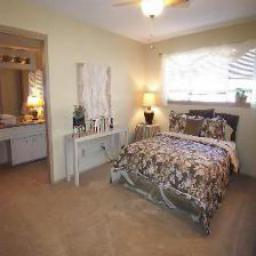
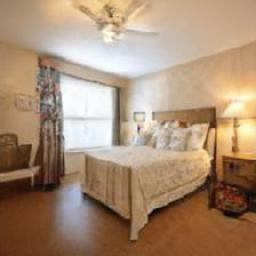
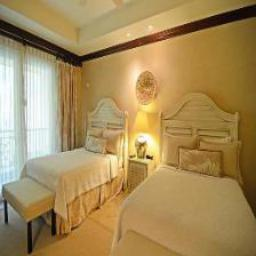
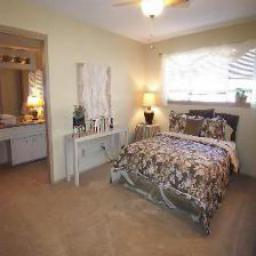
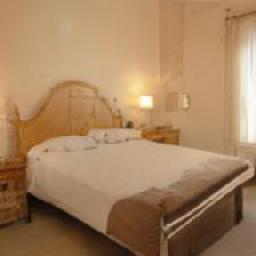
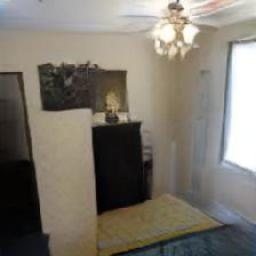
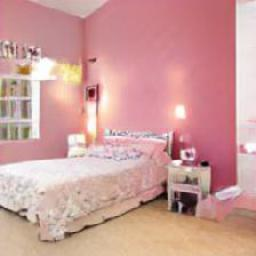
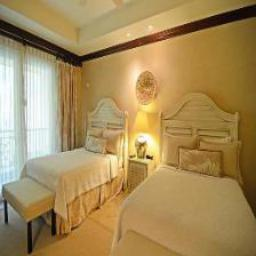
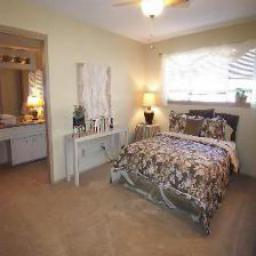
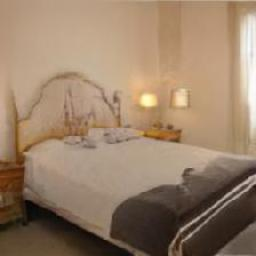
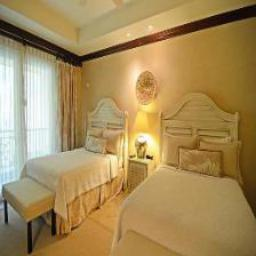
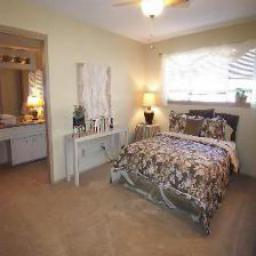
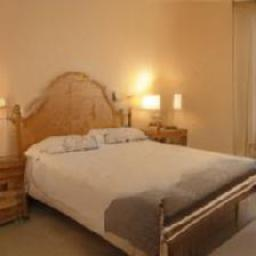
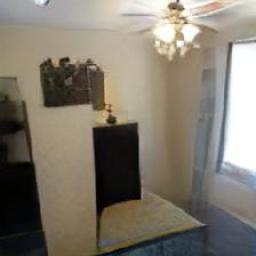
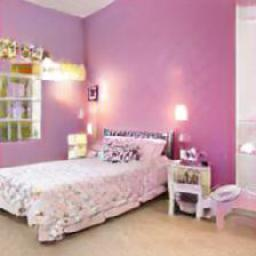
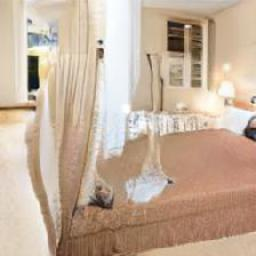
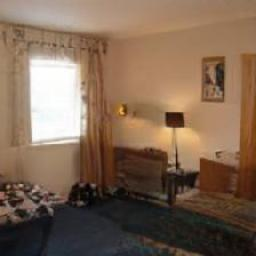
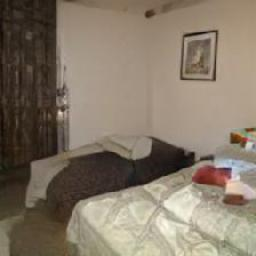
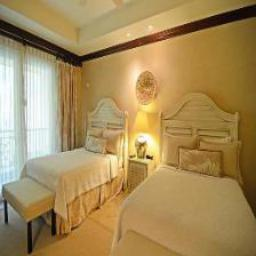
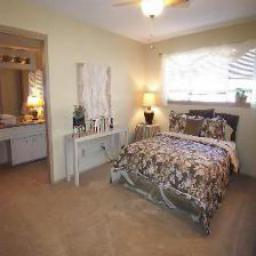
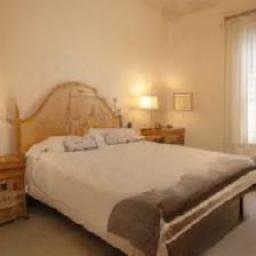
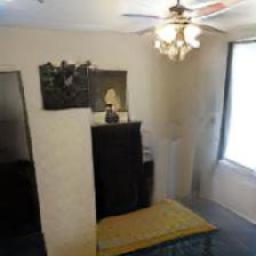
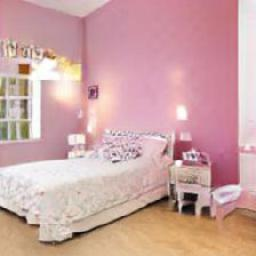
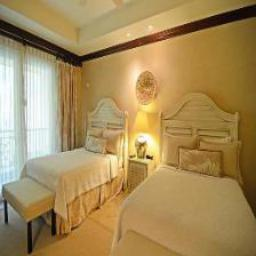
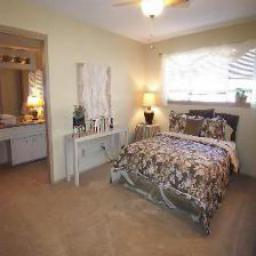
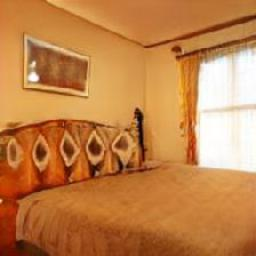
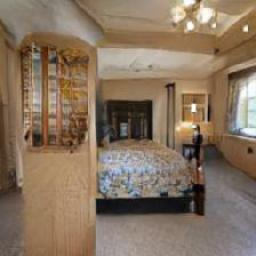
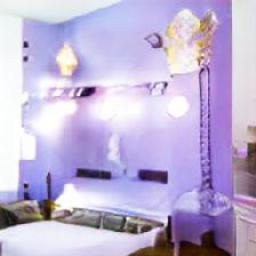
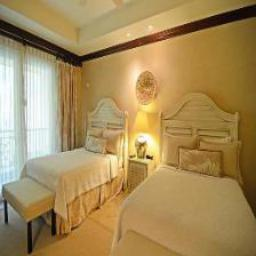
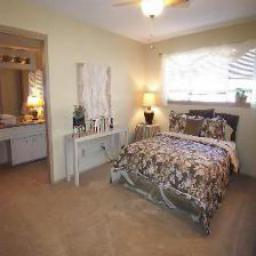
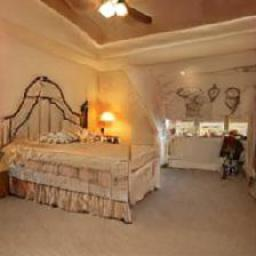
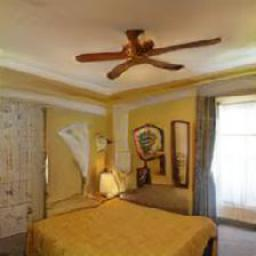
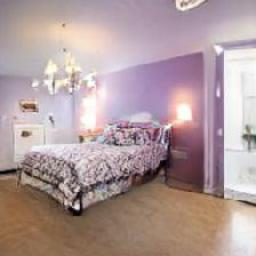
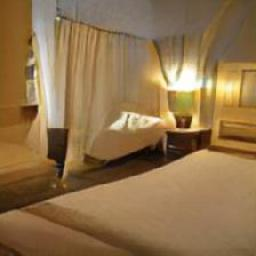
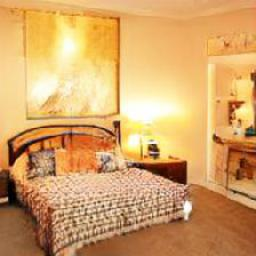
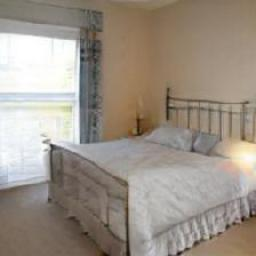
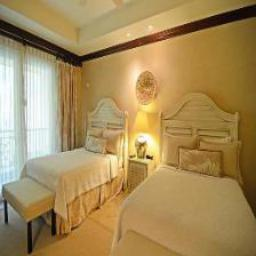
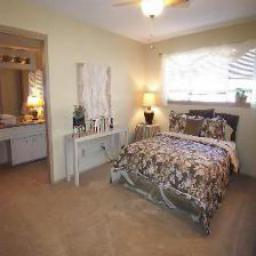
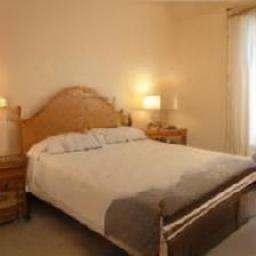
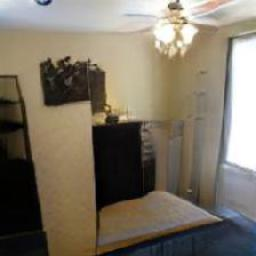
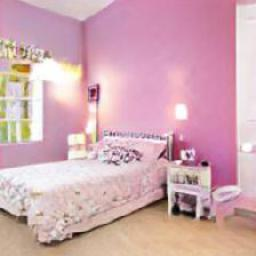
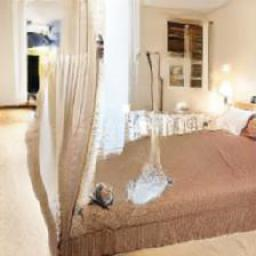
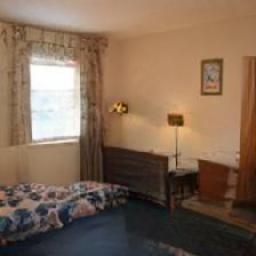
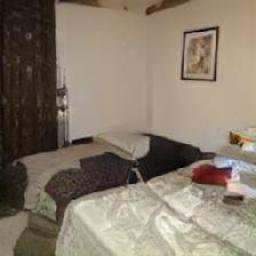
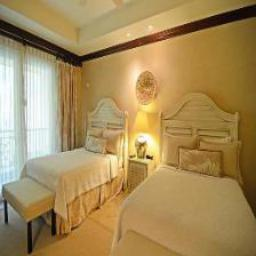
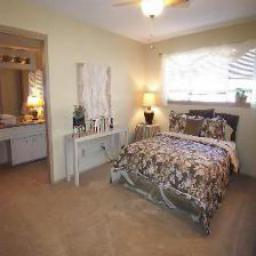
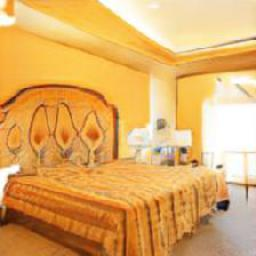
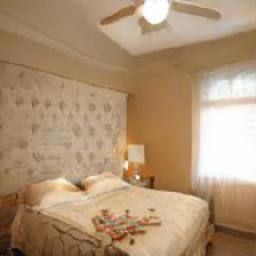
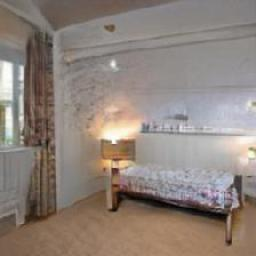
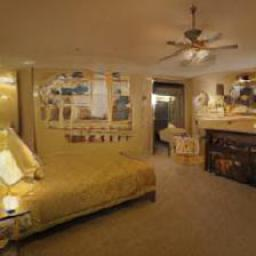
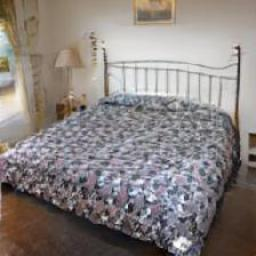
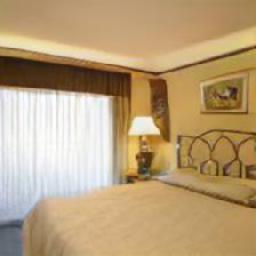

In [267]:
# dataframe to html
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', -1)
html = df_final.to_html(formatters={'cond_imgs': images_formatter, 'out_imgs': images_formatter,'feat_imgs': images_formatter,'cond_feat': images_formatter,'prior_ini': images_formatter,'ini_imgs': images_formatter}, escape=False)
IPython.display.HTML(html)

In [107]:
print('Output Score')
mean_list = []
for item in df['output_score'][0:100]:
    mean_list.append(item[0])
print('Mean:',np.mean(mean_list),'STD:',np.std(mean_list))

print('Prior Score')
mean_list = []
for item in df['prior_score']:
    mean_list.append(item[0])
print('Mean:',np.mean(mean_list),'STD:',np.std(mean_list))

Output Score
Mean: 0.5984976275265216 STD: 0.04008654681031813
Prior Score
Mean: 0.5811532061724436 STD: 0.027622677035184517


In [144]:
import matplotlib.pyplot as plt

In [3549]:
with open('html/bedroom_m3_lr1e_1.html','w+') as f:
    f.write(html)

In [2357]:
!mkdir html

In [2760]:
for i in range(58712,58857):
    print(i,'',end="")

58712 58713 58714 58715 58716 58717 58718 58719 58720 58721 58722 58723 58724 58725 58726 58727 58728 58729 58730 58731 58732 58733 58734 58735 58736 58737 58738 58739 58740 58741 58742 58743 58744 58745 58746 58747 58748 58749 58750 58751 58752 58753 58754 58755 58756 58757 58758 58759 58760 58761 58762 58763 58764 58765 58766 58767 58768 58769 58770 58771 58772 58773 58774 58775 58776 58777 58778 58779 58780 58781 58782 58783 58784 58785 58786 58787 58788 58789 58790 58791 58792 58793 58794 58795 58796 58797 58798 58799 58800 58801 58802 58803 58804 58805 58806 58807 58808 58809 58810 58811 58812 58813 58814 58815 58816 58817 58818 58819 58820 58821 58822 58823 58824 58825 58826 58827 58828 58829 58830 58831 58832 58833 58834 58835 58836 58837 58838 58839 58840 58841 58842 58843 58844 58845 58846 58847 58848 58849 58850 58851 58852 58853 58854 58855 58856 

In [114]:
tokens = [x[:-9] for x in os.listdir('../cadgan/ex/test_list_bedroom_n3_lr0_1_m2/tokens/')]

In [103]:
import itertools as itt
import cadgan.ex.exutil as exu

In [115]:
tasks = [x.split('/')[-1][:-3] for x in exu.list_files_of_extensions('../cadgan/ex/test_list_bedroom_n3_lr0_1_m2/',['.sh'])]

In [116]:
for t in tasks:
    if t not in tokens:
        print(t)

ccb6625b526d


In [127]:
len(os.listdir(glo.share_path('validation_imgs/CUB/')))

5994

In [218]:
dir_imgs = '../../../psangkloy3/cadgan_temp/cadgan/ex/test_n1_63_imgstep_1/log/co_test_listceleba_n1files_n1_63.txt-dp_no-el_17-et_vgg_face-gt_celebAHQ.yaml-img_size_224-it_1000-k_imq-kp_-0.5 100.0-lr_0.1-n_1-n_init_resample_1.0-s_9-te_0.0-w_input_-zpen_TPNull/output_images'

In [202]:
from shutil import copyfile

In [219]:
out_dir = 'n1_file63_face_optim_1_360_step1'
#os.makedirs(out_dir)
count = 0
for i in range(0,360,1):
    copyfile(os.path.join(dir_imgs,str(i),'000.jpg'),os.path.join(out_dir,'%04d'%count + '.jpg'))
    count += 1

In [209]:
'../../../psangkloy3/cadgan_temp/cadgan/ex/test_n1_49_imgstep_1/log/co_test_listceleba_n1files_n1_49.txt-dp_no-el_17-et_vgg_face-gt_celebAHQ.yaml-img_size_224-it_1000-k_imq-kp_-0.5 100.0-lr_0.1-n_1-n_init_resample_1.0-s_9-te_0.0-w_input_-zpen_TPNull/output_images/0/000

360